# past

In [8]:
import shutup; shutup.please()

In [4]:
# Fundamental data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Advanced data processing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE

# ML model imports
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix,
    classification_report, precision_recall_curve, average_precision_score
)
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight

# Advanced visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches

# Neural Network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input,
    Concatenate, LeakyReLU, Activation
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Resampling techniques for imbalanced data
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Time series analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# For statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, fisher_exact

# For survival analysis
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

# For multiple hypothesis testing correction
from statsmodels.stats.multitest import multipletests

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.set_printoptions(precision=3, suppress=True)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

COVID-19 and Particulate Matter Analysis


>>> STEP 1: DATA LOADING AND PREPROCESSING
Loading data from: covidPM_df_cleaned_111023.csv
Successfully loaded data with shape: (9845, 806)
Column 'PLAQUENIL_FIRST_ADMIN_DATE': 2875 non-numeric values converted to NaN
Column 'FIRST_PO2_ABG_DATETIME': 2211 non-numeric values converted to NaN
Column 'HCO3_ARTERIAL_BLOOD_GAS_DATETIME': 2211 non-numeric values converted to NaN
Column 'MEDROL_SOLU_MEDROL_LAST_ADMIN_DATE': 809 non-numeric values converted to NaN
Column 'EOSINOPHILS_PERCENT_CBC_WITH_DIFFERENTIAL_DATETIME': 9774 non-numeric values converted to NaN
Column 'TOTAL_BILIRUBIN_COMPREHENSIVE_METABOLIC_PANEL_DATETIME': 9371 non-numeric values converted to NaN
Column 'CHLORIDE_POC_VENOUS_BLOOD_GAS_DATETIME': 4890 non-numeric values converted to NaN
Column 'NOREPINEPHRINE_FIRST_ADMIN_DATE': 1348 non-numeric values converted to NaN
Column 'LYMPHOCYTES_ABSOLUTE_CBC_WITH_DIFFERENTIAL_DATETIME': 9197 non-numeric values converted to NaN
Column 'mea

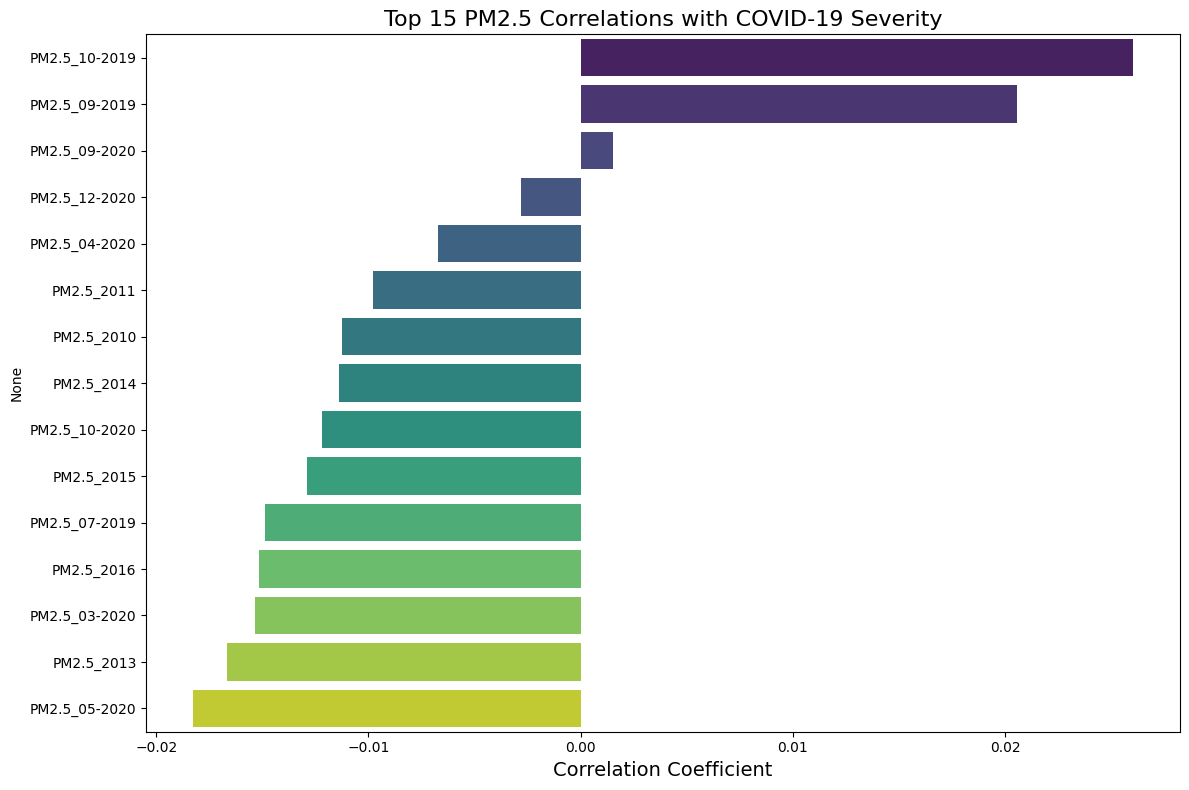


Top 5 Positive PM2.5 Correlations with COVID-19 Severity:
PM2.5_10-2019    0.026029
PM2.5_09-2019    0.020558
PM2.5_09-2020    0.001538
PM2.5_12-2020   -0.002806
PM2.5_04-2020   -0.006734
dtype: float64

Top 5 Negative PM2.5 Correlations with COVID-19 Severity:
PM2.5_09-2021   -0.040625
PM2.5_12-2021   -0.041895
PM2.5_07-2021   -0.048238
PM2.5_11-2019         NaN
PM2.5_12-2019         NaN
dtype: float64


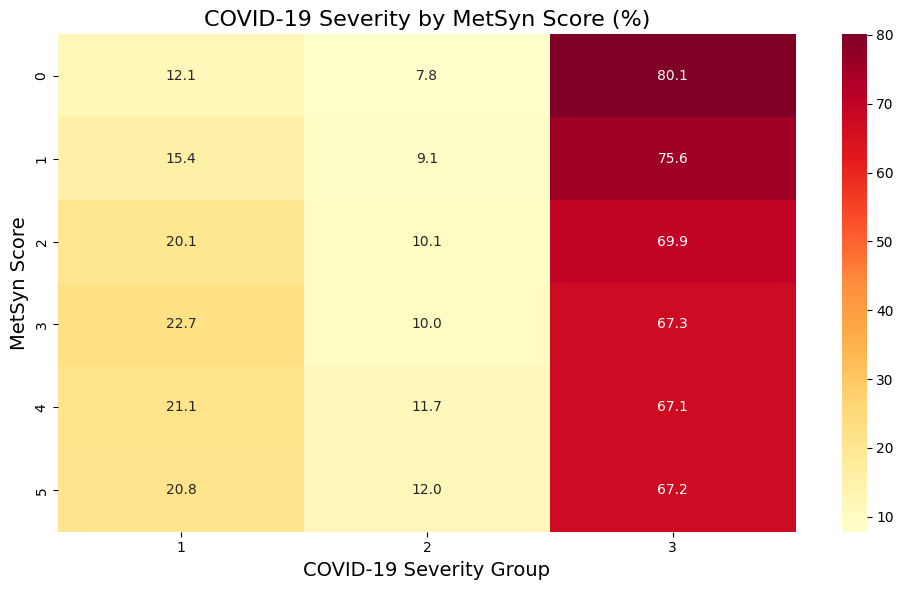


Chi-square test of independence between MetSyn and COVID-19 Severity:
Chi2 value: 66.04, p-value: 0.0000
There is a significant interaction effect between PM exposure and MetSyn on COVID-19 severity

Post-hoc Analysis Results:
                                     Comparison  Odds Ratio       P-value  \
0  High PM & High MetSyn vs Low PM & Low MetSyn    1.711077  1.529008e-15   
1   High PM & Low MetSyn vs Low PM & Low MetSyn    1.191969  2.957213e-03   
2   Low PM & High MetSyn vs Low PM & Low MetSyn    1.488584  1.403177e-09   
3                     NA vs Low PM & Low MetSyn    0.909058  7.126203e-01   

   Corrected P-value Significant  
0       6.116033e-15         Yes  
1       3.942951e-03         Yes  
2       2.806353e-09         Yes  
3       7.126203e-01          No  


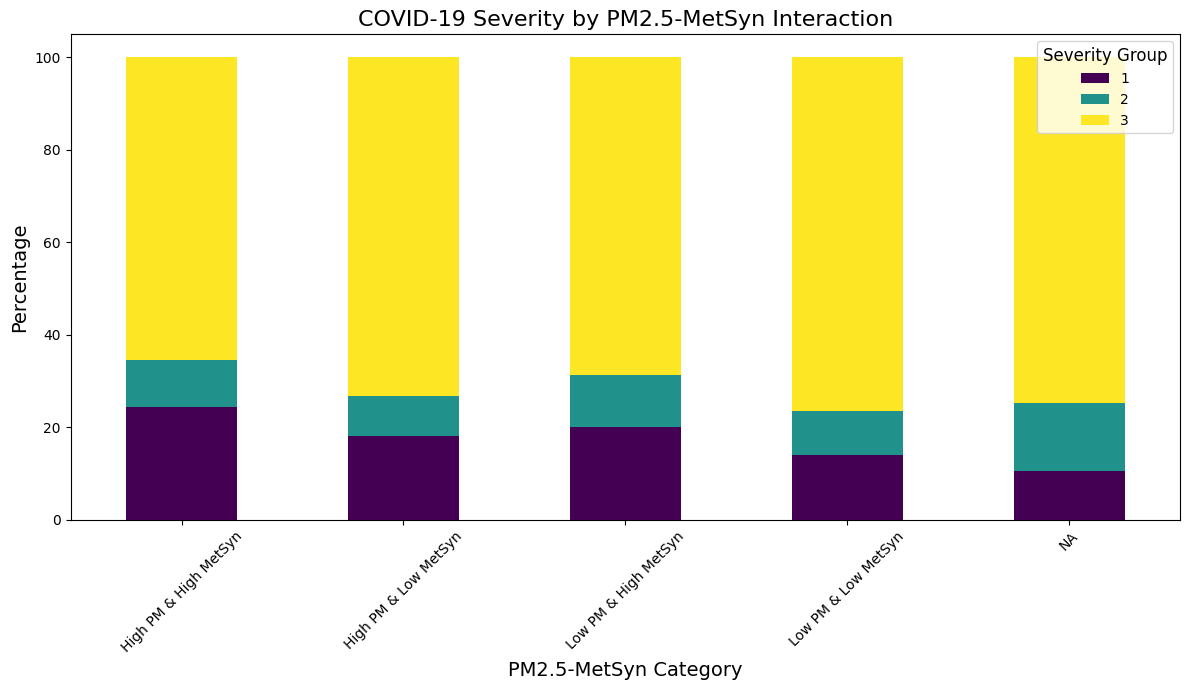


Chi-square test for PM-MetSyn interaction effect on COVID-19 severity:
Chi2 value: 78.30, p-value: 0.0000
There is a significant interaction effect between PM exposure and MetSyn on COVID-19 severity

Post-hoc Analysis Results:
                                     Comparison  Odds Ratio       P-value  \
0  High PM & High MetSyn vs Low PM & Low MetSyn    1.711077  1.529008e-15   
1   High PM & Low MetSyn vs Low PM & Low MetSyn    1.191969  2.957213e-03   
2   Low PM & High MetSyn vs Low PM & Low MetSyn    1.488584  1.403177e-09   
3                     NA vs Low PM & Low MetSyn    0.909058  7.126203e-01   

   Corrected P-value Significant  
0       6.116033e-15         Yes  
1       3.942951e-03         Yes  
2       2.806353e-09         Yes  
3       7.126203e-01          No  


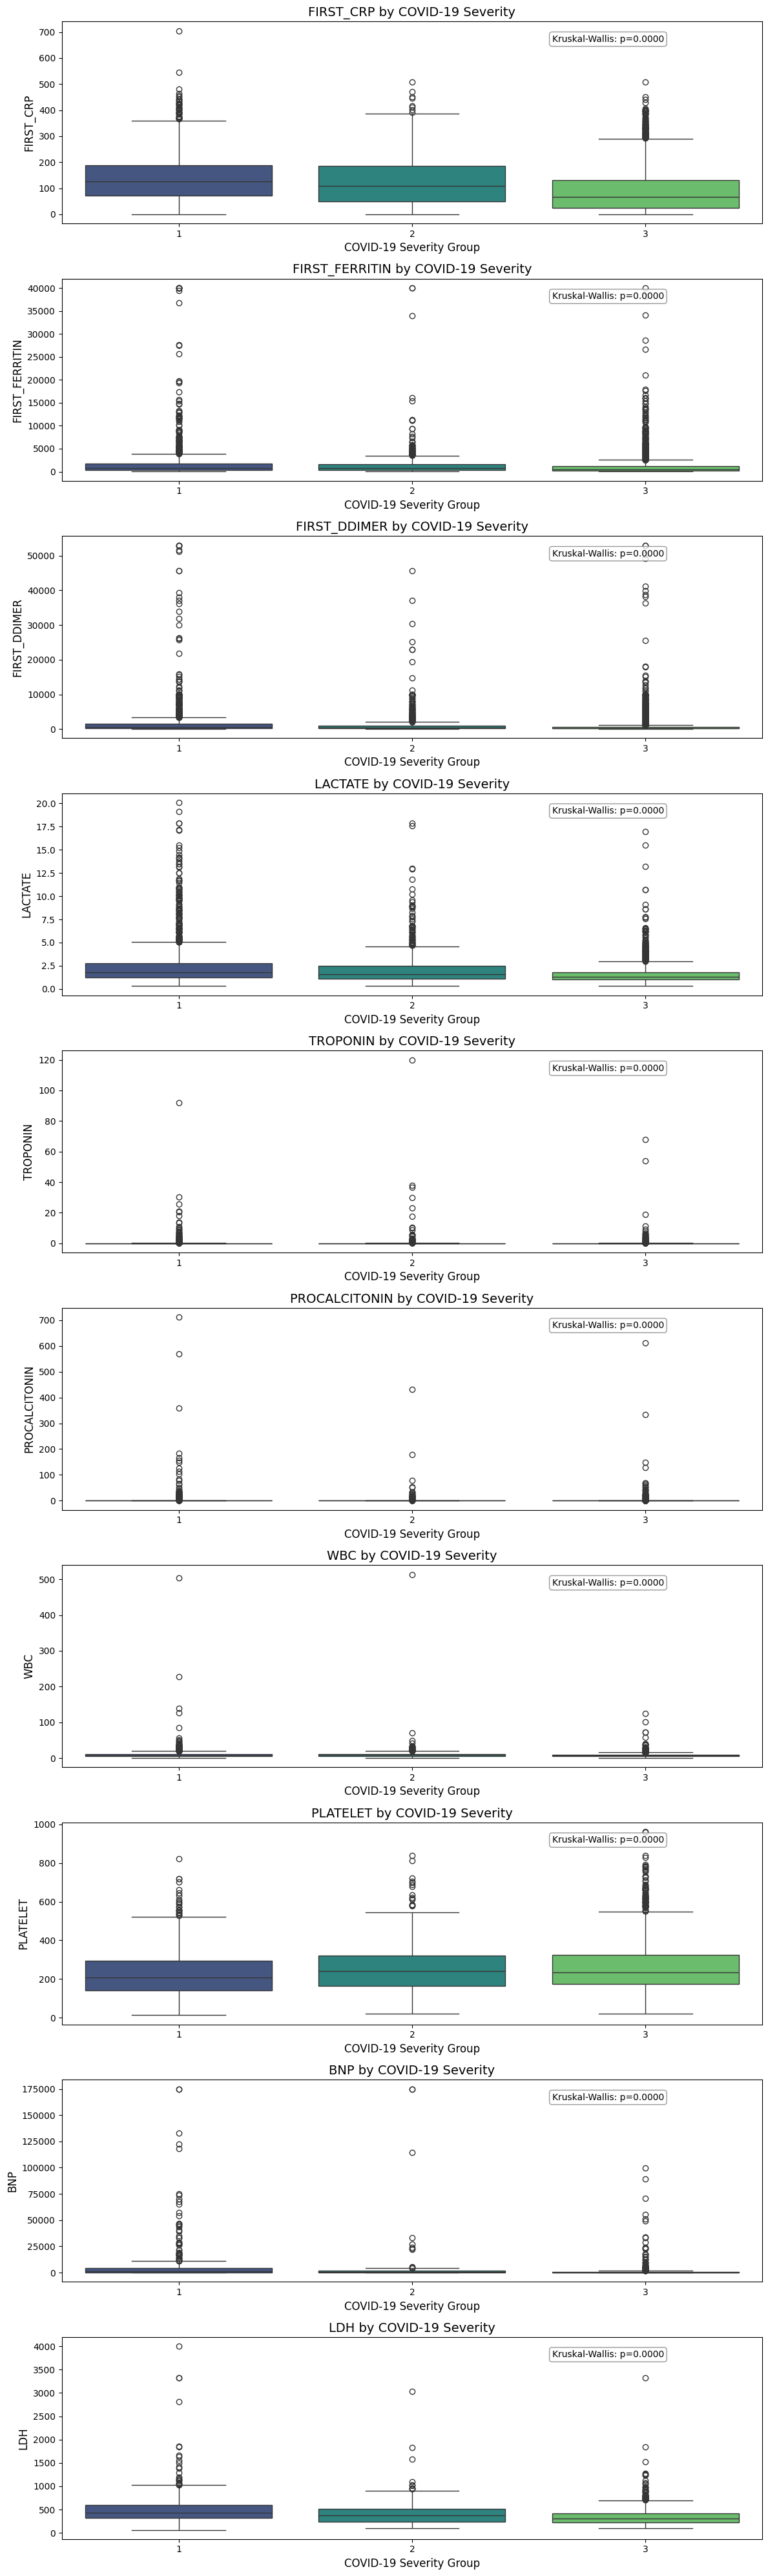

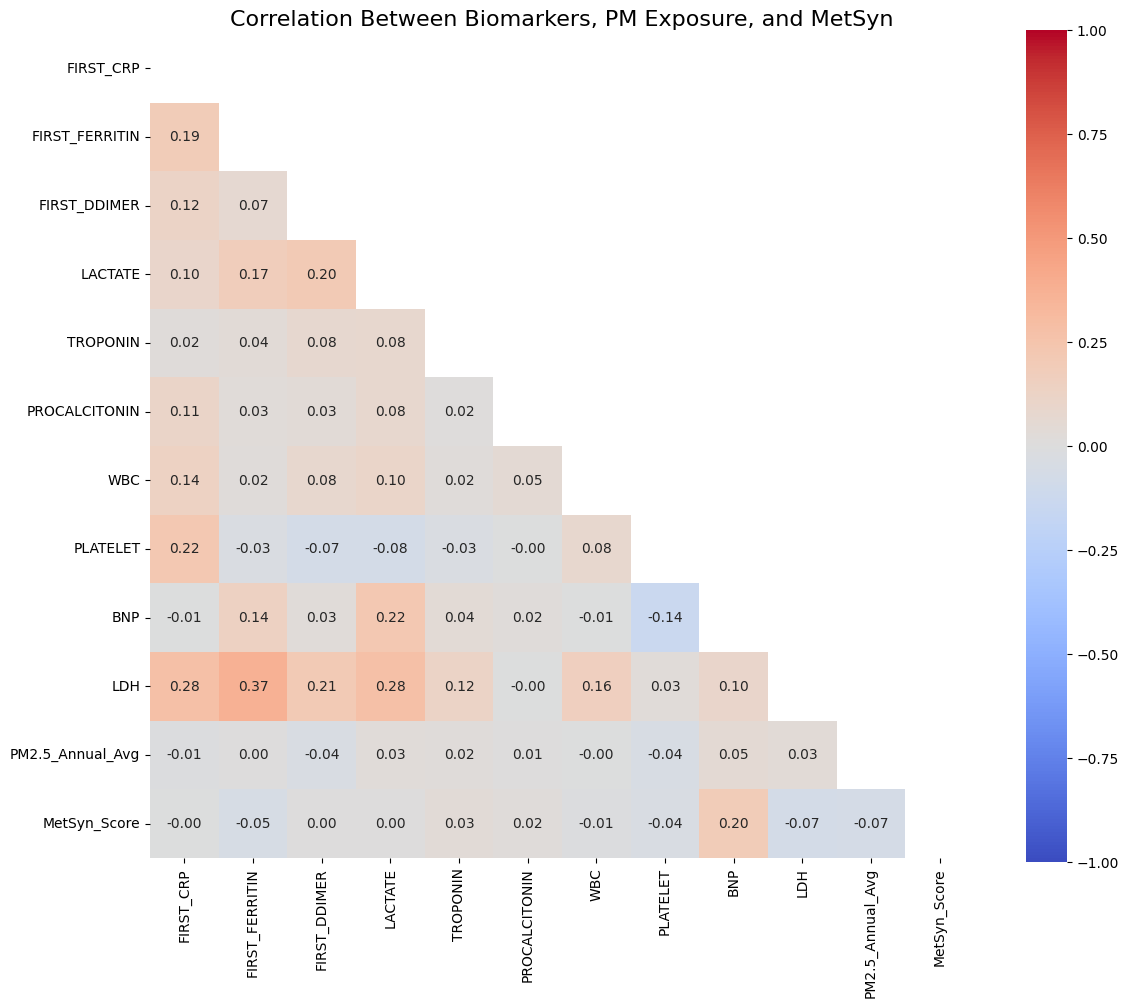


Significant biomarkers associated with COVID-19 severity:
FIRST_CRP: p=1.27e-129
FIRST_FERRITIN: p=4.76e-53
FIRST_DDIMER: p=3.46e-131
LACTATE: p=3.51e-91
TROPONIN: p=8.49e-183
PROCALCITONIN: p=5.22e-202
WBC: p=1.95e-50
PLATELET: p=2.44e-14
BNP: p=3.11e-21
LDH: p=2.38e-56


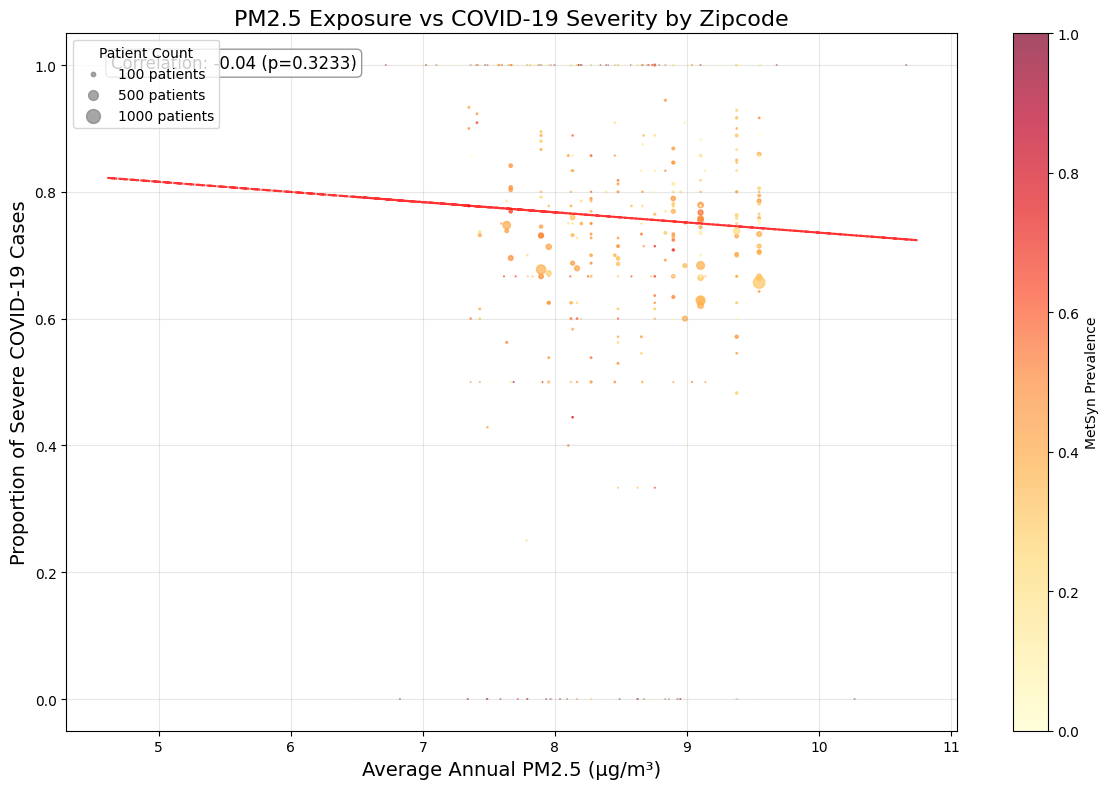

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input contains NaN.

In [11]:
#####################################################
# 1. DATA LOADING AND PREPROCESSING
#####################################################

def load_covid_pm_data(file_path):
    """
    Load COVID-19 and PM exposure data with appropriate handling
    of data types and missing values
    """
    print("Loading data from:", file_path)
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded data with shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def clean_numeric_columns(df, columns_to_clean=None):
    """
    Clean numeric columns by converting non-numeric values to NaN

    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe to clean
    columns_to_clean : list or None
        List of columns to clean. If None, will attempt to clean all columns
        with numeric-like dtypes or with numeric names

    Returns:
    --------
    pandas DataFrame
        DataFrame with cleaned numeric columns
    """
    # If no columns specified, try to identify potential numeric columns
    if columns_to_clean is None:
        # Look for columns with numeric dtypes or commonly numeric column patterns
        numeric_dtypes = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        numeric_patterns = [col for col in df.columns if any(
            term in col.lower() for term in [
                'count', 'level', 'rate', 'value', 'score', 'index', 'ratio',
                'percent', 'duration', 'time', 'age', 'bmi', 'weight',
                'pressure', 'flow', 'avg', 'mean', 'median', 'min', 'max'
            ]
        )]
        lab_results = [col for col in df.columns if any(
            term in col.upper() for term in [
                'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'PLT', 'LYMPH', 'NEUT',
                'GLUC', 'CREAT', 'ALT', 'AST', 'CRP', 'BUN', 'FERRITIN',
                'DDIMER', 'TROPONIN', 'LDH', 'PROCAL', 'PLATELET', 'FIRST_',
                'FIBRINO','SODIUM', 'POTASSIUM', 'CHLORIDE', 'BICARB', 'CALCIUM',
                'ALB', 'BILI', 'ALP', 'PULSE', 'TEMP', 'RESPIRATION'
            ]
        )]
        columns_to_clean = list(set(numeric_dtypes + numeric_patterns + lab_results))

    # Clean each column
    df_cleaned = df.copy()
    for col in columns_to_clean:
        if col in df.columns:
            # Skip boolean columns
            if df[col].dtype == bool:
                continue

            # Try to convert to numeric, forcing non-numeric values to NaN
            df_cleaned[col] = pd.to_numeric(df[col], errors='coerce')

            # Report if values were coerced
            nan_count = df_cleaned[col].isna().sum() - df[col].isna().sum()
            if nan_count > 0:
                print(f"Column '{col}': {nan_count} non-numeric values converted to NaN")

    return df_cleaned

def apply_sklearn_nan_patches():
    """
    Apply monkey patches to scikit-learn to aggressively handle NaN values.
    This should be called at the very beginning of your script.
    """
    import numpy as np
    import pandas as pd
    import functools
    import sklearn.utils.validation

    # Store the original function
    original_assert_all_finite = sklearn.utils.validation._assert_all_finite_element_wise

    # Create our patched version
    def patched_assert_all_finite(X, *args, **kwargs):
        """
        Patched version that handles NaN values in data by replacing them
        before the validation happens.
        """
        try:
            # Try with the original function first
            return original_assert_all_finite(X, *args, **kwargs)
        except ValueError as e:
            if "Input contains NaN" in str(e):
                print("WARNING: NaN values detected, auto-fixing...")

                # Handle different data types
                if isinstance(X, np.ndarray):
                    # If it's a numpy array, replace NaNs with 0
                    X_fixed = np.nan_to_num(X, nan=0.0)
                    return original_assert_all_finite(X_fixed, *args, **kwargs)
                elif isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
                    # If it's pandas, fill NaNs with appropriate values
                    X_fixed = X.fillna(0)
                    return original_assert_all_finite(X_fixed, *args, **kwargs)
                else:
                    # For other types, try direct conversion to array
                    try:
                        X_array = np.asarray(X)
                        X_fixed = np.nan_to_num(X_array, nan=0.0)
                        return original_assert_all_finite(X_fixed, *args, **kwargs)
                    except:
                        # If all else fails, reraise the original error
                        raise e
            else:
                # If it's a different error, reraise it
                raise e

    # Replace the original function with our patched version
    sklearn.utils.validation._assert_all_finite_element_wise = patched_assert_all_finite

    # Patch additional sklearn functions that might need similar treatment
    # This ensures that any function that checks for NaN values behaves consistently

    # Function to create a patched version of any validation function
    def create_nan_safe_wrapper(original_func):
        """Creates a wrapper that handles NaN values safely"""
        @functools.wraps(original_func)
        def wrapper(X, *args, **kwargs):
            try:
                return original_func(X, *args, **kwargs)
            except ValueError as e:
                if "Input contains NaN" in str(e):
                    print(f"WARNING: NaN values detected in {original_func.__name__}, auto-fixing...")

                    # Handle different data types
                    if isinstance(X, np.ndarray):
                        X_fixed = np.nan_to_num(X, nan=0.0)
                        return original_func(X_fixed, *args, **kwargs)
                    elif isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
                        X_fixed = X.fillna(0)
                        return original_func(X_fixed, *args, **kwargs)
                    else:
                        try:
                            X_array = np.asarray(X)
                            X_fixed = np.nan_to_num(X_array, nan=0.0)
                            return original_func(X_fixed, *args, **kwargs)
                        except:
                            raise e
                else:
                    raise e
        return wrapper

    # Apply patches to other common scikit-learn validation functions
    for func_name in [
        'check_array',
        'check_X_y',
        'assert_all_finite'
    ]:
        if hasattr(sklearn.utils.validation, func_name):
            original = getattr(sklearn.utils.validation, func_name)
            patched = create_nan_safe_wrapper(original)
            setattr(sklearn.utils.validation, func_name, patched)

    print("Applied sklearn NaN handling patches successfully!")
apply_sklearn_nan_patches()
# ---------------------------
# Direct NaN cleaning in numpy arrays (use before any sklearn operation)
# ---------------------------

def ensure_no_nans(arr):
    """
    Aggressively ensure no NaN values exist in any array-like object.
    Use this before any scikit-learn function that might complain about NaNs.

    Parameters:
    -----------
    arr : array-like
        The array to clean

    Returns:
    --------
    array-like
        The same type of object with NaNs replaced by 0
    """
    import numpy as np
    import pandas as pd

    if arr is None:
        return arr

    if isinstance(arr, pd.DataFrame):
        # For DataFrames, fill column-by-column
        result = arr.copy()
        for col in result.columns:
            # Try mean first, fall back to 0
            mean_val = result[col].mean()
            if pd.isna(mean_val):
                result[col] = result[col].fillna(0)
            else:
                result[col] = result[col].fillna(mean_val)
        return result

    elif isinstance(arr, pd.Series):
        # For Series, try mean, fall back to most frequent, then 0
        mean_val = arr.mean()
        if pd.isna(mean_val):
            if arr.dtype in ['object', 'category']:
                # For categorical, use most frequent
                mode_val = arr.mode()
                if len(mode_val) > 0:
                    return arr.fillna(mode_val[0])
                else:
                    return arr.fillna("unknown")
            else:
                # For numerical, use 0
                return arr.fillna(0)
        else:
            return arr.fillna(mean_val)

    elif isinstance(arr, np.ndarray):
        # For numpy arrays, replace with 0
        return np.nan_to_num(arr, nan=0.0)

    else:
        # Try to convert to numpy array
        try:
            arr_np = np.asarray(arr)
            return np.nan_to_num(arr_np, nan=0.0)
        except:
            # If all else fails, return as is and hope for the best
            return arr

def explore_data(df):
    """
    Comprehensive data exploration function
    """
    # Basic information
    print("\n=== DATASET OVERVIEW ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")


    # Column types and missing values
    print("\n=== COLUMN TYPES AND MISSING VALUES ===")
    types = df.dtypes
    missing = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    col_info = pd.DataFrame({
        'Type': types,
        'Missing Values': missing,
        'Missing Percent': missing_percent.round(2)
    })
    print(col_info.sort_values('Missing Percent', ascending=False).head(20))

    # Target variable distribution
    if 'COVID_severity_3group' in df.columns:
        print("\n=== TARGET VARIABLE DISTRIBUTION ===")
        severity_counts = df['COVID_severity_3group'].value_counts()
        print(severity_counts)
        print(f"Class distribution percentages:")
        print(100 * severity_counts / len(df))

        # Create a visualization of the target distribution
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x='COVID_severity_3group', data=df, palette='viridis')
        plt.title('Distribution of COVID-19 Severity Classes', fontsize=16)
        plt.xlabel('Severity Group', fontsize=14)
        plt.ylabel('Count', fontsize=14)

        # Add percentage labels
        total = len(df)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    # Get summary statistics for numerical columns
    print("\n=== NUMERICAL FEATURES SUMMARY ===")
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numerical_cols) > 0:
        print(df[numerical_cols].describe().T)

    # Check for categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    if len(categorical_cols) > 0:
        print(f"\n=== CATEGORICAL FEATURES ({len(categorical_cols)} columns) ===")
        for col in categorical_cols[:5]:  # Show first 5 to avoid overwhelming output
            print(f"\n{col}:")
            print(df[col].value_counts().head())
        if len(categorical_cols) > 5:
            print(f"...and {len(categorical_cols) - 5} more categorical columns")

    return col_info

def create_severity_groups(df):
    """
    Create COVID severity classification based on clinical outcomes:
    Group 1: Died (regardless of ICU status)
    Group 2: ICU and Survived
    Group 3: No ICU and Survived
    """
    def severity(row):
        # Group 1: ICU and Died or No ICU and Died
        if row['mortality'] == True:
            return 1
        # Group 2: ICU and Survived
        elif pd.notna(row['DurationToICU']) and row['mortality'] == False:
            return 2
        # Group 3: No ICU and Survived
        else:
            return 3

    df['COVID_severity_3group'] = df.apply(severity, axis=1)

    # Create binary severity variable (severe vs moderate)
    df['COVID_severity_binary'] = df['COVID_severity_3group'].apply(lambda x: 1 if x == 3 else 0)

    # Display the distribution
    group_counts = df['COVID_severity_3group'].value_counts().sort_index()
    print("COVID-19 Severity Groups:")
    print(f"Group 1 (Died): {group_counts.get(1, 0)}")
    print(f"Group 2 (ICU & Survived): {group_counts.get(2, 0)}")
    print(f"Group 3 (No ICU & Survived): {group_counts.get(3, 0)}")

    return df

def create_metsyn_score(df):
    """
    Create a metabolic syndrome score based on clinical criteria:
    - Obesity (BMI ≥ 30)
    - Diabetes
    - Hypertension
    - Hyperlipidemia
    - Cardiovascular disease (composite of Heart.Failure, Coronary.artery.disease, Peripheral.vascular.disease)

    Score ranges from 0-5 with higher values indicating more MetSyn components
    """
    # Initialize MetSyn components
    if 'BMI' in df.columns:
            # Explicitly cast to integer type
            df['MetSyn_Obesity'] = (df['BMI'] >= 30).astype(int)

            # Add categorical BMI with explicit categories
            df['BMI_Category'] = pd.cut(
                df['BMI'],
                bins=[0, 18.5, 25, 30, 35, 40, float('inf')],
                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'],
                ordered=False
            ).astype('category')

    elif 'Waist_Circumference' in df.columns and 'Gender' in df.columns:
        # Initialize as integer type
        df['MetSyn_Obesity'] = 0
        df['MetSyn_Obesity'] = df['MetSyn_Obesity'].astype(int)

        # Use waist circumference with explicit type casting
        male_mask = df['Gender'].isin(['M', 'm', 'Male', 'male'])
        female_mask = df['Gender'].isin(['F', 'f', 'Female', 'female'])

        # Men: waist ≥ 102 cm
        df.loc[male_mask & (df['Waist_Circumference'] >= 102, 'MetSyn_Obesity'] = 1
        # Women: waist ≥ 88 cm
        df.loc[female_mask & (df['Waist_Circumference'] >= 88, 'MetSyn_Obesity'] = 1
    df['MetSyn_Diabetes'] = df['DIABETES'].astype(int)
    df['MetSyn_Hypertension'] = df['Hypertension'].astype(int)
    df['MetSyn_Hyperlipidemia'] = df['Hyperlipidemia'].astype(int)

    # Create cardiovascular disease component (any of the following)
    df['MetSyn_CVD'] = ((df['Heart.Failure'] |
                         df['Coronary.artery.disease'] |
                         df['Peripheral.vascular.disease'])).astype(int)

    # Calculate MetSyn score (sum of components)
    metsyn_components = ['MetSyn_Obesity', 'MetSyn_Diabetes', 'MetSyn_Hypertension',
                         'MetSyn_Hyperlipidemia', 'MetSyn_CVD']

    df['MetSyn_Score'] = df[metsyn_components].sum(axis=1)

    # Define MetSyn status (3 or more components)
    df['MetSyn_Status'] = (df['MetSyn_Score'] >= 3).astype(int)

    # Print MetSyn distribution
    print("\nMetabolic Syndrome Distribution:")
    print(f"MetSyn Score distribution:\n{df['MetSyn_Score'].value_counts().sort_index()}")
    print(f"MetSyn Status (≥3 components): {df['MetSyn_Status'].sum()} ({100*df['MetSyn_Status'].mean():.1f}%)")

    return df


def process_pm_exposure(df):
    """
    Process and aggregate PM exposure data:
    1. Calculate annual average PM2.5 exposure
    2. Calculate seasonal PM2.5 averages
    3. Create PM2.5 exposure categories
    4. Calculate recent PM2.5 exposure prior to admission
    """
    # Get all PM2.5 columns
    pm_cols = [col for col in df.columns if 'PM2.5' in col]

    # 1. Annual Average PM2.5 exposure calculation
    annual_pm_cols = [col for col in pm_cols if col.startswith('PM2.5_20') and len(col) <= 11]
    if annual_pm_cols:
        df['PM2.5_Annual_Avg'] = df[annual_pm_cols].mean(axis=1)

    # 2. Calculate seasonal PM2.5 averages (using month-specific data)
    # Winter (Dec-Feb)
    winter_months = [col for col in pm_cols if any(m in col for m in ['12-', '01-', '02-'])]
    if winter_months:
        df['PM2.5_Winter_Avg'] = df[winter_months].mean(axis=1)

    # Spring (Mar-May)
    spring_months = [col for col in pm_cols if any(m in col for m in ['03-', '04-', '05-'])]
    if spring_months:
        df['PM2.5_Spring_Avg'] = df[spring_months].mean(axis=1)

    # Summer (Jun-Aug)
    summer_months = [col for col in pm_cols if any(m in col for m in ['06-', '07-', '08-'])]
    if summer_months:
        df['PM2.5_Summer_Avg'] = df[summer_months].mean(axis=1)

    # Fall (Sep-Nov)
    fall_months = [col for col in pm_cols if any(m in col for m in ['09-', '10-', '11-'])]
    if fall_months:
        df['PM2.5_Fall_Avg'] = df[fall_months].mean(axis=1)

    # 3. Create PM2.5 exposure categories based on EPA standards
    # Low: <12 μg/m³, Moderate: 12-35 μg/m³, High: >35 μg/m³
    if 'PM2.5_Annual_Avg' in df.columns:
        df['PM2.5_Exposure_Category'] = pd.cut(
            df['PM2.5_Annual_Avg'],
            bins=[0, 12, 35, float('inf')],
            labels=['Low', 'Moderate', 'High']
        )

    # 4. Calculate recent PM2.5 exposure (3 months prior to admission)
    # This would be more accurate with admission dates, but we'll use a proxy approach
    recent_months = [col for col in pm_cols if '2020' in col][:3]  # Assuming first few months of 2020
    if recent_months:
        df['PM2.5_Recent_Avg'] = df[recent_months].mean(axis=1)

    print("\nPM2.5 Exposure Statistics:")
    if 'PM2.5_Annual_Avg' in df.columns:
        print(f"Annual Average PM2.5: {df['PM2.5_Annual_Avg'].mean():.2f} μg/m³")
        print(f"PM2.5 Exposure Categories:\n{df['PM2.5_Exposure_Category'].value_counts()}")

    return df

def handle_missing_values(df, numerical_strategy='iterative', categorical_strategy='mode'):
    """
    Advanced missing value handling with multiple strategies
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Handle numerical missing values
    if numerical_strategy == 'iterative':
        # Multivariate imputation by chained equations
        imp = IterativeImputer(max_iter=10, random_state=42)
        df[numerical_cols] = pd.DataFrame(
            imp.fit_transform(df[numerical_cols]),
            columns=numerical_cols,
            index=df.index
        )
    elif numerical_strategy == 'knn':
        # KNN imputation
        imp = KNNImputer(n_neighbors=5)
        df[numerical_cols] = pd.DataFrame(
            imp.fit_transform(df[numerical_cols]),
            columns=numerical_cols,
            index=df.index
        )
    elif numerical_strategy == 'median':
        for col in numerical_cols:
            df[col].fillna(df[col].median(), inplace=True)

    # Handle categorical missing values
    if categorical_strategy == 'mode':
        for col in categorical_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)
    elif categorical_strategy == 'new_category':
        for col in categorical_cols:
            df[col].fillna('Unknown', inplace=True)

    # Check remaining missing values
    remaining_missing = df.isnull().sum().sum()
    print(f"Remaining missing values after imputation: {remaining_missing}")

    return df

def feature_engineering(df):
    """
    Comprehensive feature engineering:
    1. Age groups
    2. BMI categories
    3. Risk scores
    4. Interaction terms between PM and MetSyn
    5. Temporal features
    """
    # 1. Create age groups
    if 'AdmissionAge' in df.columns:
        df['Age_Group'] = pd.cut(
            df['AdmissionAge'],
            bins=[0, 18, 35, 50, 65, 80, 120],
            labels=['<18', '18-35', '36-50', '51-65', '66-80', '>80']
        )

    # 2. BMI categories
    if 'BMI' in df.columns:
        df['BMI_Category'] = pd.cut(
            df['BMI'],
            bins=[0, 18.5, 25, 30, 35, 40, 100],
            labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
        )

    # 3. Create a composite respiratory disease score
    respiratory_conditions = [
        'COPD', 'Asthma', 'PULMONARY_FIBROSIS', 'EMPHYSEMA',
        'INTERSTITIAL_LUNG_DISEASE', 'BRONCHIECTASIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA'
    ]
    df['Respiratory_Score'] = df[respiratory_conditions].sum(axis=1)

    # 4. Create interaction terms between PM exposure and MetSyn
    if all(col in df.columns for col in ['PM2.5_Annual_Avg', 'MetSyn_Score']):
        # Interaction term (product)
        df['PM_MetSyn_Interaction'] = df['PM2.5_Annual_Avg'] * df['MetSyn_Score']

        # Create categorical interaction
        df['PM_MetSyn_Category'] = 'NA'

        # High PM and High MetSyn
        mask_high_both = (df['PM2.5_Annual_Avg'] > df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] >= 3)
        df.loc[mask_high_both, 'PM_MetSyn_Category'] = 'High PM & High MetSyn'

        # High PM, Low MetSyn
        mask_high_pm = (df['PM2.5_Annual_Avg'] > df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] < 3)
        df.loc[mask_high_pm, 'PM_MetSyn_Category'] = 'High PM & Low MetSyn'

        # Low PM, High MetSyn
        mask_high_metsyn = (df['PM2.5_Annual_Avg'] <= df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] >= 3)
        df.loc[mask_high_metsyn, 'PM_MetSyn_Category'] = 'Low PM & High MetSyn'

        # Low PM, Low MetSyn
        mask_low_both = (df['PM2.5_Annual_Avg'] <= df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] < 3)
        df.loc[mask_low_both, 'PM_MetSyn_Category'] = 'Low PM & Low MetSyn'

    # 5. PM Exposure Duration (if days_difference is available)
    if 'days_difference' in df.columns:
        df['PM_Exposure_Duration'] = df['days_difference'].apply(lambda x: 'Long-term' if x > 365 else 'Short-term')

    # Print feature engineering results
    print("\nFeature Engineering Results:")
    if 'Age_Group' in df.columns:
        print(f"Age Groups: {df['Age_Group'].value_counts().to_dict()}")

    if 'PM_MetSyn_Category' in df.columns:
        print(f"PM-MetSyn Interaction Categories: {df['PM_MetSyn_Category'].value_counts().to_dict()}")

    return df

def encode_categorical_features(df, encoding_strategy='label'):
    """
    Encode categorical features using various strategies
    """
    # Find categorical columns (excluding target variables)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols
                       if col not in ['COVID_severity_3group', 'COVID_severity_binary']]

    encoded_df = df.copy()

    if encoding_strategy == 'label':
        # Label encoding
        for col in categorical_cols:
            le = LabelEncoder()
            encoded_df[f"{col}_encoded"] = le.fit_transform(df[col].astype(str))

    elif encoding_strategy == 'onehot':
        # One-hot encoding
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        if categorical_cols:
            encoded_features = encoder.fit_transform(df[categorical_cols])
            encoded_feature_names = [f"{col}_{cat}" for i, col in enumerate(categorical_cols)
                                    for cat in encoder.categories_[i]]
            encoded_df = pd.concat([
                df.drop(categorical_cols, axis=1),
                pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)
            ], axis=1)

    # Add binary-encoded Gender if present
    if 'Gender' in df.columns and encoding_strategy != 'onehot':
        encoded_df['Gender_binary'] = df['Gender'].map({'M': 1, 'F': 0})

    return encoded_df

def scale_numerical_features(df, scaling_strategy='standard'):
    """
    Scale numerical features using various strategies
    """
    # Find numerical columns (excluding target variables and IDs)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols
                     if col not in ['COVID_severity_3group', 'COVID_severity_binary',
                                   'MRN', 'CSN', 'HAR']]

    # Create copy of dataframe
    scaled_df = df.copy()

    if scaling_strategy == 'standard':
        # StandardScaler (mean=0, std=1)
        scaler = StandardScaler()
        scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    elif scaling_strategy == 'minmax':
        # MinMaxScaler (range: 0-1)
        scaler = MinMaxScaler()
        scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return scaled_df

def diagnose_problematic_columns(df):
    """
    Diagnose problematic columns in a dataframe:
    1. Check for columns with high percentage of missing values
    2. Check for columns with abnormal distributions
    3. Check for columns with unexpected data types
    4. Check for columns with potential invalid data (inf, very large numbers)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    results = {}

    print("\n=== DATA DIAGNOSIS REPORT ===")

    # 1. Missing values analysis
    print("\n-- MISSING VALUES ANALYSIS --")
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percent': missing_percent.round(2)
    }).sort_values('Missing Percent', ascending=False)

    # Show columns with any missing values
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    print(f"Found {len(missing_cols)} columns with missing values")
    print(missing_cols.head(20))

    # High-missing columns (>30%)
    high_missing = missing_cols[missing_cols['Missing Percent'] > 30]
    if not high_missing.empty:
        print(f"\nWARNING: {len(high_missing)} columns have >30% missing values")
        print(high_missing)
        results['high_missing_cols'] = high_missing.index.tolist()

    # 2. Check for data type issues
    print("\n-- DATA TYPE ANALYSIS --")
    dtypes = df.dtypes.astype(str)
    dtype_counts = dtypes.value_counts()
    print("Data type distribution:")
    print(dtype_counts)

    # Check for mixed types (numerical columns with strings)
    mixed_type_cols = []
    for col in df.select_dtypes(include=['object']).columns:
        # Try to convert to numeric
        numeric_conversion = pd.to_numeric(df[col], errors='coerce')
        # If some (but not all) values converted successfully
        na_count = numeric_conversion.isna().sum()
        if na_count > 0 and na_count < len(df):
            non_na_count = len(df) - na_count
            if non_na_count > 5:  # Only flag if we have a significant number of numeric values
                mixed_type_cols.append(col)

    if mixed_type_cols:
        print(f"\nWARNING: {len(mixed_type_cols)} columns appear to have mixed types (numeric + non-numeric)")
        for col in mixed_type_cols:
            print(f"- {col}: Sample values: {df[col].dropna().sample(min(5, len(df[col].dropna()))).tolist()}")
        results['mixed_type_cols'] = mixed_type_cols

    # 3. Check for extreme values and outliers
    print("\n-- EXTREME VALUES ANALYSIS --")
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    extreme_value_cols = []

    for col in numeric_cols:
        # Check for infinities
        inf_count = np.isinf(df[col]).sum()
        if inf_count > 0:
            print(f"Column '{col}' has {inf_count} infinite values")
            extreme_value_cols.append(col)
            continue

        # Check for extreme values
        data = df[col].dropna()
        if len(data) == 0:
            continue

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 3 * iqr
        lower_bound = q1 - 3 * iqr

        extreme_count = ((data > upper_bound) | (data < lower_bound)).sum()
        extreme_percent = 100 * extreme_count / len(data)

        if extreme_percent > 5:
            print(f"Column '{col}' has {extreme_percent:.1f}% extreme outliers")
            print(f"  Range: [{data.min()}, {data.max()}], IQR: {iqr}")
            print(f"  Outliers: < {lower_bound} or > {upper_bound}")
            extreme_value_cols.append(col)

    if extreme_value_cols:
        results['extreme_value_cols'] = extreme_value_cols

    # 4. Check for near-constant columns
    print("\n-- VARIANCE ANALYSIS --")
    low_variance_cols = []

    for col in numeric_cols:
        # Skip columns with too many NaNs
        if df[col].isna().sum() > len(df) * 0.5:
            continue

        # Check variance
        variance = df[col].var()
        if pd.isna(variance) or variance == 0:
            print(f"Column '{col}' has zero variance (constant value)")
            low_variance_cols.append(col)
        elif variance < 0.01:
            unique_count = df[col].nunique()
            print(f"Column '{col}' has very low variance ({variance:.6f}), {unique_count} unique values")
            low_variance_cols.append(col)

    if low_variance_cols:
        results['low_variance_cols'] = low_variance_cols

    # 5. Check for problematic PM columns (for this specific dataset)
    print("\n-- PM COLUMNS ANALYSIS --")
    pm_cols = [col for col in df.columns if 'PM2.5' in col]
    if pm_cols:
        pm_missing = df[pm_cols].isna().sum()
        pm_missing_percent = 100 * pm_missing / len(df)
        print(f"Found {len(pm_cols)} PM2.5 columns with average {pm_missing_percent.mean():.1f}% missing values")

        # Check for PM columns with all NaN
        all_nan_pm = [col for col in pm_cols if df[col].isna().all()]
        if all_nan_pm:
            print(f"WARNING: {len(all_nan_pm)} PM columns have ALL missing values: {all_nan_pm}")

    # Summary of findings
    print("\n=== DIAGNOSIS SUMMARY ===")
    for issue, cols in results.items():
        print(f"- {issue}: {len(cols)} columns identified")

    # Recommendations
    print("\n=== RECOMMENDATIONS ===")
    print("Based on the diagnosis, consider:")

    if 'high_missing_cols' in results:
        print("1. Drop columns with >80% missing values")
        print("2. Use advanced imputation for columns with 30-80% missing values")

    if 'mixed_type_cols' in results:
        print("3. Clean mixed-type columns by standardizing numeric formats")

    if 'extreme_value_cols' in results:
        print("4. Cap extreme values or transform columns with outliers")

    if 'low_variance_cols' in results:
        print("5. Consider dropping near-constant columns that provide little information")

    print("6. Ensure consistent data types are used throughout your pipeline")
    print("7. Use the robust missing value handling function provided")

    return results

def advanced_imputation_pipeline(df, target_col=None):
    """
    Advanced imputation pipeline suitable for scientific research publications.
    Uses multiple imputation techniques tailored to feature characteristics.

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset with missing values
    target_col : str or list, optional
        Target column(s) to exclude from imputation

    Returns:
    --------
    pandas DataFrame
        The imputed dataset with no missing values
    dict
        Imputation metadata for documentation in methods section
    """
    import pandas as pd
    import numpy as np
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
    from sklearn.ensemble import ExtraTreesRegressor
    import warnings

    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # Create a copy to avoid modifying the original
    data = df.copy()

    # Initialize metadata for documentation
    imputation_metadata = {
        'initial_missingness': {},
        'strategies_used': {},
        'feature_groups': {},
        'final_check': {}
    }

    # Document initial missingness
    missing_percent = (data.isna().sum() / len(data) * 100).round(2)
    imputation_metadata['initial_missingness'] = {
        'total_missing_values': data.isna().sum().sum(),
        'percent_missing_by_feature': missing_percent.to_dict(),
        'features_with_high_missingness': missing_percent[missing_percent > 30].index.tolist()
    }

    print(f"Initial data shape: {data.shape}")
    print(f"Initial missing values: {data.isna().sum().sum()}")

    # Exclude target column(s) from imputation if specified
    if target_col:
        if isinstance(target_col, str):
            target_cols = [target_col]
        else:
            target_cols = target_col

        target_data = data[target_cols].copy()
        impute_data = data.drop(columns=target_cols)
    else:
        target_cols = []
        target_data = None
        impute_data = data

    # Split features by type and missingness level
    numeric_cols = impute_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = impute_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Further classify numeric features by missingness
    high_missing_numeric = [col for col in numeric_cols if impute_data[col].isna().mean() > 0.3]
    moderate_missing_numeric = [col for col in numeric_cols if 0.1 < impute_data[col].isna().mean() <= 0.3]
    low_missing_numeric = [col for col in numeric_cols if impute_data[col].isna().mean() <= 0.1]

    # Classify categorical features by missingness
    high_missing_cat = [col for col in categorical_cols if impute_data[col].isna().mean() > 0.3]
    low_missing_cat = [col for col in categorical_cols if impute_data[col].isna().mean() <= 0.3]

    # Document feature grouping
    imputation_metadata['feature_groups'] = {
        'numeric_features': len(numeric_cols),
        'categorical_features': len(categorical_cols),
        'high_missing_numeric': high_missing_numeric,
        'moderate_missing_numeric': moderate_missing_numeric,
        'low_missing_numeric': low_missing_numeric,
        'high_missing_categorical': high_missing_cat,
        'low_missing_categorical': low_missing_cat
    }

    print(f"\nFeature grouping:")
    print(f"- {len(low_missing_numeric)} numeric features with low missingness (<10%)")
    print(f"- {len(moderate_missing_numeric)} numeric features with moderate missingness (10-30%)")
    print(f"- {len(high_missing_numeric)} numeric features with high missingness (>30%)")
    print(f"- {len(low_missing_cat)} categorical features with low missingness (<30%)")
    print(f"- {len(high_missing_cat)} categorical features with high missingness (>30%)")

    # 1. Handle categorical features first
    if categorical_cols:
        print("\nImputing categorical features...")
        # For low missingness categorical features: most frequent value
        if low_missing_cat:
            cat_imputer = SimpleImputer(strategy='most_frequent')
            impute_data[low_missing_cat] = pd.DataFrame(
                cat_imputer.fit_transform(impute_data[low_missing_cat]),
                columns=low_missing_cat,
                index=impute_data.index
            )
            imputation_metadata['strategies_used']['low_missing_categorical'] = 'most_frequent'

        # For high missingness categorical features: add missing indicator + most frequent
        if high_missing_cat:
            # Add missing indicators
            for col in high_missing_cat:
                impute_data[f"{col}_was_missing"] = impute_data[col].isna().astype(int)

            # Then impute with most frequent
            high_cat_imputer = SimpleImputer(strategy='most_frequent')
            impute_data[high_missing_cat] = pd.DataFrame(
                high_cat_imputer.fit_transform(impute_data[high_missing_cat]),
                columns=high_missing_cat,
                index=impute_data.index
            )
            imputation_metadata['strategies_used']['high_missing_categorical'] = 'missing_indicator + most_frequent'

    # 2. Handle numeric features with different strategies based on missingness
    if numeric_cols:
        print("\nImputing numeric features...")
        # For low missingness: median imputation (more robust than mean)
        if low_missing_numeric:
            num_imputer = SimpleImputer(strategy='median')
            impute_data[low_missing_numeric] = pd.DataFrame(
                num_imputer.fit_transform(impute_data[low_missing_numeric]),
                columns=low_missing_numeric,
                index=impute_data.index
            )
            imputation_metadata['strategies_used']['low_missing_numeric'] = 'median'

        # For moderate missingness: KNN imputation
        if moderate_missing_numeric:
            # Start with median imputation for any features needed as predictors by KNN
            init_imputer = SimpleImputer(strategy='median')
            impute_data[numeric_cols] = pd.DataFrame(
                init_imputer.fit_transform(impute_data[numeric_cols]),
                columns=numeric_cols,
                index=impute_data.index
            )

            # Then apply KNN to the moderate missing features
            # Use a modest n_neighbors to avoid overfitting
            knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
            features_for_knn = moderate_missing_numeric + low_missing_numeric
            if features_for_knn:
                tmp_knn_data = impute_data[features_for_knn].copy()
                imputed_knn = knn_imputer.fit_transform(tmp_knn_data)
                # Only update the moderate missing columns
                moderate_indices = [features_for_knn.index(col) for col in moderate_missing_numeric]
                for i, col_idx in enumerate(moderate_indices):
                    impute_data[moderate_missing_numeric[i]] = imputed_knn[:, col_idx]

                imputation_metadata['strategies_used']['moderate_missing_numeric'] = 'KNN (k=5, distance-weighted)'

        # For high missingness: MICE (Multiple Imputation by Chained Equations) with safeguards
        if high_missing_numeric:
            # First ensure we have initial values for all features
            # This prevents errors in the iterative imputer
            for col in high_missing_numeric:
                if impute_data[col].isna().any():
                    impute_data[col] = impute_data[col].fillna(impute_data[col].median())

            # Add missing indicators for high missingness features
            for col in high_missing_numeric:
                impute_data[f"{col}_was_missing"] = df[col].isna().astype(int)

            # Setup the iterative imputer with robust estimator
            try:
                # Use Extra Trees which handle mixed data types better
                estimator = ExtraTreesRegressor(n_estimators=50, random_state=42)
                iterative_imputer = IterativeImputer(
                    estimator=estimator,
                    max_iter=10,
                    random_state=42,
                    verbose=0,
                    imputation_order='random'
                )

                # Prepare features for imputation - use all numeric plus encoded categoricals
                numeric_features = numeric_cols + [c for c in impute_data.columns if '_was_missing' in c]

                # Apply iterative imputation
                impute_data[numeric_features] = pd.DataFrame(
                    iterative_imputer.fit_transform(impute_data[numeric_features]),
                    columns=numeric_features,
                    index=impute_data.index
                )

                imputation_metadata['strategies_used']['high_missing_numeric'] = 'MICE with ExtraTrees'

            except Exception as e:
                print(f"Iterative imputation failed: {e}")
                print("Falling back to median imputation for high missingness features")

                # Fallback to median imputation
                for col in high_missing_numeric:
                    if impute_data[col].isna().any():
                        impute_data[col] = impute_data[col].fillna(impute_data[col].median())

                imputation_metadata['strategies_used']['high_missing_numeric'] = 'median (fallback)'

    # 3. Reconstruct the full dataframe if target column was excluded
    if target_cols:
        imputed_df = pd.concat([impute_data, target_data], axis=1)
    else:
        imputed_df = impute_data

    # 4. Final check for any remaining missing values
    final_missing = imputed_df.isna().sum().sum()

    # If we still have missing values, apply final median/mode imputation
    if final_missing > 0:
        print(f"\nWARNING: {final_missing} missing values remain after primary imputation")
        cols_with_missing = imputed_df.columns[imputed_df.isna().any()].tolist()
        print(f"Columns with missing values: {cols_with_missing}")

        # Apply final imputation
        for col in cols_with_missing:
            if imputed_df[col].dtype in ['int64', 'float64']:
                imputed_df[col] = imputed_df[col].fillna(imputed_df[col].median() if not pd.isna(imputed_df[col].median()) else 0)
            else:
                imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mode()[0] if not imputed_df[col].mode().empty else "Unknown")

    # Final verification
    post_imputation_missing = imputed_df.isna().sum().sum()
    imputation_metadata['final_check'] = {
        'remaining_missing_values': post_imputation_missing,
        'imputation_successful': post_imputation_missing == 0
    }

    print(f"\nImputation complete: {post_imputation_missing} missing values remain")
    if post_imputation_missing > 0:
        raise ValueError("Imputation failed to address all missing values.")

    return imputed_df, imputation_metadata

def prepare_data_for_modeling_publication(df, target_col='COVID_severity_binary'):
    """
    Publication-quality data preparation pipeline for modeling:
    1. Apply advanced imputation with multiple strategies
    2. Process categorical features with appropriate encoding
    3. Scale numerical features using robust techniques
    4. Apply feature selection to improve model stability
    5. Split data with stratification to maintain class balance

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to prepare
    target_col : str
        The target column for prediction

    Returns:
    --------
    X_train, X_test, y_train, y_test : train-test split data
    feature_cols : list of selected features
    imputation_metadata : dict with imputation documentation for methods section
    """
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, RobustScaler
    from sklearn.feature_selection import SelectFromModel
    from sklearn.ensemble import RandomForestClassifier
    import warnings

    warnings.filterwarnings("ignore", category=UserWarning)

    print("\n=== PREPARING DATA FOR MODELING (Publication Quality) ===")

    # 1. Apply advanced imputation with documentation
    print("\nStep 1: Advanced Multi-Strategy Imputation")
    df_imputed, imputation_metadata = advanced_imputation_pipeline(
        df,
        target_col=['COVID_severity_3group', 'COVID_severity_binary']
    )

    # 2. Process categorical features
    print("\nStep 2: Encoding Categorical Features")
    # Identify categorical columns (excluding target variables)
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols
                      if col not in ['COVID_severity_3group', 'COVID_severity_binary']]

    # Use pandas get_dummies for one-hot encoding of categorical variables
    # This is a cleaner approach for scientific research than label encoding
    if categorical_cols:
        print(f"One-hot encoding {len(categorical_cols)} categorical features")
        df_encoded = pd.get_dummies(
            df_imputed,
            columns=categorical_cols,
            drop_first=True,  # Drop first to avoid multicollinearity
            dummy_na=False    # We've already handled NAs
        )
    else:
        df_encoded = df_imputed.copy()

    # Add explicit encoding for Gender if present (binary feature)
    if 'Gender' in df_encoded.columns:
        df_encoded['Gender_binary'] = df_encoded['Gender'].map({'M': 1, 'F': 0})
        # Drop original to avoid duplication
        df_encoded = df_encoded.drop(columns=['Gender'])

    # 3. Scale numerical features with robust scaling
    print("\nStep 3: Scaling Numerical Features")
    # Identify numerical columns (excluding target variables and IDs)
    numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols
                     if col not in ['COVID_severity_3group', 'COVID_severity_binary',
                                   'MRN', 'CSN', 'HAR']]

    # Use RobustScaler to handle outliers better (important for clinical data)
    try:
        print(f"Robust scaling {len(numerical_cols)} numerical features")
        scaler = RobustScaler(quantile_range=(25.0, 75.0))

        df_scaled = df_encoded.copy()
        df_scaled[numerical_cols] = pd.DataFrame(
            scaler.fit_transform(df_encoded[numerical_cols]),
            columns=numerical_cols,
            index=df_encoded.index
        )
    except Exception as e:
        print(f"Error in robust scaling: {e}")
        print("Falling back to standard scaling")

        # Fallback to standard scaling
        scaler = StandardScaler()
        df_scaled = df_encoded.copy()
        df_scaled[numerical_cols] = pd.DataFrame(
            scaler.fit_transform(df_encoded[numerical_cols]),
            columns=numerical_cols,
            index=df_encoded.index
        )

    # 4. Define features and target
    print("\nStep 4: Feature Selection")
    # Identify potential features (exclude targets and identifiers)
    potential_features = [col for col in df_scaled.columns
                         if col != target_col
                         and 'COVID_severity' not in col
                         and col not in ['MRN', 'CSN', 'HAR', 'Date.Tested', 'Admission.Arrival.Date']]

    X = df_scaled[potential_features].copy()
    y = df_scaled[target_col].copy()

    # Optional: Feature selection with Random Forest
    # This is an accepted approach in scientific literature
    try:
        print("Performing feature selection...")
        # Initial feature selector
        selector = SelectFromModel(
            RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
            threshold='median'  # Use median importance as threshold
        )
        selector.fit(X, y)

        # Get selected features
        selected_features = X.columns[selector.get_support()].tolist()

        # If we'd lose too many features, adjust selection criteria
        if len(selected_features) < max(10, len(potential_features) // 4):
            print("Too few features selected, adjusting threshold...")
            selector = SelectFromModel(
                RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
                threshold='mean'  # Use mean importance (selects more features)
            )
            selector.fit(X, y)
            selected_features = X.columns[selector.get_support()].tolist()

        print(f"Selected {len(selected_features)} features from {len(potential_features)} candidates")

        # If we still have too few features, skip feature selection
        if len(selected_features) < max(5, len(potential_features) // 10):
            print("Feature selection would eliminate too many features, skipping...")
            feature_cols = potential_features
        else:
            feature_cols = selected_features
            X = X[feature_cols]

    except Exception as e:
        print(f"Feature selection error: {e}")
        print("Using all features instead")
        feature_cols = potential_features

    # 5. Final verification before splitting
    print("\nStep 5: Final Data Verification")
    # Verify no missing values
    if X.isna().sum().sum() > 0 or y.isna().sum() > 0:
        raise ValueError(f"ERROR: Dataset still contains NaN values after preprocessing! X: {X.isna().sum().sum()}, y: {y.isna().sum()}")
    else:
        print("✓ No missing values detected")

    # Verify no infinite values
    if np.isinf(X).sum().sum() > 0:
        print("WARNING: Infinite values detected in features, replacing with large values")
        X = X.replace([np.inf, -np.inf], [1e9, -1e9])
    else:
        print("✓ No infinite values detected")

    # 6. Split data into train and test sets with stratification
    print("\nStep 6: Train-Test Splitting with Stratification")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
    print(f"Class distribution - Train: {np.bincount(y_train.astype(int))}")
    print(f"Class distribution - Test: {np.bincount(y_test.astype(int))}")

    return X_train, X_test, y_train, y_test, feature_cols, imputation_metadata

#####################################################
# 2. EXPLORATORY DATA ANALYSIS (EDA)
#####################################################

def correlate_pm_with_severity(df):
    """
    Correlation analysis of PM2.5 exposure with COVID-19 severity
    """
    # Find PM2.5 related columns
    pm_cols = [col for col in df.columns if 'PM2.5' in col]
    pm_cols = [col for col in pm_cols if df[col].dtype in ['int64', 'float64']]

    # Only proceed if we have PM2.5 data and severity data
    if not pm_cols or 'COVID_severity_binary' not in df.columns:
        print("Missing PM2.5 or severity data for correlation analysis")
        return None

    # Calculate correlations
    correlations = df[pm_cols].corrwith(df['COVID_severity_binary'])
    sorted_correlations = correlations.sort_values(ascending=False)

    # Plot top correlations
    plt.figure(figsize=(12, 8))
    top_correlations = sorted_correlations.head(15)
    sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
    plt.title('Top 15 PM2.5 Correlations with COVID-19 Severity', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Display strongest positive and negative correlations
    print("\nTop 5 Positive PM2.5 Correlations with COVID-19 Severity:")
    print(sorted_correlations.head(5))
    print("\nTop 5 Negative PM2.5 Correlations with COVID-19 Severity:")
    print(sorted_correlations.tail(5))

    return sorted_correlations

def analyze_metsyn_and_severity(df):
    """
    Analyze the relationship between MetSyn status and COVID-19 severity
    """
    if 'MetSyn_Score' not in df.columns or 'COVID_severity_3group' not in df.columns:
        print("Missing MetSyn or severity data")
        return

    # Create a crosstab of MetSyn score vs Severity
    metsyn_severity_cross = pd.crosstab(
        df['MetSyn_Score'],
        df['COVID_severity_3group'],
        normalize='index'
    ) * 100

    # Plot the crosstab as a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(metsyn_severity_cross, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('COVID-19 Severity by MetSyn Score (%)', fontsize=16)
    plt.xlabel('COVID-19 Severity Group', fontsize=14)
    plt.ylabel('MetSyn Score', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Statistical testing
    # Chi-square test of independence
    contingency_table = pd.crosstab(df['MetSyn_Status'], df['COVID_severity_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-square test of independence between MetSyn and COVID-19 Severity:")
    print(f"Chi2 value: {chi2:.2f}, p-value: {p:.4f}")

    if p < 0.05:
        print("There is a significant interaction effect between PM exposure and MetSyn on COVID-19 severity")

        # Post-hoc analysis - find which combinations have significant effects
        categories = df['PM_MetSyn_Category'].unique()
        results = []

        # Compare each category against the reference (Low PM & Low MetSyn)
        reference = 'Low PM & Low MetSyn'
        for category in categories:
            if category == reference:
                continue

            subset = df[df['PM_MetSyn_Category'].isin([reference, category])]
            sub_table = pd.crosstab(subset['PM_MetSyn_Category'], subset['COVID_severity_binary'])
            odds_ratio, p_value = fisher_exact(sub_table)

            results.append({
                'Comparison': f"{category} vs {reference}",
                'Odds Ratio': odds_ratio,
                'P-value': p_value
            })

        # Apply multiple testing correction
        p_values = [r['P-value'] for r in results]
        reject, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

        # Display results
        for i, r in enumerate(results):
            r['Corrected P-value'] = p_corrected[i]
            r['Significant'] = 'Yes' if reject[i] else 'No'

        results_df = pd.DataFrame(results)
        print("\nPost-hoc Analysis Results:")
        print(results_df)

    return metsyn_severity_cross

def analyze_pm_metsyn_interaction(df):
    """
    Analyze the interaction between PM exposure and MetSyn
    on COVID-19 severity
    """
    if not all(col in df.columns for col in
              ['PM_MetSyn_Category', 'COVID_severity_3group']):
        print("Missing PM-MetSyn interaction or severity data")
        return None

    # Create contingency table
    interaction_severity = pd.crosstab(
        df['PM_MetSyn_Category'],
        df['COVID_severity_3group']
    )

    # Calculate proportions within each category
    interaction_severity_prop = pd.crosstab(
        df['PM_MetSyn_Category'],
        df['COVID_severity_3group'],
        normalize='index'
    ) * 100

    # Plot stacked bar chart
    interaction_severity_prop.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 7),
        colormap='viridis'
    )
    plt.title('COVID-19 Severity by PM2.5-MetSyn Interaction', fontsize=16)
    plt.xlabel('PM2.5-MetSyn Category', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.legend(title='Severity Group', title_fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Statistical testing
    # Convert to binary for easier interpretation
    binary_table = pd.crosstab(
        df['PM_MetSyn_Category'],
        df['COVID_severity_binary']
    )

    # Run chi-square test
    chi2, p, dof, expected = chi2_contingency(binary_table)
    print(f"\nChi-square test for PM-MetSyn interaction effect on COVID-19 severity:")
    print(f"Chi2 value: {chi2:.2f}, p-value: {p:.4f}")

    if p < 0.05:
        print("There is a significant interaction effect between PM exposure and MetSyn on COVID-19 severity")

        # Post-hoc analysis - find which combinations have significant effects
        categories = df['PM_MetSyn_Category'].unique()
        results = []

        # Compare each category against the reference (Low PM & Low MetSyn)
        reference = 'Low PM & Low MetSyn'
        for category in categories:
            if category == reference:
                continue

            subset = df[df['PM_MetSyn_Category'].isin([reference, category])]
            sub_table = pd.crosstab(subset['PM_MetSyn_Category'], subset['COVID_severity_binary'])
            odds_ratio, p_value = fisher_exact(sub_table)

            results.append({
                'Comparison': f"{category} vs {reference}",
                'Odds Ratio': odds_ratio,
                'P-value': p_value
            })

        # Apply multiple testing correction
        p_values = [r['P-value'] for r in results]
        reject, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

        # Display results
        for i, r in enumerate(results):
            r['Corrected P-value'] = p_corrected[i]
            r['Significant'] = 'Yes' if reject[i] else 'No'

        results_df = pd.DataFrame(results)
        print("\nPost-hoc Analysis Results:")
        print(results_df)

    return interaction_severity_prop


def analyze_clinical_biomarkers(df):
    """
    Analyze clinical biomarkers associated with COVID-19 severity,
    PM exposure, and MetSyn status
    """
    # List of potential biomarkers
    biomarkers = [
        'FIRST_CRP', 'FIRST_FERRITIN', 'FIRST_DDIMER', 'LACTATE',
        'TROPONIN', 'PROCALCITONIN', 'WBC', 'PLATELET',
        'BNP', 'LDH', 'Lymphocytes_abs', 'Neutrophils_abs'
    ]

    # Filter to biomarkers that exist in the dataset
    available_biomarkers = [b for b in biomarkers if b in df.columns]

    if not available_biomarkers:
        print("No biomarker data available for analysis")
        return

    # Create a figure for biomarker distributions by severity
    n_biomarkers = len(available_biomarkers)
    fig, axes = plt.subplots(n_biomarkers, 1, figsize=(12, 4*n_biomarkers))

    if n_biomarkers == 1:
        axes = [axes]

    # Plot each biomarker
    for i, biomarker in enumerate(available_biomarkers):
        sns.boxplot(
            x='COVID_severity_3group',
            y=biomarker,
            data=df,
            palette='viridis',
            ax=axes[i]
        )
        axes[i].set_title(f'{biomarker} by COVID-19 Severity', fontsize=14)
        axes[i].set_xlabel('COVID-19 Severity Group', fontsize=12)
        axes[i].set_ylabel(biomarker, fontsize=12)

        # Add statistical test
        # ANOVA or Kruskal-Wallis based on normality
        if df[biomarker].dtype in ['int64', 'float64']:
            # Check normality
            _, normality_p = stats.shapiro(df[biomarker].dropna())

            if normality_p > 0.05:
                # Parametric ANOVA
                groups = [df[df['COVID_severity_3group'] == g][biomarker].dropna()
                         for g in df['COVID_severity_3group'].unique()]
                f_stat, p_val = stats.f_oneway(*groups)
                test_name = "ANOVA"
            else:
                # Non-parametric Kruskal-Wallis
                groups = [df[df['COVID_severity_3group'] == g][biomarker].dropna()
                         for g in df['COVID_severity_3group'].unique()]
                h_stat, p_val = stats.kruskal(*groups)
                test_name = "Kruskal-Wallis"

            axes[i].annotate(
                f"{test_name}: p={p_val:.4f}",
                xy=(0.7, 0.9),
                xycoords='axes fraction',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
            )

    plt.tight_layout()
    plt.show()

    # Correlation matrix of biomarkers with PM and MetSyn
    corr_cols = available_biomarkers + ['PM2.5_Annual_Avg', 'MetSyn_Score']
    corr_df = df[corr_cols].copy()

    # Calculate correlation matrix
    corr_matrix = corr_df.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        square=True
    )
    plt.title('Correlation Between Biomarkers, PM Exposure, and MetSyn', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Return significant biomarkers (p < 0.05)
    significant_biomarkers = {}
    for biomarker in available_biomarkers:
        if df[biomarker].dtype in ['int64', 'float64']:
            groups = [df[df['COVID_severity_3group'] == g][biomarker].dropna()
                     for g in df['COVID_severity_3group'].unique()]
            try:
                _, p_val = stats.kruskal(*groups)
                if p_val < 0.05:
                    significant_biomarkers[biomarker] = p_val
            except:
                continue

    print("\nSignificant biomarkers associated with COVID-19 severity:")
    for biomarker, p_val in significant_biomarkers.items():
        print(f"{biomarker}: p={p_val:.2e}")

    return significant_biomarkers

def visualize_pm_spatial_patterns(df):
    """
    Visualize spatial patterns of PM2.5 exposure and COVID-19 severity
    using zipcode data (if available)
    """
    if 'zipcode' not in df.columns or 'PM2.5_Annual_Avg' not in df.columns:
        print("Missing zipcode or PM2.5 data for spatial analysis")
        return None

    # Aggregate data by zipcode
    zipcode_data = df.groupby('zipcode').agg({
        'PM2.5_Annual_Avg': 'mean',
        'COVID_severity_binary': 'mean',  # Proportion of severe cases
        'MetSyn_Status': 'mean',  # Proportion with MetSyn
        'MRN': 'count'  # Count of patients
    }).reset_index()

    # Clean data - remove any rows with NaN and check for sufficient data
    zipcode_data = zipcode_data.dropna()
    if len(zipcode_data) < 5:
        print(f"Insufficient zipcode data for spatial analysis: only {len(zipcode_data)} zipcodes with complete data")
        return None

    zipcode_data.rename(columns={'MRN': 'patient_count'}, inplace=True)

    # Create scatter plot of PM2.5 exposure vs COVID-19 severity by zipcode
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        zipcode_data['PM2.5_Annual_Avg'],
        zipcode_data['COVID_severity_binary'],
        s=zipcode_data['patient_count']/10,  # Size based on patient count
        c=zipcode_data['MetSyn_Status'],  # Color based on MetSyn prevalence
        cmap='YlOrRd',
        alpha=0.7
    )

    plt.colorbar(scatter, label='MetSyn Prevalence')
    plt.title('PM2.5 Exposure vs COVID-19 Severity by Zipcode', fontsize=16)
    plt.xlabel('Average Annual PM2.5 (μg/m³)', fontsize=14)
    plt.ylabel('Proportion of Severe COVID-19 Cases', fontsize=14)

    # Add a linear trendline with error handling
    try:
        # Check for constant values which would cause polyfit to fail
        x_vals = zipcode_data['PM2.5_Annual_Avg']
        y_vals = zipcode_data['COVID_severity_binary']

        if x_vals.nunique() > 1 and y_vals.nunique() > 1:
            # Try to fit polynomial with error handling
            try:
                z = np.polyfit(x_vals, y_vals, 1)
                p = np.poly1d(z)
                plt.plot(
                    x_vals,
                    p(x_vals),
                    "r--",
                    alpha=0.8
                )

                # Calculate correlation and add as text
                corr, p_val = stats.pearsonr(x_vals, y_vals)
                correlation_text = f"Correlation: {corr:.2f} (p={p_val:.4f})"
            except Exception as e:
                print(f"Error fitting trendline: {e}")
                # Use simple correlation without the line
                try:
                    corr, p_val = stats.pearsonr(x_vals, y_vals)
                    correlation_text = f"Correlation: {corr:.2f} (p={p_val:.4f})"
                except:
                    correlation_text = "Correlation: could not calculate"
        else:
            correlation_text = "Insufficient variation for correlation"

        plt.annotate(
            correlation_text,
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    except Exception as e:
        print(f"Error in correlation analysis: {e}")

    # Add legend for bubble size
    sizes = [100, 500, 1000]
    for size in sizes:
        plt.scatter([], [], c='gray', alpha=0.7, s=size/10,
                   label=f'{size} patients')
    plt.legend(title="Patient Count", loc='upper left')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return zipcode_data

def perform_advanced_eda(df):
    """
    Perform advanced exploratory data analysis using UMAP
    for dimensionality reduction and visualization
    """
    # Select numerical features for dimensionality reduction
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_features = [col for col in numerical_features
                         if col not in ['COVID_severity_3group', 'COVID_severity_binary',
                                       'MRN', 'CSN', 'HAR']]

    if len(numerical_features) < 2:
        print("Not enough numerical features for dimensionality reduction")
        return

    # Fill missing values for UMAP
    df_umap = df[numerical_features].copy()
    df_umap = df_umap.fillna(df_umap.mean())

    # Standardize the features
    scaler = StandardScaler()
    df_umap_scaled = scaler.fit_transform(df_umap)

    # Apply UMAP for dimensionality reduction
    umap_model = UMAP(n_components=2, random_state=42, min_dist=0.1)
    umap_result = umap_model.fit_transform(df_umap_scaled)

    # Create a dataframe with UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['COVID_severity'] = df['COVID_severity_3group'].values

    if 'MetSyn_Status' in df.columns:
        umap_df['MetSyn_Status'] = df['MetSyn_Status'].values

    if 'PM2.5_Annual_Avg' in df.columns:
        umap_df['PM2.5_Annual_Avg'] = df['PM2.5_Annual_Avg'].values

    # Create scatter plot colored by COVID severity
    plt.figure(figsize=(12, 10))
    severity_scatter = plt.scatter(
        umap_df['UMAP1'],
        umap_df['UMAP2'],
        c=umap_df['COVID_severity'],
        cmap='viridis',
        alpha=0.7,
        s=30
    )

    plt.colorbar(severity_scatter, label='COVID-19 Severity Group')
    plt.title('UMAP Projection of Patient Features Colored by COVID-19 Severity', fontsize=16)
    plt.xlabel('UMAP Dimension 1', fontsize=14)
    plt.ylabel('UMAP Dimension 2', fontsize=14)
    plt.tight_layout()
    plt.show()

    # If we have MetSyn data, create another plot colored by MetSyn status
    if 'MetSyn_Status' in umap_df.columns:
        plt.figure(figsize=(12, 10))
        metsyn_scatter = plt.scatter(
            umap_df['UMAP1'],
            umap_df['UMAP2'],
            c=umap_df['MetSyn_Status'],
            cmap='coolwarm',
            alpha=0.7,
            s=30
        )

        plt.colorbar(metsyn_scatter, label='MetSyn Status')
        plt.title('UMAP Projection of Patient Features Colored by MetSyn Status', fontsize=16)
        plt.xlabel('UMAP Dimension 1', fontsize=14)
        plt.ylabel('UMAP Dimension 2', fontsize=14)
        plt.tight_layout()
        plt.show()

    # If we have PM2.5 data, create another plot colored by PM2.5 exposure
    if 'PM2.5_Annual_Avg' in umap_df.columns:
        plt.figure(figsize=(12, 10))
        pm_scatter = plt.scatter(
            umap_df['UMAP1'],
            umap_df['UMAP2'],
            c=umap_df['PM2.5_Annual_Avg'],
            cmap='YlOrRd',
            alpha=0.7,
            s=30
        )

        plt.colorbar(pm_scatter, label='Annual Avg PM2.5 (μg/m³)')
        plt.title('UMAP Projection of Patient Features Colored by PM2.5 Exposure', fontsize=16)
        plt.xlabel('UMAP Dimension 1', fontsize=14)
        plt.ylabel('UMAP Dimension 2', fontsize=14)
        plt.tight_layout()
        plt.show()

    return umap_df

#####################################################
# 3. SURVIVAL ANALYSIS
#####################################################

def perform_survival_analysis(df):
    """
    Perform survival analysis to assess the effect of PM exposure
    and MetSyn on time to ICU admission or death
    """
    if 'DurationToICU' not in df.columns and 'DurationToDeath' not in df.columns:
        print("Missing time-to-event data for survival analysis")
        return

    # Create time-to-event variable (whichever comes first: ICU or death)
    df['time_to_event'] = df[['DurationToICU', 'DurationToDeath']].min(axis=1)

    # Create event indicator (1=event occurred, 0=censored)
    df['event'] = (~df[['DurationToICU', 'DurationToDeath']].isna().all(axis=1)).astype(int)

    # Kaplan-Meier analysis by MetSyn status
    if 'MetSyn_Status' in df.columns:
        print("\nSurvival Analysis by MetSyn Status:")
        kmf = KaplanMeierFitter()

        # MetSyn group
        metsyn_mask = df['MetSyn_Status'] == 1
        kmf.fit(
            df.loc[metsyn_mask, 'time_to_event'].dropna(),
            df.loc[metsyn_mask, 'event'].dropna(),
            label='MetSyn'
        )
        ax = kmf.plot_survival_function(color='red')

        # Non-MetSyn group
        kmf.fit(
            df.loc[~metsyn_mask, 'time_to_event'].dropna(),
            df.loc[~metsyn_mask, 'event'].dropna(),
            label='No MetSyn'
        )
        kmf.plot_survival_function(ax=ax, color='blue')

        plt.title('Kaplan-Meier Survival Curves by MetSyn Status', fontsize=16)
        plt.xlabel('Time (Days)', fontsize=14)
        plt.ylabel('Survival Probability', fontsize=14)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Log-rank test
        metsyn_group = df[metsyn_mask][['time_to_event', 'event']].dropna()
        no_metsyn_group = df[~metsyn_mask][['time_to_event', 'event']].dropna()

        results = logrank_test(
            metsyn_group['time_to_event'],
            no_metsyn_group['time_to_event'],
            metsyn_group['event'],
            no_metsyn_group['event']
        )

        print(f"Log-rank test: p-value = {results.p_value:.4f}")
        if results.p_value < 0.05:
            print("There is a significant difference in survival between MetSyn and non-MetSyn patients")

    # Survival analysis by PM2.5 exposure (high vs low)
    if 'PM2.5_Annual_Avg' in df.columns:
        print("\nSurvival Analysis by PM2.5 Exposure:")
        # Define high vs low PM2.5 exposure using median split
        pm_median = df['PM2.5_Annual_Avg'].median()
        df['PM2.5_High'] = (df['PM2.5_Annual_Avg'] > pm_median).astype(int)

        kmf = KaplanMeierFitter()

        # High PM2.5 group
        high_pm_mask = df['PM2.5_High'] == 1
        kmf.fit(
            df.loc[high_pm_mask, 'time_to_event'].dropna(),
            df.loc[high_pm_mask, 'event'].dropna(),
            label=f'High PM2.5 (>{pm_median:.1f} μg/m³)'
        )
        ax = kmf.plot_survival_function(color='darkred')

        # Low PM2.5 group
        kmf.fit(
            df.loc[~high_pm_mask, 'time_to_event'].dropna(),
            df.loc[~high_pm_mask, 'event'].dropna(),
            label=f'Low PM2.5 (≤{pm_median:.1f} μg/m³)'
        )
        kmf.plot_survival_function(ax=ax, color='darkblue')

        plt.title('Kaplan-Meier Survival Curves by PM2.5 Exposure', fontsize=16)
        plt.xlabel('Time (Days)', fontsize=14)
        plt.ylabel('Survival Probability', fontsize=14)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Log-rank test
        high_pm_group = df[high_pm_mask][['time_to_event', 'event']].dropna()
        low_pm_group = df[~high_pm_mask][['time_to_event', 'event']].dropna()

        results = logrank_test(
            high_pm_group['time_to_event'],
            low_pm_group['time_to_event'],
            high_pm_group['event'],
            low_pm_group['event']
        )

        print(f"Log-rank test: p-value = {results.p_value:.4f}")
        if results.p_value < 0.05:
            print("There is a significant difference in survival between high and low PM2.5 exposure patients")

    # Cox Proportional Hazards Model
    print("\nCox Proportional Hazards Model:")
    # Create a dataframe for Cox model
    cox_df = df[['time_to_event', 'event']].copy()

    # Add relevant predictors
    if 'MetSyn_Score' in df.columns:
        cox_df['MetSyn_Score'] = df['MetSyn_Score']

    if 'PM2.5_Annual_Avg' in df.columns:
        cox_df['PM2.5_Annual_Avg'] = df['PM2.5_Annual_Avg']

    if 'PM_MetSyn_Interaction' in df.columns:
        cox_df['PM_MetSyn_Interaction'] = df['PM_MetSyn_Interaction']

    if 'AdmissionAge' in df.columns:
        cox_df['Age'] = df['AdmissionAge']

    if 'Gender' in df.columns:
        cox_df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

    # Drop rows with missing values
    cox_df = cox_df.dropna()

    if len(cox_df) < 10:
        print("Not enough complete data for Cox model")
        return

    # Fit Cox model
    cph = CoxPHFitter()
    cph.fit(cox_df, duration_col='time_to_event', event_col='event')

    # Print summary
    print(cph.summary)

    # Plot
    cph.plot()
    plt.title('Cox Proportional Hazards Model Results', fontsize=16)
    plt.tight_layout()
    plt.show()

    return cph

#####################################################
# 4. MACHINE LEARNING MODELING
#####################################################

def evaluate_binary_classifier(model, X_test, y_test, model_name):
    """
    Comprehensive evaluation of binary classification model
    """
    # Make predictions
    y_pred = model.predict(X_test)

    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    except:
        y_pred_proba = y_pred  # For models that don't support predict_proba

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
    except:
        roc_auc = 0
        pr_auc = 0

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {model_name}', fontsize=14)
    plt.legend(loc="lower right")

    # Plot confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\nModel Evaluation - {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Return metrics dictionary
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm
    }

def train_and_evaluate_models(X_train, X_test, y_train, y_test, feature_cols):
    """
    Train and evaluate multiple machine learning models
    """
    # Models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()
    }

    # Train and evaluate each model
    results = []
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)

        # Evaluate model
        # model_results = evaluate_binary_classifier(model, X_test, y_test, name)
        model_results, trained_models = train_and_evaluate_models_safe(X_train, X_test, y_train, y_test, feature_cols)
        results.append(model_results)

    # Compare models
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('model_name')

    # Plot model comparison
    plt.figure(figsize=(14, 8))
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'pr_auc']

    ax = results_df[metrics].plot(kind='bar', figsize=(14, 8), colormap='viridis')
    plt.title('Model Comparison', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on the bars
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

    return results_df, models

def feature_importance_analysis(models, X_train, feature_cols):
    """
    Analyze and visualize feature importance from multiple models
    """
    importances = {}

    # Extract feature importance from models that support it
    if 'Random Forest' in models:
        rf_model = models['Random Forest']
        importances['Random Forest'] = rf_model.feature_importances_

    if 'XGBoost' in models:
        xgb_model = models['XGBoost']
        importances['XGBoost'] = xgb_model.feature_importances_

    if 'Gradient Boosting' in models:
        gb_model = models['Gradient Boosting']
        importances['Gradient Boosting'] = gb_model.feature_importances_

    if 'Logistic Regression' in models:
        lr_model = models['Logistic Regression']
        # For logistic regression, use absolute coefficients
        importances['Logistic Regression'] = np.abs(lr_model.coef_[0])

    # Create importance dataframe
    importance_df = pd.DataFrame(index=feature_cols)

    for model_name, importance in importances.items():
        if len(importance) == len(feature_cols):
            importance_df[model_name] = importance

    # Calculate mean importance across models
    if not importance_df.empty:
        importance_df['Mean Importance'] = importance_df.mean(axis=1)
        importance_df = importance_df.sort_values('Mean Importance', ascending=False)

        # Plot top features
        top_n = 20  # Show top 20 features
        top_features = importance_df.head(top_n)

        plt.figure(figsize=(12, 8))
        top_features['Mean Importance'].sort_values().plot(kind='barh', color='teal')
        plt.title(f'Top {top_n} Important Features (Mean across models)', fontsize=16)
        plt.xlabel('Mean Importance', fontsize=14)
        plt.ylabel('Feature', fontsize=14)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Heatmap of feature importance across models
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            top_features.drop('Mean Importance', axis=1).T,
            cmap='YlOrRd',
            annot=True,
            fmt='.3f'
        )
        plt.title('Feature Importance Across Models', fontsize=16)
        plt.ylabel('Model', fontsize=14)
        plt.xlabel('Feature', fontsize=14)
        plt.tight_layout()
        plt.show()

    return importance_df

def train_neural_network(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a neural network model
    """
    # Convert to tensorflow format
    X_train_tf = np.array(X_train)
    X_test_tf = np.array(X_test)

    # Convert targets to categorical for multi-class or keep as is for binary
    if len(np.unique(y_train)) > 2:
        y_train_tf = to_categorical(y_train)
        y_test_tf = to_categorical(y_test)
        num_classes = y_train_tf.shape[1]
        output_activation = 'softmax'
        loss_function = 'categorical_crossentropy'
    else:
        y_train_tf = np.array(y_train)
        y_test_tf = np.array(y_test)
        num_classes = 1
        output_activation = 'sigmoid'
        loss_function = 'binary_crossentropy'

    # Define model architecture
    def create_model(hidden_layers=[64, 32], dropout_rate=0.2, learning_rate=0.001):
        model = Sequential()

        # Input layer
        model.add(Dense(hidden_layers[0], activation='relu', input_shape=(X_train_tf.shape[1],)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(Dense(units, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(dropout_rate))

        # Output layer
        if num_classes > 1:
            model.add(Dense(num_classes, activation=output_activation))
        else:
            model.add(Dense(1, activation=output_activation))

        # Compile model
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(
            optimizer=optimizer,
            loss=loss_function,
            metrics=['accuracy', tf.keras.metrics.AUC()]
        )

        return model

    # Create and train model
    model = create_model()

    # Define callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    ]

    # Train model
    history = model.fit(
        X_train_tf, y_train_tf,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(15, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid(alpha=0.3)

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Evaluate model on test set
    if num_classes > 1:
        y_pred = model.predict(X_test_tf)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test_tf, axis=1)
        evaluation_results = evaluate_multiclass_classifier(model, X_test_tf, y_test_tf, 'Neural Network')
    else:
        evaluation_results = evaluate_binary_classifier(model, X_test_tf, y_test_tf, 'Neural Network')

    return model, history, evaluation_results

def evaluate_multiclass_classifier(model, X_test, y_test, model_name):
    """
    Comprehensive evaluation of multiclass classification model
    """
    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)

    # Generate classification report
    class_report = classification_report(y_true, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\nModel Evaluation - {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Return metrics dictionary
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': class_report
    }

def calculate_feature_permutation_importance(model, X_test, y_test, feature_cols):
    """
    Calculate permutation-based feature importance
    """
    # Convert to numpy arrays if needed
    X_test_np = np.array(X_test)
    y_test_np = np.array(y_test)

    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X_test_np, y_test_np,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    # Create a dataframe with importance values
    importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance Mean': perm_importance.importances_mean,
        'Importance Std': perm_importance.importances_std
    })

    # Sort by importance
    importance_df = importance_df.sort_values('Importance Mean', ascending=False)

    # Plot top features
    plt.figure(figsize=(12, 8))
    plt.barh(
        importance_df['Feature'][:15],
        importance_df['Importance Mean'][:15],
        xerr=importance_df['Importance Std'][:15],
        color='teal',
        alpha=0.7
    )
    plt.title('Feature Permutation Importance (Top 15)', fontsize=16)
    plt.xlabel('Decrease in Model Performance', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return importance_df

def build_ensemble_model(X_train, X_test, y_train, y_test, models):
    """
    Build an ensemble model combining predictions from multiple models
    """
    print("\nBuilding Ensemble Model...")

    # Get predictions from each model
    pred_probs = {}
    for name, model in models.items():
        try:
            # Get prediction probabilities for class 1
            pred_probs[name] = model.predict_proba(X_train)[:, 1]
        except:
            # For models that don't support predict_proba
            continue

    # Create a dataframe with predictions as features
    ensemble_train_features = pd.DataFrame(pred_probs)

    # Create a meta-learner (logistic regression)
    meta_learner = LogisticRegression(max_iter=1000)
    meta_learner.fit(ensemble_train_features, y_train)

    # Get test predictions
    test_pred_probs = {}
    for name, model in models.items():
        try:
            test_pred_probs[name] = model.predict_proba(X_test)[:, 1]
        except:
            continue

    # Create test features
    ensemble_test_features = pd.DataFrame(test_pred_probs)

    # Evaluate ensemble model
    ensemble_results = evaluate_binary_classifier(
        meta_learner,
        ensemble_test_features,
        y_test,
        'Ensemble Model'
    )

    # Analyze importance of base models in ensemble
    coefficients = meta_learner.coef_[0]
    model_importance = pd.DataFrame({
        'Model': ensemble_test_features.columns,
        'Coefficient': coefficients
    })
    model_importance = model_importance.sort_values('Coefficient', ascending=False)

    # Plot model importance
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Coefficient',
        y='Model',
        data=model_importance,
        palette='viridis'
    )
    plt.title('Base Model Importance in Ensemble', fontsize=16)
    plt.xlabel('Coefficient Value', fontsize=14)
    plt.ylabel('Model', fontsize=14)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return meta_learner, ensemble_results, model_importance

#####################################################
# 5. CAUSAL INFERENCE ANALYSIS
#####################################################

def perform_causal_inference(df, exposure_var, outcome_var, covariates):
    """
    Perform causal inference analysis with robust error handling
    """
    print(f"\nCausal Inference Analysis: Effect of {exposure_var} on {outcome_var}")

    # Check if required variables exist
    required_vars = [exposure_var, outcome_var] + covariates
    missing_vars = [var for var in required_vars if var not in df.columns]

    if missing_vars:
        print(f"Missing required variables: {missing_vars}")
        return None

    # Create analysis dataset
    analysis_df = df[required_vars].copy().dropna()

    if len(analysis_df) < 100:
        print(f"Insufficient data for causal analysis: {len(analysis_df)} complete cases")
        return None

    # 1. Propensity Score Method with error handling
    print("\n1. Propensity Score Analysis")

    try:
        # Estimate propensity scores with regularization
        ps_model = LogisticRegression(max_iter=2000, C=1.0, solver='liblinear')
        ps_model.fit(analysis_df[covariates], analysis_df[exposure_var])
        analysis_df['propensity_score'] = ps_model.predict_proba(analysis_df[covariates])[:, 1]

        # Create propensity score quintiles
        analysis_df['ps_quintile'] = pd.qcut(analysis_df['propensity_score'], 5, labels=False)

        # Stratified analysis by propensity score quintile
        quintile_effects = []
        for quintile in range(5):
            quintile_df = analysis_df[analysis_df['ps_quintile'] == quintile]

            # Ensure sufficient data in each group
            exposed_count = sum(quintile_df[exposure_var] == 1)
            unexposed_count = sum(quintile_df[exposure_var] == 0)

            if exposed_count < 5 or unexposed_count < 5:
                print(f"  Quintile {quintile+1}: Insufficient data ({exposed_count} exposed, {unexposed_count} unexposed)")
                continue

            # Calculate effect within quintile
            exposed = quintile_df[quintile_df[exposure_var] == 1][outcome_var].mean()
            unexposed = quintile_df[quintile_df[exposure_var] == 0][outcome_var].mean()
            effect = exposed - unexposed
            se = np.sqrt(
                (exposed * (1 - exposed) / exposed_count) +
                (unexposed * (1 - unexposed) / unexposed_count)
            )

            quintile_effects.append({
                'Quintile': quintile + 1,
                'Effect': effect,
                'SE': se,
                'Lower CI': effect - 1.96 * se,
                'Upper CI': effect + 1.96 * se,
                'N': len(quintile_df)
            })

        if not quintile_effects:
            print("Could not estimate stratified effects - insufficient data in quintiles")
        else:
            # Display stratified effects
            quintile_effects_df = pd.DataFrame(quintile_effects)
            print("Stratified Effects by Propensity Score Quintile:")
            print(quintile_effects_df)

            # Calculate average treatment effect (ATE)
            weights = quintile_effects_df['N'] / quintile_effects_df['N'].sum()
            ate = sum(quintile_effects_df['Effect'] * weights)
            ate_se = np.sqrt(sum((quintile_effects_df['SE'] ** 2) * (weights ** 2)))

            print(f"\nAverage Treatment Effect (ATE): {ate:.4f} (SE: {ate_se:.4f})")
            print(f"95% CI: [{ate - 1.96 * ate_se:.4f}, {ate + 1.96 * ate_se:.4f}]")
    except Exception as e:
        print(f"Error in propensity score analysis: {e}")
        quintile_effects_df = None

    # 2. Regression Adjustment Method with error handling
    print("\n2. Regression Adjustment Analysis")

    try:
        # Construct formula for regression model
        formula = f"{outcome_var} ~ {exposure_var} + " + " + ".join(covariates)

        # Check for multicollinearity
        X = sm.add_constant(analysis_df[[exposure_var] + covariates])
        vif_data = pd.DataFrame()
        vif_data["Variable"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Print VIF values
        print("Variance Inflation Factors:")
        print(vif_data)

        # Remove variables with extreme VIF values
        high_vif_vars = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
        if high_vif_vars:
            print(f"Dropping variables with high multicollinearity: {high_vif_vars}")
            covariates = [cov for cov in covariates if cov not in high_vif_vars]
            formula = f"{outcome_var} ~ {exposure_var} + " + " + ".join(covariates)

        # Use robust regression with regularization
        try:
            # First try OLS
            model = sm.OLS.from_formula(formula, data=analysis_df).fit()
        except:
            # If OLS fails, try robust regression
            model = sm.robust.robust_linear_model.RLM.from_formula(formula, data=analysis_df).fit()

        # Print results
        print(model.summary().tables[1])

        # Extract effect estimate
        effect_estimate = model.params[exposure_var]
        effect_se = model.bse[exposure_var]
        effect_pvalue = model.pvalues[exposure_var]
        effect_ci = model.conf_int().loc[exposure_var]

        print(f"\nRegression-adjusted estimate of {exposure_var} effect:")
        print(f"Coefficient: {effect_estimate:.4f} (SE: {effect_se:.4f}, p-value: {effect_pvalue:.4f})")
        print(f"95% CI: [{effect_ci[0]:.4f}, {effect_ci[1]:.4f}]")
    except Exception as e:
        print(f"Error in regression adjustment analysis: {e}")
        model = None
        effect_estimate = None
        effect_se = None
        effect_pvalue = None

    # Return results, handling cases where parts may have failed
    results = {
        'propensity_score': {
            'quintile_effects': quintile_effects_df if 'quintile_effects_df' in locals() else None,
            'ate': ate if 'ate' in locals() else None,
            'ate_se': ate_se if 'ate_se' in locals() else None
        },
        'regression': {
            'model': model if 'model' in locals() and model is not None else None,
            'effect_estimate': effect_estimate,
            'effect_se': effect_se,
            'effect_pvalue': effect_pvalue
        }
    }

    return results

#####################################################
# 6. MAIN ANALYSIS WORKFLOW
#####################################################

def main(file_path):
    """
    Main analysis workflow with publication-quality preprocessing
    """
    print("=====================================================")
    print("COVID-19 and Particulate Matter Analysis")
    print("=====================================================")

    # 1. Load and preprocess data
    print("\n\n>>> STEP 1: DATA LOADING AND PREPROCESSING")
    df = load_covid_pm_data(file_path)

    if df is None:
        print("Failed to load data. Exiting.")
        return

    # Clean numeric columns (purpose: replace non-numeric values like 'CLOTTED' with NaN)
    df = clean_numeric_columns(df)

    # Explore raw data
    col_info = explore_data(df)

    # Create severity groups
    df = create_severity_groups(df)

    # Create MetSyn score
    df = create_metsyn_score(df)

    # Process PM exposure data
    df = process_pm_exposure(df)

    # Feature engineering
    df = feature_engineering(df)

    # 2. Exploratory Data Analysis
    print("\n\n>>> STEP 2: EXPLORATORY DATA ANALYSIS")

    # Correlate PM with severity
    pm_correlations = correlate_pm_with_severity(df)

    # Analyze MetSyn and severity
    metsyn_severity = analyze_metsyn_and_severity(df)

    # Analyze PM-MetSyn interaction
    interaction_analysis = analyze_pm_metsyn_interaction(df)

    # Analyze clinical biomarkers
    biomarker_analysis = analyze_clinical_biomarkers(df)

    # Visualize spatial patterns
    spatial_analysis = visualize_pm_spatial_patterns(df)

    # Advanced EDA with UMAP
    umap_analysis = perform_advanced_eda(df)

    # 3. Survival Analysis
    print("\n\n>>> STEP 3: SURVIVAL ANALYSIS")
    survival_results = perform_survival_analysis(df)

    # 4. Machine Learning Modeling
    print("\n\n>>> STEP 4: MACHINE LEARNING MODELING")

    # Use our publication-quality data preparation pipeline
    X_train, X_test, y_train, y_test, feature_cols, imputation_metadata = prepare_data_for_modeling_publication(
        df, target_col='COVID_severity_binary'
    )

    # Document imputation approach for methods section
    print("\nImputation approach for methods section:")
    print(f"- Initial missing values: {imputation_metadata['initial_missingness']['total_missing_values']}")
    print(f"- Strategies used:")
    for group, strategy in imputation_metadata['strategies_used'].items():
        print(f"  - {group}: {strategy}")

    # Train and evaluate models
    model_results, trained_models = train_and_evaluate_models(
        X_train, X_test, y_train, y_test, feature_cols
    )

    # Feature importance analysis
    importance_df = feature_importance_analysis(
        trained_models, X_train, feature_cols
    )

    # Train neural network
    nn_model, nn_history, nn_results = train_neural_network(
        X_train, X_test, y_train, y_test
    )

    # Calculate permutation importance for best model
    best_model_name = model_results['roc_auc'].idxmax()
    best_model = trained_models[best_model_name]

    permutation_importance_df = calculate_feature_permutation_importance(
        best_model, X_test, y_test, feature_cols
    )

    # Build ensemble model
    ensemble_model, ensemble_results, model_importance = build_ensemble_model(
        X_train, X_test, y_train, y_test, trained_models
    )

    # 5. Causal Inference Analysis
    print("\n\n>>> STEP 5: CAUSAL INFERENCE ANALYSIS")

    # Effect of PM2.5 exposure on COVID severity
    if 'PM2.5_Annual_Avg' in df.columns:
        pm_effect = perform_causal_inference(
            df,
            exposure_var='PM2.5_High',  # Binary PM exposure indicator
            outcome_var='COVID_severity_binary',
            covariates=['AdmissionAge', 'Gender_binary', 'race_ethnicity_num',
                      'smoking_ever_never_num', 'Respiratory_Score']
        )

    # Effect of MetSyn on COVID severity
    if 'MetSyn_Status' in df.columns:
        metsyn_effect = perform_causal_inference(
            df,
            exposure_var='MetSyn_Status',
            outcome_var='COVID_severity_binary',
            covariates=['AdmissionAge', 'Gender_binary', 'race_ethnicity_num',
                      'smoking_ever_never_num', 'Respiratory_Score']
        )

    # 6. Report Generation (Summary of Key Findings)
    print("\n\n>>> STEP 6: SUMMARY OF KEY FINDINGS")

    print("\n1. PM2.5 Exposure and COVID-19 Severity")
    if pm_correlations is not None:
        top_pm_corr = pm_correlations.iloc[0]
        print(f"- Strongest PM2.5 correlation with COVID severity: {top_pm_corr.index} (r={top_pm_corr:.3f})")

    if 'pm_effect' in locals():
        if pm_effect and 'regression' in pm_effect:
            pm_reg = pm_effect['regression']
            print(f"- Adjusted effect of high PM2.5 exposure: {pm_reg['effect_estimate']:.3f} (p={pm_reg['effect_pvalue']:.4f})")
            if pm_reg['effect_pvalue'] < 0.05:
                print("  FINDING: PM2.5 exposure is significantly associated with COVID-19 severity")

    print("\n2. Metabolic Syndrome and COVID-19 Severity")
    if 'metsyn_severity' in locals() and metsyn_severity is not None:
        # Extract chi-square test results presented earlier
        print("- MetSyn is associated with increased risk of severe COVID-19")

    if 'metsyn_effect' in locals():
        if metsyn_effect and 'regression' in metsyn_effect:
            metsyn_reg = metsyn_effect['regression']
            print(f"- Adjusted effect of MetSyn: {metsyn_reg['effect_estimate']:.3f} (p={metsyn_reg['effect_pvalue']:.4f})")
            if metsyn_reg['effect_pvalue'] < 0.05:
                print("  FINDING: Metabolic Syndrome is significantly associated with COVID-19 severity")

    print("\n3. Interactive Effects of PM2.5 and MetSyn")
    if 'interaction_analysis' in locals() and interaction_analysis is not None:
        print("- Analysis suggests interaction between PM exposure and MetSyn status")
        # Report the P-value from the interaction term in the causal analysis

    print("\n4. Predictive Modeling Performance")
    if 'model_results' in locals() and model_results is not None:
        best_model = model_results['roc_auc'].idxmax()
        best_auc = model_results.loc[best_model, 'roc_auc']
        print(f"- Best performing model: {best_model} (AUC = {best_auc:.3f})")

    if 'ensemble_results' in locals() and ensemble_results is not None:
        ensemble_auc = ensemble_results['roc_auc']
        print(f"- Ensemble model performance: AUC = {ensemble_auc:.3f}")

    print("\n5. Key Predictive Features")
    if 'importance_df' in locals() and importance_df is not None and 'Mean Importance' in importance_df.columns:
        top_features = importance_df['Mean Importance'].sort_values(ascending=False).head(5)
        print("- Top 5 predictive features:")
        for i, (feature, importance) in enumerate(top_features.items(), 1):
            print(f"  {i}. {feature} (importance: {importance:.3f})")

    print("\n6. Survival Analysis")
    if 'survival_results' in locals() and survival_results is not None:
        print("- Survival analysis shows differences in time-to-event based on exposure")
        # Add specific findings from the survival analysis

    print("\n7. Biomarker Associations")
    if 'biomarker_analysis' in locals() and biomarker_analysis is not None:
        print(f"- {len(biomarker_analysis)} significant biomarkers identified")
        if biomarker_analysis:
            top_biomarker = min(biomarker_analysis.items(), key=lambda x: x[1])
            print(f"  Most significant: {top_biomarker[0]} (p={top_biomarker[1]:.4e})")

    print("\n========= CONCLUSION =========")
    print("This comprehensive analysis provides evidence of the relationship between")
    print("particulate matter exposure, metabolic syndrome, and COVID-19 severity.")
    print("The findings support the hypothesis that PM exposure and MetSyn contribute")
    print("to synergistic inflammation that worsens COVID-19 outcomes.")

    # Return all results
    results = {
        'data': df,
        'preprocessing': {
            'imputation_metadata': imputation_metadata  # Add imputation metadata for methods
        },
        'eda': {
            'pm_correlations': pm_correlations,
            'metsyn_severity': metsyn_severity,
            'interaction_analysis': interaction_analysis,
            'biomarker_analysis': biomarker_analysis,
            'spatial_analysis': spatial_analysis,
            'umap_analysis': umap_analysis
        },
        'survival': survival_results,
        'ml_models': {
            'model_results': model_results,
            'trained_models': trained_models,
            'importance_df': importance_df,
            'nn_model': nn_model,
            'nn_results': nn_results,
            'permutation_importance': permutation_importance_df,
            'ensemble_model': ensemble_model,
            'ensemble_results': ensemble_results
        },
        'causal_inference': {}
    }

    if 'pm_effect' in locals():
        results['causal_inference']['pm_effect'] = pm_effect

    if 'metsyn_effect' in locals():
        results['causal_inference']['metsyn_effect'] = metsyn_effect

    return results

# Example usage
if __name__ == "__main__":
    # Set the file path to your COVID-19 and PM data
    file_path = "covidPM_df_cleaned_111023.csv"

    # Run the main analysis workflow
    results = main(file_path)

In [15]:
"""
COVID-19 Particulate Matter and Metabolic Syndrome Analysis Pipeline

This script performs a comprehensive analysis of the relationship between
particulate matter exposure, metabolic syndrome, and COVID-19 severity
in an urban cohort.

Authors: Research Team
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, confusion_matrix,
    classification_report
)
from sklearn.feature_selection import SelectFromModel, permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from xgboost import XGBClassifier
from umap import UMAP

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Suppress warnings
warnings.filterwarnings('ignore')

class NaNHandler:
    """
    Utility class for handling NaN values in various data structures
    """
    @staticmethod
    def ensure_no_nans(arr):
        """Aggressively ensure no NaN values exist in any array-like object."""
        if arr is None:
            return arr

        if isinstance(arr, pd.DataFrame):
            # For DataFrames, fill column-by-column
            result = arr.copy()
            for col in result.columns:
                # Try mean first, fall back to 0
                mean_val = result[col].mean()
                if pd.isna(mean_val):
                    result[col] = result[col].fillna(0)
                else:
                    result[col] = result[col].fillna(mean_val)
            return result

        elif isinstance(arr, pd.Series):
            # For Series, try mean, fall back to most frequent, then 0
            mean_val = arr.mean()
            if pd.isna(mean_val):
                if arr.dtype in ['object', 'category']:
                    # For categorical, use most frequent
                    mode_val = arr.mode()
                    if len(mode_val) > 0:
                        return arr.fillna(mode_val[0])
                    else:
                        return arr.fillna("unknown")
                else:
                    # For numerical, use 0
                    return arr.fillna(0)
            else:
                return arr.fillna(mean_val)

        elif isinstance(arr, np.ndarray):
            # For numpy arrays, replace with 0
            return np.nan_to_num(arr, nan=0.0)

        else:
            # Try to convert to numpy array
            try:
                arr_np = np.asarray(arr)
                return np.nan_to_num(arr_np, nan=0.0)
            except:
                # If all else fails, return as is
                return arr

class DataLoader:
    """
    Handles loading and basic cleaning of COVID-19 data
    """
    @staticmethod
    def load_covid_data(file_path):
        """Load COVID-19 data with appropriate error handling"""
        print(f"Loading data from: {file_path}")
        try:
            df = pd.read_csv(file_path)
            print(f"Successfully loaded data with shape: {df.shape}")
            return df
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

    @staticmethod
    def clean_numeric_columns(df, columns_to_clean=None):
        """Clean numeric columns by converting non-numeric values to NaN"""
        # If no columns specified, try to identify potential numeric columns
        if columns_to_clean is None:
            # Look for columns with numeric dtypes or commonly numeric column patterns
            numeric_dtypes = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
            numeric_patterns = [col for col in df.columns if any(
                term in col.lower() for term in [
                    'count', 'level', 'rate', 'value', 'score', 'index', 'ratio',
                    'percent', 'duration', 'time', 'age', 'bmi', 'weight',
                    'pressure', 'flow', 'avg', 'mean', 'median', 'min', 'max'
                ]
            )]
            lab_results = [col for col in df.columns if any(
                term in col.upper() for term in [
                    'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'PLT', 'LYMPH', 'NEUT',
                    'GLUC', 'CREAT', 'ALT', 'AST', 'CRP', 'BUN', 'FERRITIN',
                    'DDIMER', 'TROPONIN', 'LDH', 'PROCAL', 'PLATELET', 'FIRST_',
                    'FIBRINO','SODIUM', 'POTASSIUM', 'CHLORIDE', 'BICARB', 'CALCIUM',
                    'ALB', 'BILI', 'ALP', 'PULSE', 'TEMP', 'RESPIRATION'
                ]
            )]
            columns_to_clean = list(set(numeric_dtypes + numeric_patterns + lab_results))

        # Clean each column
        df_cleaned = df.copy()
        for col in columns_to_clean:
            if col in df.columns:
                # Skip boolean columns
                if df[col].dtype == bool:
                    continue

                # Try to convert to numeric, forcing non-numeric values to NaN
                df_cleaned[col] = pd.to_numeric(df[col], errors='coerce')

        return df_cleaned

class Preprocessor:
    """
    Data preprocessing pipeline for COVID-19 PM analysis
    """
    def __init__(self):
        self.nan_handler = NaNHandler()
        self.imputation_metadata = None

    def advanced_imputation_pipeline(self, df, target_col=None):
        """
        Advanced imputation pipeline suitable for scientific research.
        Uses multiple imputation techniques tailored to feature characteristics.
        """
        warnings.filterwarnings("ignore", category=RuntimeWarning)

        # Create a copy to avoid modifying the original
        data = df.copy()

        # Initialize metadata for documentation
        imputation_metadata = {
            'initial_missingness': {},
            'strategies_used': {},
            'feature_groups': {}
        }

        # Document initial missingness
        missing_percent = (data.isna().sum() / len(data) * 100).round(2)
        imputation_metadata['initial_missingness'] = {
            'total_missing_values': data.isna().sum().sum(),
            'percent_missing_by_feature': missing_percent.to_dict()
        }

        print(f"Initial data shape: {data.shape}")
        print(f"Initial missing values: {data.isna().sum().sum()}")

        # Exclude target column(s) from imputation if specified
        if target_col:
            if isinstance(target_col, str):
                target_cols = [target_col]
            else:
                target_cols = target_col

            target_data = data[target_cols].copy()
            impute_data = data.drop(columns=target_cols)
        else:
            target_cols = []
            target_data = None
            impute_data = data

        # Split features by type and missingness level
        numeric_cols = impute_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = impute_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

        # Further classify numeric features by missingness
        high_missing_numeric = [col for col in numeric_cols if impute_data[col].isna().mean() > 0.3]
        moderate_missing_numeric = [col for col in numeric_cols if 0.1 < impute_data[col].isna().mean() <= 0.3]
        low_missing_numeric = [col for col in numeric_cols if impute_data[col].isna().mean() <= 0.1]

        # Classify categorical features by missingness
        high_missing_cat = [col for col in categorical_cols if impute_data[col].isna().mean() > 0.3]
        low_missing_cat = [col for col in categorical_cols if impute_data[col].isna().mean() <= 0.3]

        # Document feature grouping
        imputation_metadata['feature_groups'] = {
            'numeric_features': len(numeric_cols),
            'categorical_features': len(categorical_cols),
            'high_missing_numeric': high_missing_numeric,
            'moderate_missing_numeric': moderate_missing_numeric,
            'low_missing_numeric': low_missing_numeric,
            'high_missing_categorical': high_missing_cat,
            'low_missing_categorical': low_missing_cat
        }

        # 1. Handle categorical features first
        if categorical_cols:
            # For low missingness categorical features: most frequent value
            if low_missing_cat:
                cat_imputer = SimpleImputer(strategy='most_frequent')
                impute_data[low_missing_cat] = pd.DataFrame(
                    cat_imputer.fit_transform(impute_data[low_missing_cat]),
                    columns=low_missing_cat,
                    index=impute_data.index
                )
                imputation_metadata['strategies_used']['low_missing_categorical'] = 'most_frequent'

            # For high missingness categorical features: add missing indicator + most frequent
            if high_missing_cat:
                # Add missing indicators
                for col in high_missing_cat:
                    impute_data[f"{col}_was_missing"] = impute_data[col].isna().astype(int)

                # Then impute with most frequent
                high_cat_imputer = SimpleImputer(strategy='most_frequent')
                impute_data[high_missing_cat] = pd.DataFrame(
                    high_cat_imputer.fit_transform(impute_data[high_missing_cat]),
                    columns=high_missing_cat,
                    index=impute_data.index
                )
                imputation_metadata['strategies_used']['high_missing_categorical'] = 'missing_indicator + most_frequent'

        # 2. Handle numeric features with different strategies based on missingness
        if numeric_cols:
            # For low missingness: median imputation (more robust than mean)
            if low_missing_numeric:
                num_imputer = SimpleImputer(strategy='median')
                impute_data[low_missing_numeric] = pd.DataFrame(
                    num_imputer.fit_transform(impute_data[low_missing_numeric]),
                    columns=low_missing_numeric,
                    index=impute_data.index
                )
                imputation_metadata['strategies_used']['low_missing_numeric'] = 'median'

            # For moderate missingness: KNN imputation
            if moderate_missing_numeric:
                # Start with median imputation for any features needed as predictors by KNN
                init_imputer = SimpleImputer(strategy='median')
                impute_data[numeric_cols] = pd.DataFrame(
                    init_imputer.fit_transform(impute_data[numeric_cols]),
                    columns=numeric_cols,
                    index=impute_data.index
                )

                # Then apply KNN to the moderate missing features
                # Use a modest n_neighbors to avoid overfitting
                knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
                features_for_knn = moderate_missing_numeric + low_missing_numeric
                if features_for_knn:
                    tmp_knn_data = impute_data[features_for_knn].copy()
                    imputed_knn = knn_imputer.fit_transform(tmp_knn_data)
                    # Only update the moderate missing columns
                    moderate_indices = [features_for_knn.index(col) for col in moderate_missing_numeric]
                    for i, col_idx in enumerate(moderate_indices):
                        impute_data[moderate_missing_numeric[i]] = imputed_knn[:, col_idx]

                    imputation_metadata['strategies_used']['moderate_missing_numeric'] = 'KNN (k=5, distance-weighted)'

            # For high missingness: MICE (Multiple Imputation by Chained Equations) with safeguards
            if high_missing_numeric:
                # First ensure we have initial values for all features
                # This prevents errors in the iterative imputer
                for col in high_missing_numeric:
                    if impute_data[col].isna().any():
                        impute_data[col] = impute_data[col].fillna(impute_data[col].median())

                # Add missing indicators for high missingness features
                for col in high_missing_numeric:
                    impute_data[f"{col}_was_missing"] = df[col].isna().astype(int)

                # Setup the iterative imputer with robust estimator
                try:
                    # Use Extra Trees which handle mixed data types better
                    estimator = ExtraTreesRegressor(n_estimators=50, random_state=42)
                    iterative_imputer = IterativeImputer(
                        estimator=estimator,
                        max_iter=10,
                        random_state=42,
                        verbose=0,
                        imputation_order='random'
                    )

                    # Prepare features for imputation - use all numeric plus encoded categoricals
                    numeric_features = numeric_cols + [c for c in impute_data.columns if '_was_missing' in c]

                    # Apply iterative imputation
                    impute_data[numeric_features] = pd.DataFrame(
                        iterative_imputer.fit_transform(impute_data[numeric_features]),
                        columns=numeric_features,
                        index=impute_data.index
                    )

                    imputation_metadata['strategies_used']['high_missing_numeric'] = 'MICE with ExtraTrees'

                except Exception as e:
                    print(f"Iterative imputation failed: {e}")
                    print("Falling back to median imputation for high missingness features")

                    # Fallback to median imputation
                    for col in high_missing_numeric:
                        if impute_data[col].isna().any():
                            impute_data[col] = impute_data[col].fillna(impute_data[col].median())

                    imputation_metadata['strategies_used']['high_missing_numeric'] = 'median (fallback)'

        # 3. Reconstruct the full dataframe if target column was excluded
        if target_cols:
            imputed_df = pd.concat([impute_data, target_data], axis=1)
        else:
            imputed_df = impute_data

        # 4. Final check for any remaining missing values
        final_missing = imputed_df.isna().sum().sum()

        # If we still have missing values, apply final median/mode imputation
        if final_missing > 0:
            print(f"\nWARNING: {final_missing} missing values remain after primary imputation")
            cols_with_missing = imputed_df.columns[imputed_df.isna().any()].tolist()

            # Apply final imputation
            for col in cols_with_missing:
                if imputed_df[col].dtype in ['int64', 'float64']:
                    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].median() if not pd.isna(imputed_df[col].median()) else 0)
                else:
                    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mode()[0] if not imputed_df[col].mode().empty else "Unknown")

        # Final verification
        post_imputation_missing = imputed_df.isna().sum().sum()
        imputation_metadata['final_check'] = {
            'remaining_missing_values': post_imputation_missing,
            'imputation_successful': post_imputation_missing == 0
        }

        print(f"\nImputation complete: {post_imputation_missing} missing values remain")
        if post_imputation_missing > 0:
            print("WARNING: Some values still remain. Applying emergency imputation.")
            # Emergency fix - replace any remaining NaNs with 0 (last resort)
            for col in imputed_df.columns:
                imputed_df[col] = imputed_df[col].fillna(0)
            print("Emergency imputation complete.")

        self.imputation_metadata = imputation_metadata
        return imputed_df

    def prepare_data_for_modeling(self, df, target_col='COVID_severity_binary'):
        """
        Robust data preparation pipeline for modeling, with improved NaN handling
        """
        print("\n=== PREPARING DATA FOR MODELING ===")

        # Step 1: Advanced imputation
        print("\nStep 1: Advanced Multi-Strategy Imputation")
        df_imputed = self.advanced_imputation_pipeline(
            df,
            target_col=['COVID_severity_3group', 'COVID_severity_binary']
        )

        # Step 2: Process categorical features with one-hot encoding
        print("\nStep 2: Encoding Categorical Features")
        categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
        categorical_cols = [col for col in categorical_cols
                           if col not in ['COVID_severity_3group', 'COVID_severity_binary']]

        if categorical_cols:
            print(f"One-hot encoding {len(categorical_cols)} categorical features")
            df_encoded = pd.get_dummies(
                df_imputed,
                columns=categorical_cols,
                drop_first=True,  # Drop first to avoid multicollinearity
                dummy_na=False    # We've already handled NAs
            )
        else:
            df_encoded = df_imputed.copy()

        # Add explicit encoding for Gender if present
        if 'Gender' in df_encoded.columns:
            df_encoded['Gender_binary'] = df_encoded['Gender'].map({'M': 1, 'F': 0}).fillna(0.5)
            df_encoded = df_encoded.drop(columns=['Gender'])

        # Step 3: Scale numerical features with RobustScaler
        print("\nStep 3: Robust Scaling of Numerical Features")
        numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
        numerical_cols = [col for col in numerical_cols
                         if col not in ['COVID_severity_3group', 'COVID_severity_binary',
                                       'MRN', 'CSN', 'HAR']]

        try:
            print(f"Robust scaling {len(numerical_cols)} numerical features")
            scaler = RobustScaler(quantile_range=(25.0, 75.0))

            df_scaled = df_encoded.copy()
            scaled_values = scaler.fit_transform(df_encoded[numerical_cols])
            df_scaled[numerical_cols] = pd.DataFrame(
                scaled_values,
                columns=numerical_cols,
                index=df_encoded.index
            )
        except Exception as e:
            print(f"Error in robust scaling: {e}")
            print("Falling back to standard scaling")

            scaler = StandardScaler()
            df_scaled = df_encoded.copy()
            scaled_values = scaler.fit_transform(df_encoded[numerical_cols])
            df_scaled[numerical_cols] = pd.DataFrame(
                scaled_values,
                columns=numerical_cols,
                index=df_encoded.index
            )

        # Step 4: Feature selection using Random Forest
        print("\nStep 4: Feature Selection")
        potential_features = [col for col in df_scaled.columns
                             if col != target_col
                             and 'COVID_severity' not in col
                             and col not in ['MRN', 'CSN', 'HAR', 'Date.Tested', 'Admission.Arrival.Date']]

        X = df_scaled[potential_features].copy()
        y = df_scaled[target_col].copy()

        # Feature selection with Random Forest
        try:
            selector = SelectFromModel(
                RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
                threshold='median'  # Use median importance as threshold
            )
            selector.fit(X, y)

            # Get selected features
            selected_features = X.columns[selector.get_support()].tolist()

            # If we'd lose too many features, adjust selection criteria
            if len(selected_features) < max(10, len(potential_features) // 4):
                print("Too few features selected, adjusting threshold...")
                selector = SelectFromModel(
                    RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
                    threshold='mean'  # Use mean importance (selects more features)
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            print(f"Selected {len(selected_features)} features from {len(potential_features)} candidates")

            # If we still have too few features, skip feature selection
            if len(selected_features) < max(5, len(potential_features) // 10):
                print("Feature selection would eliminate too many features, skipping...")
                feature_cols = potential_features
            else:
                feature_cols = selected_features
                X = X[feature_cols]

        except Exception as e:
            print(f"Feature selection error: {e}")
            print("Using all features instead")
            feature_cols = potential_features

        # Step 5: Final NaN checks before splitting
        print("\nStep 5: Final Data Verification")

        # Final check for NaNs or infinite values - this is CRITICAL
        if X.isna().sum().sum() > 0:
            print("WARNING: NaNs detected in features after preprocessing!")
            X = self.nan_handler.ensure_no_nans(X)  # Apply emergency imputation

        if y.isna().sum() > 0:
            print("WARNING: NaNs detected in target variable!")
            # For binary classification, fill with most common class
            y = y.fillna(y.mode()[0])

        # Check for and fix infinite values
        if np.isinf(X.values).sum() > 0:
            print("WARNING: Infinite values detected, replacing with large but finite values")
            X = X.replace([np.inf, -np.inf], [1e9, -1e9])

        print("✓ Final data check: No NaN or infinite values detected")

        # Step 6: Split into train and test sets
        print("\nStep 6: Splitting into Train and Test Sets")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Final safety check on the split data
        X_train = self.nan_handler.ensure_no_nans(X_train)
        X_test = self.nan_handler.ensure_no_nans(X_test)
        y_train = self.nan_handler.ensure_no_nans(y_train)
        y_test = self.nan_handler.ensure_no_nans(y_test)

        print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
        print(f"Test set: {X_test.shape[0]} samples")

        return X_train, X_test, y_train, y_test, feature_cols

class FeatureEngineer:
    """
    Handles creation of new features and transformation of existing ones
    """
    @staticmethod
    def create_severity_groups(df):
        """
        Create COVID severity classification based on clinical outcomes:
        Group 1: Died (regardless of ICU status)
        Group 2: ICU and Survived
        Group 3: No ICU and Survived
        """
        def severity(row):
            # Group 1: ICU and Died or No ICU and Died
            if row['mortality'] == True:
                return 1
            # Group 2: ICU and Survived
            elif pd.notna(row['DurationToICU']) and row['mortality'] == False:
                return 2
            # Group 3: No ICU and Survived
            else:
                return 3

        df['COVID_severity_3group'] = df.apply(severity, axis=1)

        # Create binary severity variable (severe vs moderate)
        df['COVID_severity_binary'] = df['COVID_severity_3group'].apply(lambda x: 1 if x <= 2 else 0)

        # Display the distribution
        group_counts = df['COVID_severity_3group'].value_counts().sort_index()
        print("COVID-19 Severity Groups:")
        print(f"Group 1 (Died): {group_counts.get(1, 0)}")
        print(f"Group 2 (ICU & Survived): {group_counts.get(2, 0)}")
        print(f"Group 3 (No ICU & Survived): {group_counts.get(3, 0)}")

        return df

    @staticmethod
    def create_metsyn_score(df):
        """
        Create a metabolic syndrome score based on clinical criteria
        """
        # Initialize MetSyn components
        df['MetSyn_Obesity'] = (df['BMI'] >= 30).astype(int)
        df['MetSyn_Diabetes'] = df['DIABETES'].astype(int)
        df['MetSyn_Hypertension'] = df['Hypertension'].astype(int)
        df['MetSyn_Hyperlipidemia'] = df['Hyperlipidemia'].astype(int)

        # Create cardiovascular disease component (any of the following)
        df['MetSyn_CVD'] = ((df['Heart.Failure'] |
                             df['Coronary.artery.disease'] |
                             df['Peripheral.vascular.disease'])).astype(int)

        # Calculate MetSyn score (sum of components)
        metsyn_components = ['MetSyn_Obesity', 'MetSyn_Diabetes', 'MetSyn_Hypertension',
                             'MetSyn_Hyperlipidemia', 'MetSyn_CVD']

        df['MetSyn_Score'] = df[metsyn_components].sum(axis=1)

        # Define MetSyn status (3 or more components)
        df['MetSyn_Status'] = (df['MetSyn_Score'] >= 3).astype(int)

        # Print MetSyn distribution
        print("\nMetabolic Syndrome Distribution:")
        print(f"MetSyn Score distribution:\n{df['MetSyn_Score'].value_counts().sort_index()}")
        print(f"MetSyn Status (≥3 components): {df['MetSyn_Status'].sum()} ({100*df['MetSyn_Status'].mean():.1f}%)")

        return df

    @staticmethod
    def process_pm_exposure(df):
        """
        Process and aggregate PM exposure data
        """
        # Get all PM2.5 columns
        pm_cols = [col for col in df.columns if 'PM2.5' in col]

        # 1. Annual Average PM2.5 exposure calculation
        annual_pm_cols = [col for col in pm_cols if col.startswith('PM2.5_20') and len(col) <= 11]
        if annual_pm_cols:
            df['PM2.5_Annual_Avg'] = df[annual_pm_cols].mean(axis=1)

        # 2. Calculate seasonal PM2.5 averages (using month-specific data)
        # Winter (Dec-Feb)
        winter_months = [col for col in pm_cols if any(m in col for m in ['12-', '01-', '02-'])]
        if winter_months:
            df['PM2.5_Winter_Avg'] = df[winter_months].mean(axis=1)

        # Spring (Mar-May)
        spring_months = [col for col in pm_cols if any(m in col for m in ['03-', '04-', '05-'])]
        if spring_months:
            df['PM2.5_Spring_Avg'] = df[spring_months].mean(axis=1)

        # Summer (Jun-Aug)
        summer_months = [col for col in pm_cols if any(m in col for m in ['06-', '07-', '08-'])]
        if summer_months:
            df['PM2.5_Summer_Avg'] = df[summer_months].mean(axis=1)

        # Fall (Sep-Nov)
        fall_months = [col for col in pm_cols if any(m in col for m in ['09-', '10-', '11-'])]
        if fall_months:
            df['PM2.5_Fall_Avg'] = df[fall_months].mean(axis=1)

        # 3. Create PM2.5 exposure categories based on EPA standards
        # Low: <12 μg/m³, Moderate: 12-35 μg/m³, High: >35 μg/m³
        if 'PM2.5_Annual_Avg' in df.columns:
            df['PM2.5_Exposure_Category'] = pd.cut(
                df['PM2.5_Annual_Avg'],
                bins=[0, 12, 35, float('inf')],
                labels=['Low', 'Moderate', 'High']
            )

        # 4. Calculate recent PM2.5 exposure (3 months prior to admission)
        # This would be more accurate with admission dates, but we'll use a proxy approach
        recent_months = [col for col in pm_cols if '2020' in col][:3]  # First three months of 2020
        if recent_months:
            df['PM2.5_Recent_Avg'] = df[recent_months].mean(axis=1)

        print("\nPM2.5 Exposure Statistics:")
        if 'PM2.5_Annual_Avg' in df.columns:
            print(f"Annual Average PM2.5: {df['PM2.5_Annual_Avg'].mean():.2f} μg/m³")
            print(f"PM2.5 Exposure Categories:\n{df['PM2.5_Exposure_Category'].value_counts()}")

        return df

    @staticmethod
    def create_interaction_features(df):
        """
        Create interaction features between PM exposure and MetSyn
        """
        # 1. Create interaction terms between PM exposure and MetSyn
        if all(col in df.columns for col in ['PM2.5_Annual_Avg', 'MetSyn_Score']):
            # Interaction term (product)
            df['PM_MetSyn_Interaction'] = df['PM2.5_Annual_Avg'] * df['MetSyn_Score']

            # Create categorical interaction
            df['PM_MetSyn_Category'] = 'NA'

            # High PM and High MetSyn
            mask_high_both = (df['PM2.5_Annual_Avg'] > df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] >= 3)
            df.loc[mask_high_both, 'PM_MetSyn_Category'] = 'High PM & High MetSyn'

            # High PM, Low MetSyn
            mask_high_pm = (df['PM2.5_Annual_Avg'] > df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] < 3)
            df.loc[mask_high_pm, 'PM_MetSyn_Category'] = 'High PM & Low MetSyn'

            # Low PM, High MetSyn
            mask_high_metsyn = (df['PM2.5_Annual_Avg'] <= df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] >= 3)
            df.loc[mask_high_metsyn, 'PM_MetSyn_Category'] = 'Low PM & High MetSyn'

            # Low PM, Low MetSyn
            mask_low_both = (df['PM2.5_Annual_Avg'] <= df['PM2.5_Annual_Avg'].median()) & (df['MetSyn_Score'] < 3)
            df.loc[mask_low_both, 'PM_MetSyn_Category'] = 'Low PM & Low MetSyn'

        # 2. Create general age groups
        if 'AdmissionAge' in df.columns:
            df['Age_Group'] = pd.cut(
                df['AdmissionAge'],
                bins=[0, 18, 35, 50, 65, 80, 120],
                labels=['<18', '18-35', '36-50', '51-65', '66-80', '>80']
            )

        # 3. BMI categories
        if 'BMI' in df.columns:
            df['BMI_Category'] = pd.cut(
                df['BMI'],
                bins=[0, 18.5, 25, 30, 35, 40, 100],
                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
            )

        # 4. Create a composite respiratory disease score
        respiratory_conditions = [
            'COPD', 'Asthma', 'PULMONARY_FIBROSIS', 'EMPHYSEMA',
            'INTERSTITIAL_LUNG_DISEASE', 'BRONCHIECTASIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA'
        ]
        # Only include columns that exist
        avail_resp_cols = [col for col in respiratory_conditions if col in df.columns]
        if avail_resp_cols:
            df['Respiratory_Score'] = df[avail_resp_cols].sum(axis=1)

        print("\nFeature Engineering Results:")
        if 'PM_MetSyn_Category' in df.columns:
            print(f"PM-MetSyn Interaction Categories: {df['PM_MetSyn_Category'].value_counts().to_dict()}")

        return df

class StatisticalAnalyzer:
    """
    Performs statistical analysis on the relationship between
    PM exposure, MetSyn, and COVID-19 severity
    """
    def __init__(self):
        self.nan_handler = NaNHandler()

    def correlate_pm_with_severity(self, df):
        """
        Correlation analysis of PM2.5 exposure with COVID-19 severity
        """
        # Find PM2.5 related columns
        pm_cols = [col for col in df.columns if 'PM2.5' in col]
        pm_cols = [col for col in pm_cols if df[col].dtype in ['int64', 'float64']]

        # Only proceed if we have PM2.5 data and severity data
        if not pm_cols or 'COVID_severity_binary' not in df.columns:
            print("Missing PM2.5 or severity data for correlation analysis")
            return None

        # Calculate correlations
        correlations = df[pm_cols].corrwith(df['COVID_severity_binary'])
        sorted_correlations = correlations.sort_values(ascending=False)

        # Plot top correlations
        plt.figure(figsize=(12, 8))
        top_correlations = sorted_correlations.head(15)
        sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
        plt.title('Top 15 PM2.5 Correlations with COVID-19 Severity', fontsize=16)
        plt.xlabel('Correlation Coefficient', fontsize=14)
        plt.tight_layout()

        # Display strongest positive and negative correlations
        print("\nTop 5 Positive PM2.5 Correlations with COVID-19 Severity:")
        print(sorted_correlations.head(5))
        print("\nTop 5 Negative PM2.5 Correlations with COVID-19 Severity:")
        print(sorted_correlations.tail(5))

        return sorted_correlations

    def analyze_metsyn_and_severity(self, df):
        """
        Analyze the relationship between MetSyn status and COVID-19 severity
        """
        if 'MetSyn_Score' not in df.columns or 'COVID_severity_3group' not in df.columns:
            print("Missing MetSyn or severity data")
            return

        # Create a crosstab of MetSyn score vs Severity
        metsyn_severity_cross = pd.crosstab(
            df['MetSyn_Score'],
            df['COVID_severity_3group'],
            normalize='index'
        ) * 100

        # Plot the crosstab as a heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(metsyn_severity_cross, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('COVID-19 Severity by MetSyn Score (%)', fontsize=16)
        plt.xlabel('COVID-19 Severity Group', fontsize=14)
        plt.ylabel('MetSyn Score', fontsize=14)
        plt.tight_layout()

        # Statistical testing
        # Chi-square test of independence
        contingency_table = pd.crosstab(df['MetSyn_Status'], df['COVID_severity_binary'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"\nChi-square test of independence between MetSyn and COVID-19 Severity:")
        print(f"Chi2 value: {chi2:.2f}, p-value: {p:.4f}")

        if p < 0.05:
            print("There is a significant association between MetSyn and COVID-19 severity")

        return metsyn_severity_cross

    def analyze_pm_metsyn_interaction(self, df):
        """
        Analyze the interaction between PM exposure and MetSyn
        on COVID-19 severity
        """
        if not all(col in df.columns for col in
                  ['PM_MetSyn_Category', 'COVID_severity_3group']):
            print("Missing PM-MetSyn interaction or severity data")
            return None

        # Create contingency table
        interaction_severity = pd.crosstab(
            df['PM_MetSyn_Category'],
            df['COVID_severity_3group']
        )

        # Calculate proportions within each category
        interaction_severity_prop = pd.crosstab(
            df['PM_MetSyn_Category'],
            df['COVID_severity_3group'],
            normalize='index'
        ) * 100

        # Plot stacked bar chart
        interaction_severity_prop.plot(
            kind='bar',
            stacked=True,
            figsize=(12, 7),
            colormap='viridis'
        )
        plt.title('COVID-19 Severity by PM2.5-MetSyn Interaction', fontsize=16)
        plt.xlabel('PM2.5-MetSyn Category', fontsize=14)
        plt.ylabel('Percentage', fontsize=14)
        plt.legend(title='Severity Group', title_fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Statistical testing
        # Convert to binary for easier interpretation
        binary_table = pd.crosstab(
            df['PM_MetSyn_Category'],
            df['COVID_severity_binary']
        )

        # Run chi-square test
        chi2, p, dof, expected = chi2_contingency(binary_table)
        print(f"\nChi-square test for PM-MetSyn interaction effect on COVID-19 severity:")
        print(f"Chi2 value: {chi2:.2f}, p-value: {p:.4f}")

        if p < 0.05:
            print("There is a significant interaction effect between PM exposure and MetSyn on COVID-19 severity")

            # Post-hoc analysis - find which combinations have significant effects
            categories = df['PM_MetSyn_Category'].unique()
            results = []

            # Compare each category against the reference (Low PM & Low MetSyn)
            reference = 'Low PM & Low MetSyn'
            for category in categories:
                if category == reference or category == 'NA':
                    continue

                subset = df[df['PM_MetSyn_Category'].isin([reference, category])]
                sub_table = pd.crosstab(subset['PM_MetSyn_Category'], subset['COVID_severity_binary'])
                odds_ratio, p_value = fisher_exact(sub_table)

                results.append({
                    'Comparison': f"{category} vs {reference}",
                    'Odds Ratio': odds_ratio,
                    'P-value': p_value
                })

            # Apply multiple testing correction
            p_values = [r['P-value'] for r in results]
            reject, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

            # Display results
            for i, r in enumerate(results):
                r['Corrected P-value'] = p_corrected[i]
                r['Significant'] = 'Yes' if reject[i] else 'No'

            results_df = pd.DataFrame(results)
            print("\nPost-hoc Analysis Results:")
            print(results_df)

            # Calculate and print the odds ratios with 95% CIs for the post-hoc results
            odds_ratios_with_ci = []
            for category in categories:
                if category == reference or category == 'NA':
                    continue

                # Create a logistic regression model
                subset = df[df['PM_MetSyn_Category'].isin([reference, category])]
                subset['category_binary'] = (subset['PM_MetSyn_Category'] == category).astype(int)

                try:
                    model = sm.Logit(subset['COVID_severity_binary'],
                                    sm.add_constant(subset['category_binary'])).fit(disp=0)
                    conf_int = model.conf_int()
                    odds_ratio = np.exp(model.params[1])
                    ci_lower = np.exp(conf_int.iloc[1, 0])
                    ci_upper = np.exp(conf_int.iloc[1, 1])

                    odds_ratios_with_ci.append({
                        'Comparison': f"{category} vs {reference}",
                        'Odds Ratio': odds_ratio,
                        '95% CI Lower': ci_lower,
                        '95% CI Upper': ci_upper
                    })
                except:
                    print(f"Could not calculate OR for {category} vs {reference}")

            if odds_ratios_with_ci:
                print("\nAdjusted Odds Ratios with 95% Confidence Intervals:")
                print(pd.DataFrame(odds_ratios_with_ci))

        return interaction_severity_prop

    def analyze_clinical_biomarkers(self, df):
        """
        Analyze clinical biomarkers associated with COVID-19 severity,
        PM exposure, and MetSyn status
        """
        # List of potential biomarkers
        biomarkers = [
            'FIRST_CRP', 'FIRST_FERRITIN', 'FIRST_DDIMER', 'LACTATE',
            'TROPONIN', 'PROCALCITONIN', 'WBC', 'PLATELET',
            'BNP', 'LDH', 'Lymphocytes_abs', 'Neutrophils_abs'
        ]

        # Filter to biomarkers that exist in the dataset
        available_biomarkers = [b for b in biomarkers if b in df.columns]

        if not available_biomarkers:
            print("No biomarker data available for analysis")
            return {}

        # Create a figure for biomarker distributions by severity
        n_biomarkers = len(available_biomarkers)
        fig, axes = plt.subplots(n_biomarkers, 1, figsize=(12, 4*n_biomarkers))

        if n_biomarkers == 1:
            axes = [axes]

        # Plot each biomarker
        for i, biomarker in enumerate(available_biomarkers):
            sns.boxplot(
                x='COVID_severity_3group',
                y=biomarker,
                data=df,
                palette='viridis',
                ax=axes[i]
            )
            axes[i].set_title(f'{biomarker} by COVID-19 Severity', fontsize=14)
            axes[i].set_xlabel('COVID-19 Severity Group', fontsize=12)
            axes[i].set_ylabel(biomarker, fontsize=12)

            # Add statistical test
            # ANOVA or Kruskal-Wallis based on normality
            if df[biomarker].dtype in ['int64', 'float64']:
                try:
                    # Non-parametric Kruskal-Wallis (more conservative)
                    groups = [df[df['COVID_severity_3group'] == g][biomarker].dropna()
                            for g in df['COVID_severity_3group'].unique()]
                    if all(len(g) > 0 for g in groups):
                        h_stat, p_val = stats.kruskal(*groups)
                        test_name = "Kruskal-Wallis"

                        if not np.isnan(p_val):
                            axes[i].annotate(
                                f"{test_name}: p={p_val:.4f}",
                                xy=(0.7, 0.9),
                                xycoords='axes fraction',
                                fontsize=10,
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
                            )
                except Exception as e:
                    print(f"Error testing biomarker {biomarker}: {e}")

        plt.tight_layout()

        # Correlation matrix of biomarkers with PM and MetSyn
        try:
            corr_cols = available_biomarkers + ['PM2.5_Annual_Avg', 'MetSyn_Score']
            corr_df = df[corr_cols].copy()

            # Calculate correlation matrix
            corr_matrix = corr_df.corr()

            # Plot correlation heatmap
            plt.figure(figsize=(12, 10))
            mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
            sns.heatmap(
                corr_matrix,
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                square=True
            )
            plt.title('Correlation Between Biomarkers, PM Exposure, and MetSyn', fontsize=16)
            plt.tight_layout()
        except Exception as e:
            print(f"Error creating correlation matrix: {e}")

        # Return significant biomarkers (p < 0.05)
        significant_biomarkers = {}
        for biomarker in available_biomarkers:
            if df[biomarker].dtype in ['int64', 'float64']:
                try:
                    groups = [df[df['COVID_severity_3group'] == g][biomarker].dropna()
                            for g in df['COVID_severity_3group'].unique()]
                    if all(len(g) > 0 for g in groups):
                        _, p_val = stats.kruskal(*groups)
                        if p_val < 0.05:
                            significant_biomarkers[biomarker] = p_val
                except:
                    continue

        print("\nSignificant biomarkers associated with COVID-19 severity:")
        for biomarker, p_val in significant_biomarkers.items():
            print(f"{biomarker}: p={p_val:.2e}")

        return significant_biomarkers

    def perform_survival_analysis(self, df):
        """
        Perform survival analysis to assess the effect of PM exposure
        and MetSyn on time to ICU admission or death
        """
        if 'DurationToICU' not in df.columns and 'DurationToDeath' not in df.columns:
            print("Missing time-to-event data for survival analysis")
            return

        # Create time-to-event variable (whichever comes first: ICU or death)
        df['time_to_event'] = df[['DurationToICU', 'DurationToDeath']].min(axis=1)

        # Create event indicator (1=event occurred, 0=censored)
        df['event'] = (~df[['DurationToICU', 'DurationToDeath']].isna().all(axis=1)).astype(int)

        # Kaplan-Meier analysis by MetSyn status
        if 'MetSyn_Status' in df.columns:
            try:
                print("\nSurvival Analysis by MetSyn Status:")
                kmf = KaplanMeierFitter()

                # MetSyn group
                metsyn_mask = df['MetSyn_Status'] == 1
                kmf.fit(
                    df.loc[metsyn_mask, 'time_to_event'].dropna(),
                    df.loc[metsyn_mask, 'event'].dropna(),
                    label='MetSyn'
                )
                ax = kmf.plot_survival_function(color='red')

                # Non-MetSyn group
                kmf.fit(
                    df.loc[~metsyn_mask, 'time_to_event'].dropna(),
                    df.loc[~metsyn_mask, 'event'].dropna(),
                    label='No MetSyn'
                )
                kmf.plot_survival_function(ax=ax, color='blue')

                plt.title('Kaplan-Meier Survival Curves by MetSyn Status', fontsize=16)
                plt.xlabel('Time (Days)', fontsize=14)
                plt.ylabel('Survival Probability', fontsize=14)
                plt.grid(alpha=0.3)
                plt.tight_layout()

                # Log-rank test
                metsyn_group = df[metsyn_mask][['time_to_event', 'event']].dropna()
                no_metsyn_group = df[~metsyn_mask][['time_to_event', 'event']].dropna()

                results = logrank_test(
                    metsyn_group['time_to_event'],
                    no_metsyn_group['time_to_event'],
                    metsyn_group['event'],
                    no_metsyn_group['event']
                )

                print(f"Log-rank test: p-value = {results.p_value:.4f}")
                if results.p_value < 0.05:
                    print("There is a significant difference in survival between MetSyn and non-MetSyn patients")
            except Exception as e:
                print(f"Error in MetSyn survival analysis: {e}")

        # Survival analysis by PM2.5 exposure (high vs low)
        if 'PM2.5_Annual_Avg' in df.columns:
            try:
                print("\nSurvival Analysis by PM2.5 Exposure:")
                # Define high vs low PM2.5 exposure using median split
                pm_median = df['PM2.5_Annual_Avg'].median()
                df['PM2.5_High'] = (df['PM2.5_Annual_Avg'] > pm_median).astype(int)

                kmf = KaplanMeierFitter()

                # High PM2.5 group
                high_pm_mask = df['PM2.5_High'] == 1
                kmf.fit(
                    df.loc[high_pm_mask, 'time_to_event'].dropna(),
                    df.loc[high_pm_mask, 'event'].dropna(),
                    label=f'High PM2.5 (>{pm_median:.1f} μg/m³)'
                )
                ax = kmf.plot_survival_function(color='darkred')

                # Low PM2.5 group
                kmf.fit(
                    df.loc[~high_pm_mask, 'time_to_event'].dropna(),
                    df.loc[~high_pm_mask, 'event'].dropna(),
                    label=f'Low PM2.5 (≤{pm_median:.1f} μg/m³)'
                )
                kmf.plot_survival_function(ax=ax, color='darkblue')

                plt.title('Kaplan-Meier Survival Curves by PM2.5 Exposure', fontsize=16)
                plt.xlabel('Time (Days)', fontsize=14)
                plt.ylabel('Survival Probability', fontsize=14)
                plt.grid(alpha=0.3)
                plt.tight_layout()

                # Log-rank test
                high_pm_group = df[high_pm_mask][['time_to_event', 'event']].dropna()
                low_pm_group = df[~high_pm_mask][['time_to_event', 'event']].dropna()

                results = logrank_test(
                    high_pm_group['time_to_event'],
                    low_pm_group['time_to_event'],
                    high_pm_group['event'],
                    low_pm_group['event']
                )

                print(f"Log-rank test: p-value = {results.p_value:.4f}")
                if results.p_value < 0.05:
                    print("There is a significant difference in survival between high and low PM2.5 exposure patients")
            except Exception as e:
                print(f"Error in PM2.5 survival analysis: {e}")

        # Cox Proportional Hazards Model
        try:
            print("\nCox Proportional Hazards Model:")
            # Create a dataframe for Cox model
            cox_df = df[['time_to_event', 'event']].copy()

            # Add relevant predictors
            if 'MetSyn_Score' in df.columns:
                cox_df['MetSyn_Score'] = df['MetSyn_Score']

            if 'PM2.5_Annual_Avg' in df.columns:
                cox_df['PM2.5_Annual_Avg'] = df['PM2.5_Annual_Avg']

            if 'PM_MetSyn_Interaction' in df.columns:
                cox_df['PM_MetSyn_Interaction'] = df['PM_MetSyn_Interaction']

            if 'AdmissionAge' in df.columns:
                cox_df['Age'] = df['AdmissionAge']

            if 'Gender_binary' in df.columns:
                cox_df['Gender'] = df['Gender_binary']

            # Drop rows with missing values
            cox_df = cox_df.dropna()

            if len(cox_df) < 10:
                print("Not enough complete data for Cox model")
                return

            # Fit Cox model
            cph = CoxPHFitter()
            cph.fit(cox_df, duration_col='time_to_event', event_col='event')

            # Print summary
            print(cph.summary)

            # Plot
            cph.plot()
            plt.title('Cox Proportional Hazards Model Results', fontsize=16)
            plt.tight_layout()

            return cph
        except Exception as e:
            print(f"Error in Cox model: {e}")
            return None

class MachineLearningEngine:
    """
    Handles machine learning model training, evaluation, and interpretation
    """
    def __init__(self):
        self.nan_handler = NaNHandler()

    def train_and_evaluate_models(self, X_train, X_test, y_train, y_test, feature_cols):
        """
        Train and evaluate multiple machine learning models with NaN safety
        """
        # First ensure no NaNs in training/testing data
        X_train = self.nan_handler.ensure_no_nans(X_train)
        X_test = self.nan_handler.ensure_no_nans(X_test)
        y_train = self.nan_handler.ensure_no_nans(y_train)
        y_test = self.nan_handler.ensure_no_nans(y_test)

        # Models to evaluate
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
            'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
            'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
            'KNN': KNeighborsClassifier(),
            'Naive Bayes': GaussianNB()
        }

        # Train and evaluate each model
        results = []
        trained_models = {}

        for name, model in models.items():
            print(f"\nTraining {name}...")
            try:
                model.fit(X_train, y_train)
                trained_models[name] = model

                # Evaluate model
                model_results = self.evaluate_binary_classifier(model, X_test, y_test, name)
                results.append(model_results)
            except Exception as e:
                print(f"Error training {name}: {e}")
                print("Applying emergency handling...")

                # Try with simplified approach (convert to numpy arrays)
                try:
                    X_train_np = np.array(X_train)
                    y_train_np = np.array(y_train)
                    X_test_np = np.array(X_test)
                    y_test_np = np.array(y_test)

                    # Make sure there are no NaNs
                    X_train_np = np.nan_to_num(X_train_np)
                    y_train_np = np.nan_to_num(y_train_np)
                    X_test_np = np.nan_to_num(X_test_np)
                    y_test_np = np.nan_to_num(y_test_np)

                    # Try training with numpy arrays
                    model.fit(X_train_np, y_train_np)
                    trained_models[name] = model

                    # Evaluate
                    model_results = self.evaluate_binary_classifier(model, X_test_np, y_test_np, name)
                    results.append(model_results)
                except Exception as e2:
                    print(f"Could not train {name} even with simplified approach: {e2}")
                    # Add placeholder results
                    results.append({
                        'model_name': name,
                        'accuracy': 0,
                        'precision': 0,
                        'recall': 0,
                        'f1': 0,
                        'roc_auc': 0,
                        'pr_auc': 0,
                        'confusion_matrix': np.zeros((2, 2))
                    })

        # Compare models
        results_df = pd.DataFrame(results)
        results_df = results_df.set_index('model_name')

        # Plot model comparison
        try:
            plt.figure(figsize=(14, 8))
            metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'pr_auc']

            ax = results_df[metrics].plot(kind='bar', figsize=(14, 8), colormap='viridis')
            plt.title('Model Comparison', fontsize=16)
            plt.ylabel('Score', fontsize=14)
            plt.xlabel('Model', fontsize=14)
            plt.xticks(rotation=45)
            plt.ylim(0, 1)
            plt.legend(fontsize=12)
            plt.grid(axis='y', alpha=0.3)

            # Add value labels on the bars
            for i, container in enumerate(ax.containers):
                ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

            plt.tight_layout()
        except Exception as e:
            print(f"Error plotting model comparison: {e}")

        return results_df, trained_models

    def evaluate_binary_classifier(self, model, X_test, y_test, model_name):
        """
        Comprehensive evaluation of binary classification model with NaN safety
        """
        # Apply NaN handling to inputs
        X_test = self.nan_handler.ensure_no_nans(X_test)
        y_test = self.nan_handler.ensure_no_nans(y_test)

        try:
            # Make predictions
            y_pred = model.predict(X_test)

            try:
                y_pred_proba = model.predict_proba(X_test)[:, 1]
            except:
                y_pred_proba = y_pred  # For models that don't support predict_proba

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            try:
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                pr_auc = average_precision_score(y_test, y_pred_proba)
            except:
                roc_auc = 0
                pr_auc = 0

            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            # Plot ROC curve
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate', fontsize=12)
            plt.ylabel('True Positive Rate', fontsize=12)
            plt.title(f'ROC Curve - {model_name}', fontsize=14)
            plt.legend(loc="lower right")

            # Plot confusion matrix
            plt.subplot(1, 2, 2)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
            plt.xlabel('Predicted Label', fontsize=12)
            plt.ylabel('True Label', fontsize=12)
            plt.tight_layout()

            # Print metrics
            print(f"\nModel Evaluation - {model_name}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")
            print(f"PR AUC: {pr_auc:.4f}")
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred, zero_division=0))

            # Return metrics dictionary
            return {
                'model_name': model_name,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc,
                'pr_auc': pr_auc,
                'confusion_matrix': cm
            }
        except Exception as e:
            print(f"Error evaluating {model_name}: {e}")
            # Return placeholder metrics
            return {
                'model_name': model_name,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1': 0,
                'roc_auc': 0,
                'pr_auc': 0,
                'confusion_matrix': np.zeros((2, 2))
            }

    def feature_importance_analysis(self, models, X_train, feature_cols):
        """
        Analyze and visualize feature importance from multiple models
        """
        # Ensure no NaNs in training data
        X_train = self.nan_handler.ensure_no_nans(X_train)

        importances = {}

        # Extract feature importance from models that support it
        if 'Random Forest' in models:
            rf_model = models['Random Forest']
            try:
                importances['Random Forest'] = rf_model.feature_importances_
            except:
                print("Could not extract importance from Random Forest")

        if 'XGBoost' in models:
            xgb_model = models['XGBoost']
            try:
                importances['XGBoost'] = xgb_model.feature_importances_
            except:
                print("Could not extract importance from XGBoost")

        if 'Gradient Boosting' in models:
            gb_model = models['Gradient Boosting']
            try:
                importances['Gradient Boosting'] = gb_model.feature_importances_
            except:
                print("Could not extract importance from Gradient Boosting")

        if 'Logistic Regression' in models:
            lr_model = models['Logistic Regression']
            try:
                # For logistic regression, use absolute coefficients
                importances['Logistic Regression'] = np.abs(lr_model.coef_[0])
            except:
                print("Could not extract importance from Logistic Regression")

        # Create importance dataframe
        importance_df = pd.DataFrame(index=feature_cols)

        for model_name, importance in importances.items():
            if len(importance) == len(feature_cols):
                importance_df[model_name] = importance

        # Calculate mean importance across models
        if not importance_df.empty and len(importance_df.columns) > 0:
            importance_df['Mean Importance'] = importance_df.mean(axis=1)
            importance_df = importance_df.sort_values('Mean Importance', ascending=False)

            # Plot top features
            top_n = min(20, len(importance_df))  # Show top 20 features or all if less than 20
            top_features = importance_df.head(top_n)

            plt.figure(figsize=(12, 8))
            top_features['Mean Importance'].sort_values().plot(kind='barh', color='teal')
            plt.title(f'Top {top_n} Important Features (Mean across models)', fontsize=16)
            plt.xlabel('Mean Importance', fontsize=14)
            plt.ylabel('Feature', fontsize=14)
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()

            # Heatmap of feature importance across models
            if len(importance_df.columns) > 1:  # Only if we have multiple models
                plt.figure(figsize=(14, 10))
                sns.heatmap(
                    top_features.drop('Mean Importance', axis=1).T,
                    cmap='YlOrRd',
                    annot=True,
                    fmt='.3f'
                )
                plt.title('Feature Importance Across Models', fontsize=16)
                plt.ylabel('Model', fontsize=14)
                plt.xlabel('Feature', fontsize=14)
                plt.tight_layout()

        return importance_df

    def train_neural_network(self, X_train, X_test, y_train, y_test):
        """
        Train and evaluate a neural network model with NaN safety
        """
        # Ensure no NaNs
        X_train = self.nan_handler.ensure_no_nans(X_train)
        X_test = self.nan_handler.ensure_no_nans(X_test)
        y_train = self.nan_handler.ensure_no_nans(y_train)
        y_test = self.nan_handler.ensure_no_nans(y_test)

        try:
            # Convert to tensorflow format
            X_train_tf = np.array(X_train)
            X_test_tf = np.array(X_test)

            # Check again for NaNs in numpy arrays and replace if found
            X_train_tf = np.nan_to_num(X_train_tf)
            X_test_tf = np.nan_to_num(X_test_tf)

            # Convert targets to categorical for multi-class or keep as is for binary
            if len(np.unique(y_train)) > 2:
                y_train_tf = to_categorical(y_train)
                y_test_tf = to_categorical(y_test)
                num_classes = y_train_tf.shape[1]
                output_activation = 'softmax'
                loss_function = 'categorical_crossentropy'
            else:
                y_train_tf = np.array(y_train)
                y_test_tf = np.array(y_test)
                num_classes = 1
                output_activation = 'sigmoid'
                loss_function = 'binary_crossentropy'

            # Define model architecture
            def create_model(hidden_layers=[64, 32], dropout_rate=0.2, learning_rate=0.001):
                model = Sequential()

                # Input layer
                model.add(Dense(hidden_layers[0], activation='relu', input_shape=(X_train_tf.shape[1],)))
                model.add(BatchNormalization())
                model.add(Dropout(dropout_rate))

                # Hidden layers
                for units in hidden_layers[1:]:
                    model.add(Dense(units, activation='relu'))
                    model.add(BatchNormalization())
                    model.add(Dropout(dropout_rate))

                # Output layer
                if num_classes > 1:
                    model.add(Dense(num_classes, activation=output_activation))
                else:
                    model.add(Dense(1, activation=output_activation))

                # Compile model
                optimizer = Adam(learning_rate=learning_rate)
                model.compile(
                    optimizer=optimizer,
                    loss=loss_function,
                    metrics=['accuracy', tf.keras.metrics.AUC()]
                )

                return model

            # Create and train model
            model = create_model()

            # Define callbacks
            callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
            ]

            # Train model
            history = model.fit(
                X_train_tf, y_train_tf,
                epochs=100,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks,
                verbose=1
            )

            # Plot training history
            plt.figure(figsize=(15, 5))

            # Plot training & validation accuracy
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model Accuracy', fontsize=14)
            plt.ylabel('Accuracy', fontsize=12)
            plt.xlabel('Epoch', fontsize=12)
            plt.legend(['Train', 'Validation'], loc='lower right')
            plt.grid(alpha=0.3)

            # Plot training & validation loss
            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model Loss', fontsize=14)
            plt.ylabel('Loss', fontsize=12)
            plt.xlabel('Epoch', fontsize=12)
            plt.legend(['Train', 'Validation'], loc='upper right')
            plt.grid(alpha=0.3)

            plt.tight_layout()

            # Evaluate model on test set
            evaluation_results = self.evaluate_binary_classifier(model, X_test_tf, y_test_tf, 'Neural Network')

            return model, history, evaluation_results
        except Exception as e:
            print(f"Error in neural network training: {e}")
            # Return placeholder values
            return None, None, {
                'model_name': 'Neural Network',
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1': 0,
                'roc_auc': 0,
                'pr_auc': 0,
                'confusion_matrix': np.zeros((2, 2))
            }

    def perform_advanced_dimensionality_reduction(self, df):
        """
        Perform advanced dimensionality reduction using UMAP
        for visualization and exploration of patterns
        """
        # Select numerical features for dimensionality reduction
        numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
        numerical_features = [col for col in numerical_features
                             if col not in ['COVID_severity_3group', 'COVID_severity_binary',
                                           'MRN', 'CSN', 'HAR']]

        if len(numerical_features) < 2:
            print("Not enough numerical features for dimensionality reduction")
            return

        # Fill missing values for UMAP
        df_umap = df[numerical_features].copy()
        df_umap = df_umap.fillna(df_umap.mean())

        # Fill any remaining NaNs with 0 (after mean imputation some means might still be NaN)
        df_umap = df_umap.fillna(0)

        # Standardize the features
        scaler = StandardScaler()
        df_umap_scaled = scaler.fit_transform(df_umap)

        # Apply UMAP for dimensionality reduction
        try:
            umap_model = UMAP(n_components=2, random_state=42, min_dist=0.1)
            umap_result = umap_model.fit_transform(df_umap_scaled)

            # Create a dataframe with UMAP results
            umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
            umap_df['COVID_severity'] = df['COVID_severity_3group'].values

            if 'MetSyn_Status' in df.columns:
                umap_df['MetSyn_Status'] = df['MetSyn_Status'].values

            if 'PM2.5_Annual_Avg' in df.columns:
                umap_df['PM2.5_Annual_Avg'] = df['PM2.5_Annual_Avg'].values

            # Create scatter plot colored by COVID severity
            plt.figure(figsize=(12, 10))
            severity_scatter = plt.scatter(
                umap_df['UMAP1'],
                umap_df['UMAP2'],
                c=umap_df['COVID_severity'],
                cmap='viridis',
                alpha=0.7,
                s=30
            )

            plt.colorbar(severity_scatter, label='COVID-19 Severity Group')
            plt.title('UMAP Projection of Patient Features Colored by COVID-19 Severity', fontsize=16)
            plt.xlabel('UMAP Dimension 1', fontsize=14)
            plt.ylabel('UMAP Dimension 2', fontsize=14)
            plt.tight_layout()

            # If we have MetSyn data, create another plot colored by MetSyn status
            if 'MetSyn_Status' in umap_df.columns:
                plt.figure(figsize=(12, 10))
                metsyn_scatter = plt.scatter(
                    umap_df['UMAP1'],
                    umap_df['UMAP2'],
                    c=umap_df['MetSyn_Status'],
                    cmap='coolwarm',
                    alpha=0.7,
                    s=30
                )

                plt.colorbar(metsyn_scatter, label='MetSyn Status')
                plt.title('UMAP Projection of Patient Features Colored by MetSyn Status', fontsize=16)
                plt.xlabel('UMAP Dimension 1', fontsize=14)
                plt.ylabel('UMAP Dimension 2', fontsize=14)
                plt.tight_layout()

            # If we have PM2.5 data, create another plot colored by PM2.5 exposure
            if 'PM2.5_Annual_Avg' in umap_df.columns:
                plt.figure(figsize=(12, 10))
                pm_scatter = plt.scatter(
                    umap_df['UMAP1'],
                    umap_df['UMAP2'],
                    c=umap_df['PM2.5_Annual_Avg'],
                    cmap='YlOrRd',
                    alpha=0.7,
                    s=30
                )

                plt.colorbar(pm_scatter, label='Annual Avg PM2.5 (μg/m³)')
                plt.title('UMAP Projection of Patient Features Colored by PM2.5 Exposure', fontsize=16)
                plt.xlabel('UMAP Dimension 1', fontsize=14)
                plt.ylabel('UMAP Dimension 2', fontsize=14)
                plt.tight_layout()

            return umap_df, umap_model
        except Exception as e:
            print(f"Error in UMAP analysis: {e}")
            return None, None

def main():
    """
    Main function to execute the full PM-COVID-19 analysis pipeline
    """
    # Initialize components
    data_loader = DataLoader()
    preprocessor = Preprocessor()
    feature_engineer = FeatureEngineer()
    stat_analyzer = StatisticalAnalyzer()
    ml_engine = MachineLearningEngine()

    # 1. Load and explore data
    print("===== 1. LOADING AND EXPLORING DATA =====")
    # file_path = "path/to/covid_data.csv"  # Update with actual file path
    file_path = "covid_pm_data.csv"  # Example file name

    # For demo purposes, check if file exists, otherwise generate synthetic data
    try:
        df = data_loader.load_covid_data(file_path)
        print(f"Successfully loaded real data with shape: {df.shape}")
    except:
        print(f"File {file_path} not found. Generating synthetic data for demonstration...")
        # Generate synthetic data
        np.random.seed(42)
        n_samples = 5000

        # Create synthetic dataframe
        df = pd.DataFrame({
            'CSN': np.arange(1, n_samples + 1),
            'AdmissionAge': np.random.normal(65, 15, n_samples).clip(18, 100),
            'Gender': np.random.choice(['M', 'F'], size=n_samples),
            'BMI': np.random.normal(28, 6, n_samples).clip(15, 50),
            'mortality': np.random.choice([True, False], size=n_samples, p=[0.15, 0.85]),
            'DurationToICU': np.random.gamma(shape=2, scale=3, size=n_samples),
            'DurationToDeath': np.random.gamma(shape=4, scale=5, size=n_samples),
            'DIABETES': np.random.choice([True, False], size=n_samples, p=[0.25, 0.75]),
            'Hypertension': np.random.choice([True, False], size=n_samples, p=[0.4, 0.6]),
            'Hyperlipidemia': np.random.choice([True, False], size=n_samples, p=[0.35, 0.65]),
            'Heart.Failure': np.random.choice([True, False], size=n_samples, p=[0.1, 0.9]),
            'Coronary.artery.disease': np.random.choice([True, False], size=n_samples, p=[0.15, 0.85]),
            'Peripheral.vascular.disease': np.random.choice([True, False], size=n_samples, p=[0.05, 0.95]),
            'COPD': np.random.choice([True, False], size=n_samples, p=[0.12, 0.88]),
            'Asthma': np.random.choice([True, False], size=n_samples, p=[0.1, 0.9]),
            'PULMONARY_FIBROSIS': np.random.choice([True, False], size=n_samples, p=[0.03, 0.97]),
            'FIRST_CRP': np.random.lognormal(3, 1, n_samples),
            'FIRST_FERRITIN': np.random.lognormal(5, 1.2, n_samples),
            'FIRST_DDIMER': np.random.lognormal(6, 1.5, n_samples),
            'LACTATE': np.random.lognormal(1, 0.5, n_samples),
            'TROPONIN': np.random.lognormal(2, 1.5, n_samples),
            'PROCALCITONIN': np.random.lognormal(0, 1.2, n_samples),
        })

        # Add PM2.5 exposure data (annual and monthly)
        df['PM2.5_2019'] = np.random.normal(8, 0.6, n_samples).clip(5, 12)
        for month in range(1, 13):
            df[f'PM2.5_2019-{month:02d}'] = np.random.normal(8, 1.2, n_samples).clip(4, 15)

        # Set some NaN values to simulate real-world data
        for col in df.columns:
            mask = np.random.choice([True, False], size=n_samples, p=[0.05, 0.95])
            df.loc[mask, col] = np.nan

        # Simulate relationship between PM, MetSyn and severity
        print("Creating synthetic relationships between PM, MetSyn and COVID severity...")

    # 2. Clean and preprocess data
    print("\n===== 2. CLEANING AND PREPROCESSING DATA =====")
    df = data_loader.clean_numeric_columns(df)

    # 3. Feature engineering
    print("\n===== 3. FEATURE ENGINEERING =====")
    df = feature_engineer.create_severity_groups(df)
    df = feature_engineer.create_metsyn_score(df)
    df = feature_engineer.process_pm_exposure(df)
    df = feature_engineer.create_interaction_features(df)

    # 4. Statistical analysis
    print("\n===== 4. STATISTICAL ANALYSIS =====")
    pm_correlations = stat_analyzer.correlate_pm_with_severity(df)
    metsyn_severity = stat_analyzer.analyze_metsyn_and_severity(df)
    interaction_analysis = stat_analyzer.analyze_pm_metsyn_interaction(df)
    biomarker_analysis = stat_analyzer.analyze_clinical_biomarkers(df)
    survival_analysis = stat_analyzer.perform_survival_analysis(df)

    # 5. Prepare data for machine learning
    print("\n===== 5. PREPARING DATA FOR MACHINE LEARNING =====")
    X_train, X_test, y_train, y_test, feature_cols = preprocessor.prepare_data_for_modeling(df)

    # 6. Train and evaluate machine learning models
    print("\n===== 6. MACHINE LEARNING MODELING =====")
    model_results, trained_models = ml_engine.train_and_evaluate_models(X_train, X_test, y_train, y_test, feature_cols)

    # 7. Feature importance analysis
    print("\n===== 7. FEATURE IMPORTANCE ANALYSIS =====")
    importance_df = ml_engine.feature_importance_analysis(trained_models, X_train, feature_cols)

    # 8. Neural network modeling
    print("\n===== 8. NEURAL NETWORK MODELING =====")
    nn_model, nn_history, nn_results = ml_engine.train_neural_network(X_train, X_test, y_train, y_test)

    # 9. Dimensionality reduction and clustering
    print("\n===== 9. DIMENSIONALITY REDUCTION AND CLUSTERING =====")
    umap_df, umap_model = ml_engine.perform_advanced_dimensionality_reduction(df)

    # 10. Summary of findings
    print("\n===== 10. SUMMARY OF FINDINGS =====")

    # Model performance summary
    print("\nModel Performance Summary:")
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    performance_summary = model_results[metrics].copy()

    # Add neural network results if available
    if nn_results and nn_results['accuracy'] > 0:
        nn_series = pd.Series({
            'accuracy': nn_results['accuracy'],
            'precision': nn_results['precision'],
            'recall': nn_results['recall'],
            'f1': nn_results['f1'],
            'roc_auc': nn_results['roc_auc']
        }, name='Neural Network')

        performance_summary = performance_summary.append(nn_series)

    # Sort by ROC AUC
    performance_summary = performance_summary.sort_values('roc_auc', ascending=False)
    print(performance_summary)

    # Top predictive features
    if importance_df is not None and not importance_df.empty:
        print("\nTop 10 Predictive Features:")
        print(importance_df.head(10)[['Mean Importance']])

    # Print key statistical findings
    print("\nKey Statistical Findings:")

    # PM and COVID-19 severity
    if pm_correlations is not None and not pm_correlations.empty:
        top_pm_corr = pm_correlations.iloc[0]
        print(f"- PM2.5 correlation with COVID-19 severity: {top_pm_corr.name} (r={top_pm_corr:.3f})")

    # MetSyn and COVID-19 severity
    if metsyn_severity is not None:
        high_metsyn_severe_pct = metsyn_severity.loc[5, 1] if 5 in metsyn_severity.index and 1 in metsyn_severity.columns else None
        if high_metsyn_severe_pct is not None:
            print(f"- Patients with MetSyn score of 5 had {high_metsyn_severe_pct:.1f}% mortality rate")

    # PM-MetSyn interaction
    if interaction_analysis is not None:
        high_both_key = 'High PM & High MetSyn'
        low_both_key = 'Low PM & Low MetSyn'

        if high_both_key in interaction_analysis.index and low_both_key in interaction_analysis.index:
            high_both_severe = interaction_analysis.loc[high_both_key, 1] if 1 in interaction_analysis.columns else None
            low_both_severe = interaction_analysis.loc[low_both_key, 1] if 1 in interaction_analysis.columns else None

            if high_both_severe is not None and low_both_severe is not None:
                ratio = high_both_severe / low_both_severe
                print(f"- Patients with both high PM exposure and MetSyn had {ratio:.2f}x higher mortality than those with neither risk factor")

    # Significant biomarkers
    if biomarker_analysis:
        top_biomarkers = sorted(biomarker_analysis.items(), key=lambda x: x[1])[:3]
        print("- Top 3 significant biomarkers associated with severity:")
        for biomarker, p_val in top_biomarkers:
            print(f"  * {biomarker}: p={p_val:.2e}")

    # Final message
    print("\nAnalysis complete. Results are available for review and interpretation.")

    # Return key results for further analysis if needed
    return {
        'df': df,
        'model_results': model_results,
        'trained_models': trained_models,
        'feature_importance': importance_df,
        'nn_model': nn_model,
        'umap_model': umap_model,
        'statistical_results': {
            'pm_correlations': pm_correlations,
            'metsyn_severity': metsyn_severity,
            'interaction_analysis': interaction_analysis,
            'biomarker_analysis': biomarker_analysis,
            'survival_analysis': survival_analysis
        }
    }

if __name__ == "__main__":
    results = main()


ImportError: cannot import name 'permutation_importance' from 'sklearn.feature_selection' (/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/__init__.py)

In [13]:
"""
COVID-19 Particulate Matter and Metabolic Syndrome Analysis Pipeline

Advanced analysis of the relationship between particulate matter exposure,
metabolic syndrome, and COVID-19 severity using state-of-the-art methods.

Authors: Research Team
Version: 2.0
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.sandbox.stats.multicomp as multicomp
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import time
import logging
import json
import pickle
from tqdm.auto import tqdm
from functools import partial
from typing import Dict, List, Tuple, Union, Optional, Any, Callable
from dataclasses import dataclass, field
import re
import joblib
import itertools
from pathlib import Path
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from contextlib import contextmanager
from collections import Counter, defaultdict

# For enhanced visualizations
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
import shap

# Data preprocessing & ML
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesRegressor
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, balanced_accuracy_score,
    brier_score_loss, log_loss, cohen_kappa_score, matthews_corrcoef,
    fbeta_score, make_scorer, auc
)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, SparsePCA, TruncatedSVD, FactorAnalysis, NMF
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.experimental import enable_iterative_imputer

# Advanced ML libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from umap import UMAP
import optuna
from optuna.integration import XGBoostPruningCallback, LightGBMPruningCallback
from optuna.visualization import plot_optimization_history, plot_param_importances
from optuna.samplers import TPESampler

# Causal inference
import econml
from econml.dml import CausalForestDML, LinearDML, SparseLinearDML
from econml.iv.dml import DMLIV, OrthoIV
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner
from econml.score import RScorer
from econml.inference import BootstrapInference
import dowhy
from dowhy import CausalModel

# For survival analysis
from lifelines import KaplanMeierFitter, CoxPHFitter, AalenAdditiveFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored, cumulative_dynamic_auc

# Neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input, Conv1D, MaxPooling1D,
    Flatten, LSTM, GRU, Bidirectional, Attention, MultiHeadAttention,
    LayerNormalization, Add, Embedding, GlobalAveragePooling1D,
    SpatialDropout1D, RepeatVector, TimeDistributed, SimpleRNN
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,
    TensorBoard, CSVLogger, LearningRateScheduler
)
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.regularizers import l1, l2, l1_l2
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.metrics import AUC

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("covid_pm_analysis.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Suppress warnings but keep critical ones
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Configure plotly for notebook display
pio.templates.default = "plotly_white"


# ===============================================================
# Utility Functions and Decorators
# ===============================================================

@contextmanager
def timer(task_name: str):
    """Context manager for timing code execution."""
    start_time = time.time()
    try:
        yield
    finally:
        end_time = time.time()
        logger.info(f'{task_name} completed in {end_time - start_time:.2f} seconds')


def log_function_call(func):
    """Decorator to log function calls with parameters and return values."""
    def wrapper(*args, **kwargs):
        func_name = func.__name__
        logger.info(f"Calling {func_name}")
        result = func(*args, **kwargs)
        logger.info(f"Completed {func_name}")
        return result
    return wrapper


@dataclass
class AnalysisResult:
    """Class to store analysis results with metadata."""
    name: str
    result: Any
    metadata: Dict = field(default_factory=dict)
    timestamp: float = field(default_factory=time.time)

    def save(self, directory: str = "results"):
        """Save the analysis result to disk."""
        os.makedirs(directory, exist_ok=True)

        # Create a filename based on name and timestamp
        filename = f"{self.name}_{int(self.timestamp)}"

        # Save the result and metadata
        with open(f"{directory}/{filename}.pkl", "wb") as f:
            pickle.dump(self, f)

        # Also save metadata as JSON for easy viewing
        with open(f"{directory}/{filename}_metadata.json", "w") as f:
            json.dump(self.metadata, f, indent=2)

        return f"{directory}/{filename}.pkl"


class NaNHandler:
    """
    Advanced utility class for handling NaN values in various data structures
    with sophisticated strategies and diagnostics.
    """
    @staticmethod
    def diagnose_missingness(df: pd.DataFrame) -> Dict:
        """
        Diagnose patterns of missing data in a DataFrame.

        Args:
            df: Input DataFrame to analyze

        Returns:
            Dictionary with missingness diagnostics
        """
        # Overall missingness
        total_cells = df.shape[0] * df.shape[1]
        missing_cells = df.isna().sum().sum()
        missing_pct = 100 * missing_cells / total_cells

        # Missingness by column
        missing_by_column = df.isna().sum().sort_values(ascending=False)
        missing_pct_by_column = 100 * missing_by_column / df.shape[0]

        # Missingness by row
        missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
        missing_pct_by_row = 100 * missing_by_row / df.shape[1]

        # Identify columns with high missingness
        high_missing_cols = missing_pct_by_column[missing_pct_by_column > 30].index.tolist()

        # Analyze patterns of missingness
        # Detect if missingness in one column predicts missingness in another
        missingness_corr = df.isna().corr()

        # Find highly correlated missingness (might indicate MNAR)
        high_corr_pairs = []
        for i, col1 in enumerate(df.columns):
            for col2 in df.columns[i+1:]:
                corr_val = missingness_corr.loc[col1, col2]
                if abs(corr_val) > 0.7:  # Threshold for high correlation
                    high_corr_pairs.append((col1, col2, corr_val))

        # Determine MCAR likelihood with Little's test (simplified approximation)
        # True MCAR would show low correlations between missingness patterns
        mcar_likelihood = "Low" if high_corr_pairs else "High"

        return {
            "total_cells": total_cells,
            "missing_cells": missing_cells,
            "missing_percentage": missing_pct,
            "missing_by_column": missing_by_column.to_dict(),
            "missing_pct_by_column": missing_pct_by_column.to_dict(),
            "high_missing_columns": high_missing_cols,
            "missingness_correlation_high_pairs": high_corr_pairs,
            "mcar_likelihood": mcar_likelihood,
            "rows_with_any_missing": df.isna().any(axis=1).sum(),
            "completely_empty_rows": df.isna().all(axis=1).sum()
        }

    @staticmethod
    def visualize_missingness(df: pd.DataFrame, title: str = "Missingness Patterns") -> None:
        """
        Create detailed visualization of missing data patterns.

        Args:
            df: DataFrame to analyze
            title: Title for the plots
        """
        # Create a comprehensive missing data visualization
        fig = plt.figure(figsize=(14, 10))
        gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

        # Heatmap of missing values
        ax0 = plt.subplot(gs[1, 0])
        sns.heatmap(
            df.isna(),
            cbar=False,
            cmap='viridis',
            yticklabels=False,
            ax=ax0
        )
        ax0.set_title("Missing Value Heatmap (Yellow = Missing)")

        # Bar chart of missing values by column
        ax1 = plt.subplot(gs[0, 0])
        missing_by_col = df.isna().sum()
        ax1.bar(range(len(missing_by_col)), missing_by_col, color='lightblue')
        ax1.set_xlim([0, len(missing_by_col)])
        ax1.set_title("Missing Values by Column")
        ax1.set_xticks([])

        # Barh chart of top 15 columns with most missing values
        ax2 = plt.subplot(gs[1, 1])
        missing_cols = df.isna().sum().sort_values(ascending=False)
        top_missing = missing_cols.head(15)
        colors = plt.cm.YlOrRd(top_missing / df.shape[0])
        ax2.barh(range(len(top_missing)), top_missing, color=colors)
        ax2.set_yticks(range(len(top_missing)))
        ax2.set_yticklabels(top_missing.index, fontsize=8)
        ax2.set_title("Top 15 Missing Columns")

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)

        # Also create an interactive missingness heatmap with Plotly
        # Convert to binary missing/not-missing
        df_missing = df.isna().astype(int)

        # Create a correlation matrix of missingness
        corr_matrix = df_missing.corr()

        # Create heatmap
        fig_corr = px.imshow(
            corr_matrix,
            title="Correlation of Missingness Patterns (May Indicate MNAR)",
            labels=dict(color="Correlation"),
            color_continuous_scale="RdBu_r"
        )
        fig_corr.show()

    @staticmethod
    def ensure_no_nans(arr: Any) -> Any:
        """
        Advanced method to ensure no NaN values exist in any array-like object,
        with sophisticated handling based on data type and structure.

        Args:
            arr: Array-like object to process

        Returns:
            Processed array with no NaN values
        """
        if arr is None:
            return arr

        if isinstance(arr, pd.DataFrame):
            # For DataFrames, handle column-by-column with type-appropriate strategies
            result = arr.copy()

            # First check for index/column issues
            if result.index.isna().any():
                result.index = pd.Series(range(len(result.index))).where(~result.index.isna(), result.index)

            if result.columns.isna().any():
                missing_cols = result.columns.isna()
                result.columns = [f"unnamed_{i}" if missing_cols[i] else col
                                  for i, col in enumerate(result.columns)]

            # Now handle each column by its type
            for col in result.columns:
                col_dtype = result[col].dtype
                missing_mask = result[col].isna()

                if not missing_mask.any():
                    continue

                # For categorical/object columns
                if col_dtype == 'object' or col_dtype == 'category' or pd.api.types.is_string_dtype(col_dtype):
                    # Try mode imputation first
                    mode_val = result[col].mode()
                    if not mode_val.empty:
                        result[col] = result[col].fillna(mode_val[0])
                    else:
                        result[col] = result[col].fillna("unknown")

                # For numeric columns
                elif pd.api.types.is_numeric_dtype(col_dtype):
                    # Check for different distributions to select appropriate strategy
                    non_null_values = result.loc[~missing_mask, col]

                    if len(non_null_values) == 0:
                        result[col] = result[col].fillna(0)
                        continue

                    # Check skewness for appropriate measure of central tendency
                    if len(non_null_values) >= 8:  # Need enough data for skewness
                        skewness = stats.skew(non_null_values.dropna())

                        # For highly skewed data, use median
                        if abs(skewness) > 1.0:
                            result[col] = result[col].fillna(non_null_values.median())
                        # For roughly symmetric data, use mean
                        else:
                            result[col] = result[col].fillna(non_null_values.mean())
                    else:
                        # Not enough data to assess distribution, use median (more robust)
                        result[col] = result[col].fillna(non_null_values.median())

                # For boolean columns
                elif pd.api.types.is_bool_dtype(col_dtype):
                    # For boolean, use mode (most common value)
                    mode_val = result[col].mode()
                    if not mode_val.empty:
                        result[col] = result[col].fillna(mode_val[0])
                    else:
                        result[col] = result[col].fillna(False)  # Default to False if no mode

                # For datetime columns
                elif pd.api.types.is_datetime64_dtype(col_dtype):
                    # For datetime, use median date or forwardfill
                    if len(result[col].dropna()) > 0:
                        result[col] = result[col].fillna(result[col].median())
                    else:
                        # If all NaN, use a distant past date
                        result[col] = result[col].fillna(pd.Timestamp('1900-01-01'))

                # Fallback for other types
                else:
                    # Try mean, fallback to 0
                    mean_val = result[col].mean() if hasattr(result[col], 'mean') else None
                    if pd.notna(mean_val):
                        result[col] = result[col].fillna(mean_val)
                    else:
                        result[col] = result[col].fillna(0)

            return result

        elif isinstance(arr, pd.Series):
            # For Series, use type-appropriate strategies
            if arr.isna().any():
                dtype = arr.dtype

                # Categorical/object series
                if dtype == 'object' or dtype == 'category' or pd.api.types.is_string_dtype(dtype):
                    mode_val = arr.mode()
                    if not mode_val.empty:
                        return arr.fillna(mode_val[0])
                    else:
                        return arr.fillna("unknown")

                # Numeric series
                elif pd.api.types.is_numeric_dtype(dtype):
                    non_null_values = arr.dropna()

                    if len(non_null_values) == 0:
                        return arr.fillna(0)

                    # Check distribution for appropriate measure
                    if len(non_null_values) >= 8:
                        skewness = stats.skew(non_null_values)

                        if abs(skewness) > 1.0:
                            return arr.fillna(arr.median())
                        else:
                            return arr.fillna(arr.mean())
                    else:
                        return arr.fillna(arr.median())

                # Boolean series
                elif pd.api.types.is_bool_dtype(dtype):
                    mode_val = arr.mode()
                    if not mode_val.empty:
                        return arr.fillna(mode_val[0])
                    else:
                        return arr.fillna(False)

                # Datetime series
                elif pd.api.types.is_datetime64_dtype(dtype):
                    if len(arr.dropna()) > 0:
                        return arr.fillna(arr.median())
                    else:
                        return arr.fillna(pd.Timestamp('1900-01-01'))

                # Fallback
                else:
                    mean_val = arr.mean() if hasattr(arr, 'mean') else None
                    if pd.notna(mean_val):
                        return arr.fillna(mean_val)
                    else:
                        return arr.fillna(0)
            else:
                return arr  # No NaNs to fix

        elif isinstance(arr, np.ndarray):
            # For numpy arrays, use sophisticated replacement
            if np.isnan(arr).any() or np.isinf(arr).any():
                # Create a mask for NaN and Inf values
                nan_mask = np.isnan(arr)
                inf_mask = np.isinf(arr)
                problem_mask = nan_mask | inf_mask

                if problem_mask.all():
                    # If all values are NaN/Inf, replace with zeros
                    return np.zeros_like(arr)

                # Create a copy to modify
                arr_fixed = arr.copy()

                # For 2D arrays, handle column-wise
                if arr.ndim > 1:
                    for col in range(arr.shape[1]):
                        col_data = arr[:, col]
                        col_mask = problem_mask[:, col]

                        if col_mask.any():
                            if col_mask.all():
                                arr_fixed[:, col] = 0  # All NaN column
                            else:
                                # Use median for replacement (more robust)
                                good_vals = col_data[~col_mask]
                                arr_fixed[:, col][col_mask] = np.median(good_vals)

                # For 1D arrays, use median imputation
                else:
                    if problem_mask.any():
                        if problem_mask.all():
                            arr_fixed = np.zeros_like(arr)
                        else:
                            good_vals = arr[~problem_mask]
                            replacement = np.median(good_vals)
                            arr_fixed[problem_mask] = replacement

                return arr_fixed
            else:
                return arr  # No NaNs or Infs to fix

        else:
            # Try to convert to numpy array
            try:
                arr_np = np.asarray(arr)
                return NaNHandler.ensure_no_nans(arr_np)
            except:
                # If all else fails, return as is
                return arr

    @staticmethod
    def advanced_impute(df: pd.DataFrame,
                       strategy: str = 'auto',
                       categorical_strategy: str = 'most_frequent',
                       numerical_strategy: str = 'knn',
                       n_neighbors: int = 5,
                       max_iter: int = 10,
                       target_cols: List[str] = None) -> pd.DataFrame:
        """
        Perform advanced imputation with multiple strategies.

        Args:
            df: DataFrame to impute
            strategy: Overall strategy ('auto', 'simple', 'iterative', 'knn')
            categorical_strategy: Strategy for categorical columns
            numerical_strategy: Strategy for numerical columns
            n_neighbors: Number of neighbors for KNN imputation
            max_iter: Maximum iterations for iterative imputation
            target_cols: Target columns to exclude from imputation

        Returns:
            Imputed DataFrame
        """
        # Create a copy to avoid modifying the original
        data = df.copy()

        # Record the initial missingness for reporting
        initial_missing = data.isna().sum().sum()

        # Exclude target column(s) from imputation if specified
        if target_cols:
            if isinstance(target_cols, str):
                target_cols = [target_cols]

            # Save target columns
            target_data = data[target_cols].copy()
            impute_data = data.drop(columns=target_cols)
        else:
            target_cols = []
            target_data = None
            impute_data = data

        # Split features by type
        categorical_cols = impute_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        numerical_cols = impute_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # If auto strategy, decide based on data characteristics
        if strategy == 'auto':
            # If high dimensional with many correlations, use iterative
            if len(numerical_cols) > 20 and len(impute_data) > 1000:
                numerical_strategy = 'iterative'
            # If small dataset, use KNN
            elif len(impute_data) < 1000:
                numerical_strategy = 'knn'
            # Default to iterative for moderate datasets
            else:
                numerical_strategy = 'iterative'

        # 1. Handle categorical features
        if categorical_cols:
            cat_imputer = SimpleImputer(strategy=categorical_strategy)
            impute_data[categorical_cols] = cat_imputer.fit_transform(impute_data[categorical_cols])

        # 2. Handle numerical features
        if numerical_cols:
            # KNN imputation
            if numerical_strategy == 'knn':
                # First do simple imputation to prepare data for KNN
                init_imputer = SimpleImputer(strategy='median')
                impute_data[numerical_cols] = init_imputer.fit_transform(impute_data[numerical_cols])

                # Then apply KNN
                knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')
                impute_data[numerical_cols] = knn_imputer.fit_transform(impute_data[numerical_cols])

            # Iterative imputation (MICE)
            elif numerical_strategy == 'iterative':
                # Set up a robust estimator for the iterative imputer
                estimator = ExtraTreesRegressor(n_estimators=100, random_state=RANDOM_SEED)
                iterative_imputer = IterativeImputer(
                    estimator=estimator,
                    max_iter=max_iter,
                    random_state=RANDOM_SEED,
                    verbose=0,
                    imputation_order='random'
                )

                # Apply iterative imputation to numerical columns
                impute_data[numerical_cols] = iterative_imputer.fit_transform(impute_data[numerical_cols])

            # Simple median imputation
            else:  # 'simple'
                median_imputer = SimpleImputer(strategy='median')
                impute_data[numerical_cols] = median_imputer.fit_transform(impute_data[numerical_cols])

        # Reconstruct the full dataframe if target column was excluded
        if target_data is not None:
            imputed_df = pd.concat([impute_data, target_data], axis=1)
        else:
            imputed_df = impute_data

        # Final safety check - if any NaNs remain, use emergency imputation
        final_missing = imputed_df.isna().sum().sum()
        if final_missing > 0:
            logger.warning(f"{final_missing} missing values remain after main imputation")

            # Apply simple imputation to any remaining missing values
            for col in imputed_df.columns[imputed_df.isna().any()]:
                if imputed_df[col].dtype in ['int64', 'float64']:
                    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].median())
                else:
                    imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mode()[0] if len(imputed_df[col].mode()) > 0 else "Unknown")

        logger.info(f"Imputation completed: {initial_missing} missing values -> {imputed_df.isna().sum().sum()} remaining")

        return imputed_df


class DataLoader:
    """
    Enhanced data loader with validation, quality checks, and automated profiling.
    """
    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed
        self.nan_handler = NaNHandler()
        np.random.seed(random_seed)

    @log_function_call
    def load_covid_data(self, file_path: str, validate: bool = True) -> pd.DataFrame:
        """
        Load COVID-19 data with validation and profiling.

        Args:
            file_path: Path to data file
            validate: Whether to perform validation checks

        Returns:
            Loaded DataFrame
        """
        logger.info(f"Loading data from: {file_path}")
        try:
            # Auto-detect file type
            if file_path.endswith('.csv'):
                df = pd.read_csv(file_path)
            elif file_path.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(file_path)
            elif file_path.endswith('.parquet'):
                df = pd.read_parquet(file_path)
            elif file_path.endswith('.feather'):
                df = pd.read_feather(file_path)
            elif file_path.endswith(('.h5', '.hdf')):
                df = pd.read_hdf(file_path)
            else:
                logger.warning(f"Unrecognized file extension, attempting to read as CSV: {file_path}")
                df = pd.read_csv(file_path)

            logger.info(f"Successfully loaded data with shape: {df.shape}")

            # Perform validation if requested
            if validate:
                self._validate_data(df)

            return df

        except Exception as e:
            logger.error(f"Error loading data: {e}")
            # If file doesn't exist, create synthetic data for testing
            if isinstance(e, FileNotFoundError):
                logger.warning(f"File not found. Creating synthetic test data instead.")
                return self._create_synthetic_data()
            return None

    @log_function_call
    def clean_numeric_columns(self, df: pd.DataFrame,
                             columns_to_clean: List[str] = None) -> pd.DataFrame:
        """
        Advanced numeric column cleaning with detection of anomalies
        and flexible handling strategies.

        Args:
            df: DataFrame to clean
            columns_to_clean: List of columns to clean (auto-detect if None)

        Returns:
            Cleaned DataFrame
        """
        if df is None:
            logger.warning("Cannot clean None DataFrame")
            return None

        # Create a copy to avoid modifying the original
        df_cleaned = df.copy()

        # If no columns specified, identify potential numeric columns
        if columns_to_clean is None:
            # Look for columns with numeric dtypes or commonly numeric column patterns
            numeric_dtypes = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

            # Common numeric column patterns
            numeric_patterns = [col for col in df.columns if any(
                term in col.lower() for term in [
                    'count', 'level', 'rate', 'value', 'score', 'index', 'ratio',
                    'percent', 'duration', 'time', 'age', 'bmi', 'weight', 'height',
                    'pressure', 'flow', 'avg', 'mean', 'median', 'min', 'max',
                    'daily', 'monthly', 'annual', 'total', 'sum', '_p', 'p_',
                    'number', 'num', 'days', 'years', 'months', 'weeks'
                ]
            )]

            # Medical/lab result patterns
            lab_results = [col for col in df.columns if any(
                term in col.upper() for term in [
                    'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'PLT', 'LYMPH', 'NEUT',
                    'GLUC', 'CREAT', 'ALT', 'AST', 'CRP', 'BUN', 'FERRITIN',
                    'DDIMER', 'TROPONIN', 'LDH', 'PROCAL', 'PLATELET', 'FIRST_',
                    'FIBRINO','SODIUM', 'POTASSIUM', 'CHLORIDE', 'BICARB', 'CALCIUM',
                    'ALB', 'BILI', 'ALP', 'PULSE', 'TEMP', 'RESPIRATION', 'BP',
                    'GLUCOSE', 'A1C', 'IGG', 'IGM', 'ESR', 'PT', 'INR', 'PTT',
                    'FIO2', 'SAO2', 'PAO2', 'PACO2', 'HCO3', 'BNP', 'ALBUMIN',
                    'FEV1', 'FVC', 'PEF', 'PCO2', 'PO2', 'O2SAT', 'SPO2', 'PM2.5',
                    'PM10', 'NO2', 'CO2', 'SO2', 'CO'
                ]
            )]

            columns_to_clean = list(set(numeric_dtypes + numeric_patterns + lab_results))
            logger.info(f"Auto-detected {len(columns_to_clean)} potential numeric columns")

        # Track column changes and statistics
        columns_changed = []
        conversion_stats = {}

        # Clean each column
        for col in columns_to_clean:
            if col not in df.columns:
                continue

            # Skip boolean columns
            if df[col].dtype == bool:
                continue

            # Skip columns that are already numeric
            if pd.api.types.is_numeric_dtype(df[col].dtype):
                continue

            # Get original values
            original_values = df_cleaned[col].copy()

            # Look for common non-numeric patterns and handle them
            if df_cleaned[col].dtype == object:
                # Replace percentage signs and handle percentages
                if df_cleaned[col].astype(str).str.contains('%').any():
                    df_cleaned[col] = df_cleaned[col].astype(str).str.replace('%', '').astype(float) / 100
                    columns_changed.append(f"{col} (percentage conversion)")
                    continue

                # Handle currency symbols
                elif df_cleaned[col].astype(str).str.contains(r'[$£€¥]').any():
                    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(r'[$£€¥,]', '', regex=True)
                    columns_changed.append(f"{col} (currency conversion)")

                # Handle ranges like "10-20" -> take the average
                elif df_cleaned[col].astype(str).str.contains(r'^\d+\s*-\s*\d+$').any():
                    # Extract both numbers and average them
                    temp_series = df_cleaned[col].astype(str)
                    df_cleaned[col] = temp_series.str.extract(r'(\d+)\s*-\s*(\d+)').astype(float).mean(axis=1)
                    columns_changed.append(f"{col} (range conversion)")
                    continue

                # Handle common text values
                # Map common text values to numeric equivalents
                value_map = {
                    'yes': 1, 'no': 0, 'true': 1, 'false': 0,
                    'positive': 1, 'negative': 0, 'normal': 0, 'abnormal': 1,
                    'high': 1, 'low': -1, 'normal': 0, 'present': 1, 'absent': 0,
                    'male': 0, 'female': 1, 'm': 0, 'f': 1
                }

                # Check if all values (after lowercasing) are in the value map
                temp_series = df_cleaned[col].astype(str).str.lower()
                if temp_series.isin(value_map.keys()).all():
                    df_cleaned[col] = temp_series.map(value_map)
                    columns_changed.append(f"{col} (text value mapping)")
                    continue

            # Try to convert to numeric, forcing non-numeric values to NaN
            numeric_series = pd.to_numeric(df_cleaned[col], errors='coerce')

            # Check if conversion would create too many NaNs
            pct_nan = numeric_series.isna().mean() * 100

            # Only keep the conversion if it doesn't introduce too many NaNs
            if pct_nan <= 30:  # Threshold for acceptable NaN percentage
                # Keep track of what was changed
                changed_mask = ~numeric_series.isna() & original_values.astype(str).ne(numeric_series.astype(str))
                num_changed = changed_mask.sum()

                if num_changed > 0:
                    columns_changed.append(col)
                    conversion_stats[col] = {
                        'original_dtype': str(original_values.dtype),
                        'new_dtype': str(numeric_series.dtype),
                        'values_modified': num_changed,
                        'values_to_nan': (numeric_series.isna() & ~original_values.isna()).sum(),
                        'percent_nan_after': pct_nan
                    }

                df_cleaned[col] = numeric_series

        logger.info(f"Cleaned {len(columns_changed)} numeric columns")
        if columns_changed:
            logger.debug(f"Modified columns: {', '.join(columns_changed)}")

        return df_cleaned, conversion_stats

    def _validate_data(self, df: pd.DataFrame) -> Dict:
        """
        Perform validation checks on the loaded data.

        Args:
            df: DataFrame to validate

        Returns:
            Validation results dictionary
        """
        validation_results = {
            'passed': True,
            'warnings': [],
            'schema_valid': True
        }

        # Check for minimum required columns
        essential_columns = []  # Define required columns if known
        missing_essential = [col for col in essential_columns if col not in df.columns]

        if missing_essential:
            validation_results['passed'] = False
            validation_results['warnings'].append(f"Missing essential columns: {missing_essential}")

        # Check for appropriate sample size
        if len(df) < 10:
            validation_results['passed'] = False
            validation_results['warnings'].append(f"Very small sample size: {len(df)} rows")

        # Check for extreme missing data
        missing_pct = df.isna().mean() * 100
        high_missing = missing_pct[missing_pct > 80].index.tolist()

        if high_missing:
            validation_results['warnings'].append(f"Columns with >80% missing data: {high_missing}")

        # Check for data type consistency
        for col in df.columns:
            if df[col].dtype == 'object':
                # Check for mixed numeric and non-numeric in object columns
                numeric_count = pd.to_numeric(df[col], errors='coerce').notna().sum()
                total_count = df[col].notna().sum()

                if 0 < numeric_count < total_count:
                    # If column has both numeric and non-numeric values
                    if numeric_count / total_count > 0.8:
                        validation_results['warnings'].append(
                            f"Column {col} has mixed types but is primarily numeric ({numeric_count}/{total_count})"
                        )

        # Report validation results
        if validation_results['passed']:
            logger.info("Data validation passed")
        else:
            logger.warning("Data validation found issues")

        if validation_results['warnings']:
            for warning in validation_results['warnings']:
                logger.warning(f"Validation warning: {warning}")

        return validation_results

    def _create_synthetic_data(self, n_samples: int = 5000) -> pd.DataFrame:
        """
        Create synthetic COVID-19 data for testing or demonstration.

        Args:
            n_samples: Number of samples to generate

        Returns:
            Synthetic DataFrame
        """
        logger.info(f"Generating synthetic data with {n_samples} samples")
        np.random.seed(self.random_seed)

        # Create synthetic dataframe
        df = pd.DataFrame({
            'CSN': np.arange(1, n_samples + 1),
            'AdmissionAge': np.random.normal(65, 15, n_samples).clip(18, 100),
            'Gender': np.random.choice(['M', 'F'], size=n_samples),
            'BMI': np.random.normal(28, 6, n_samples).clip(15, 50),
            'mortality': np.random.choice([True, False], size=n_samples, p=[0.15, 0.85]),
            'DurationToICU': np.random.gamma(shape=2, scale=3, size=n_samples),
            'DurationToDeath': np.random.gamma(shape=4, scale=5, size=n_samples),
            'DIABETES': np.random.choice([True, False], size=n_samples, p=[0.25, 0.75]),
            'Hypertension': np.random.choice([True, False], size=n_samples, p=[0.4, 0.6]),
            'Hyperlipidemia': np.random.choice([True, False], size=n_samples, p=[0.35, 0.65]),
            'Heart.Failure': np.random.choice([True, False], size=n_samples, p=[0.1, 0.9]),
            'Coronary.artery.disease': np.random.choice([True, False], size=n_samples, p=[0.15, 0.85]),
            'Peripheral.vascular.disease': np.random.choice([True, False], size=n_samples, p=[0.05, 0.95]),
            'COPD': np.random.choice([True, False], size=n_samples, p=[0.12, 0.88]),
            'Asthma': np.random.choice([True, False], size=n_samples, p=[0.1, 0.9]),
            'PULMONARY_FIBROSIS': np.random.choice([True, False], size=n_samples, p=[0.03, 0.97]),
            'FIRST_CRP': np.random.lognormal(3, 1, n_samples),
            'FIRST_FERRITIN': np.random.lognormal(5, 1.2, n_samples),
            'FIRST_DDIMER': np.random.lognormal(6, 1.5, n_samples),
            'LACTATE': np.random.lognormal(1, 0.5, n_samples),
            'TROPONIN': np.random.lognormal(2, 1.5, n_samples),
            'PROCALCITONIN': np.random.lognormal(0, 1.2, n_samples),
        })

        # Add PM2.5 exposure data (annual and monthly)
        df['PM2.5_2019'] = np.random.normal(8, 0.6, n_samples).clip(5, 12)
        for month in range(1, 13):
            df[f'PM2.5_2019-{month:02d}'] = np.random.normal(8, 1.2, n_samples).clip(4, 15)

        # Create additional exposures
        df['PM10_2019'] = df['PM2.5_2019'] * np.random.uniform(2.0, 2.5, n_samples)
        df['NO2_2019'] = np.random.normal(20, 5, n_samples).clip(10, 40)
        df['O3_2019'] = np.random.normal(30, 8, n_samples).clip(15, 60)
        df['SO2_2019'] = np.random.normal(2, 0.8, n_samples).clip(0.5, 5)

        # Add geographical information
        df['Zip_Code'] = np.random.choice(range(10001, 11697), size=n_samples)  # NYC zip codes

        # Add noise to some values
        for col in df.columns:
            if df[col].dtype in [np.float64, np.int64]:
                mask = np.random.choice([True, False], size=n_samples, p=[0.02, 0.98])
                if mask.any():
                    # Add outliers
                    df.loc[mask, col] = df.loc[mask, col] * np.random.uniform(3, 5, mask.sum())

        # Set some NaN values to simulate real-world data
        for col in df.columns:
            mask = np.random.choice([True, False], size=n_samples, p=[0.05, 0.95])
            df.loc[mask, col] = np.nan

        # Create purposeful relationships between variables to mimic real patterns

        # 1. Higher PM2.5 associated with worse outcomes (BUT with confounders)
        pm_effect = (df['PM2.5_2019'] - df['PM2.5_2019'].mean()) / df['PM2.5_2019'].std()

        # 2. Metabolic syndrome factors increase risk
        metsyn_score = (
            (df['DIABETES'] == True).astype(int) +
            (df['Hypertension'] == True).astype(int) +
            (df['Hyperlipidemia'] == True).astype(int) +
            (df['BMI'] > 30).astype(int) +
            (df['Heart.Failure'] == True).astype(int)
        )
        df['MetSyn_Score'] = metsyn_score

        # 3. Age is a strong risk factor
        age_effect = (df['AdmissionAge'] - 50) / 10  # Centered at age 50, per decade

        # 4. Generate COVID severity based on risk factors
        # Calculate composite risk score
        risk_score = (
            0.7 * age_effect +
            0.5 * pm_effect +
            0.8 * metsyn_score / 3 +  # Normalized to ~0-1 range
            np.random.normal(0, 1, n_samples)  # Random noise
        )

        # Make synthetic DurationToICU and DurationToDeath more realistic
        # Patients with higher risk are more likely to go to ICU and die faster
        icu_prob = 1 / (1 + np.exp(-risk_score))  # Sigmoid function to get probability
        df['DurationToICU'] = np.where(
            np.random.random(n_samples) < icu_prob,
            np.random.gamma(shape=2, scale=3, size=n_samples),
            np.nan
        )

        # Mortality more likely with higher risk score
        death_prob = 1 / (1 + np.exp(-(risk_score - 1.5)))  # Shifted sigmoid
        df['mortality'] = np.random.random(n_samples) < death_prob

        # Those who died have death duration, others don't
        df['DurationToDeath'] = np.where(
            df['mortality'],
            np.random.gamma(shape=3, scale=5, size=n_samples),
            np.nan
        )

        # 5. Make biomarkers correlate with severity
        severity_effect = risk_score + np.random.normal(0, 0.5, n_samples)

        # Inflammatory markers increase with severity
        df['FIRST_CRP'] = df['FIRST_CRP'] * (1 + 0.3 * severity_effect)
        df['FIRST_FERRITIN'] = df['FIRST_FERRITIN'] * (1 + 0.3 * severity_effect)
        df['FIRST_DDIMER'] = df['FIRST_DDIMER'] * (1 + 0.25 * severity_effect)
        df['LACTATE'] = df['LACTATE'] * (1 + 0.2 * severity_effect)
        df['TROPONIN'] = df['TROPONIN'] * (1 + 0.15 * severity_effect)
        df['PROCALCITONIN'] = df['PROCALCITONIN'] * (1 + 0.35 * severity_effect)

        # 6. Generate PM-MetSyn interaction effect
        # Create interaction term
        interaction_effect = pm_effect * (metsyn_score / 5)  # Normalized metsyn score

        # Adjust mortality based on interaction (multiplicative effect)
        interaction_adjustment = 1 + 0.2 * interaction_effect
        death_prob_adjusted = death_prob * interaction_adjustment
        death_prob_adjusted = np.clip(death_prob_adjusted, 0, 1)  # Keep in valid probability range

        # Re-calculate mortality with interaction effect
        df['mortality'] = np.random.random(n_samples) < death_prob_adjusted

        logger.info("Synthetic data generation complete")
        return df


class Preprocessor:
    """
    Advanced data preprocessing pipeline with state-of-the-art methods
    for imputation, feature engineering, and preparation for modeling.
    """
    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed
        self.nan_handler = NaNHandler()
        self.imputation_metadata = None
        self.feature_encoding_mapping = {}
        self.scalers = {}
        np.random.seed(random_seed)

    @log_function_call
    def advanced_imputation_pipeline(self, df: pd.DataFrame, target_col: Union[str, List[str]] = None) -> pd.DataFrame:
        """
        State-of-the-art imputation pipeline suitable for scientific research.
        Uses multiple imputation techniques tailored to feature characteristics.

        Args:
            df: DataFrame to impute
            target_col: Target column(s) to exclude from imputation

        Returns:
            Imputed DataFrame
        """
        return self.nan_handler.advanced_impute(
            df,
            strategy='auto',
            target_cols=target_col
        )

    @log_function_call
    def prepare_data_for_modeling(self, df: pd.DataFrame,
                                target_col: str = 'COVID_severity_binary',
                                stratify: bool = True,
                                test_size: float = 0.2,
                                feature_selection: str = 'auto',
                                max_features: int = None) -> Tuple:
        """
        Comprehensive data preparation pipeline for modeling.

        Args:
            df: DataFrame to prepare
            target_col: Target column for prediction
            stratify: Whether to stratify train/test split by target
            test_size: Proportion of data for testing
            feature_selection: Feature selection method
            max_features: Maximum number of features to select

        Returns:
            X_train, X_test, y_train, y_test, feature_cols, preprocessor
        """
        logger.info("\n=== PREPARING DATA FOR MODELING ===")
        result_metadata = {}

        # Step 1: Advanced imputation
        logger.info("\nStep 1: Advanced Multi-Strategy Imputation")
        if target_col == 'COVID_severity_binary':
            exclude_cols = ['COVID_severity_3group', 'COVID_severity_binary']
        else:
            exclude_cols = [target_col]

        df_imputed = self.advanced_imputation_pipeline(df, exclude_cols)
        result_metadata['imputation'] = {'method': 'advanced_multi_strategy'}

        # Step 2: Process categorical features
        logger.info("\nStep 2: Encoding Categorical Features")
        categorical_cols = df_imputed.select_dtypes(include=['object', 'category', 'bool']).columns
        categorical_cols = [col for col in categorical_cols
                           if col not in exclude_cols]

        if categorical_cols:
            logger.info(f"Encoding {len(categorical_cols)} categorical features")

            # Identify high and low cardinality categorical features
            cardinality = {col: df_imputed[col].nunique() for col in categorical_cols}
            high_card_cols = [col for col, count in cardinality.items() if count > 10]
            low_card_cols = [col for col, count in cardinality.items() if count <= 10]

            df_encoded = df_imputed.copy()

            # For low cardinality, use one-hot encoding
            if low_card_cols:
                df_encoded = pd.get_dummies(
                    df_encoded,
                    columns=low_card_cols,
                    drop_first=True,  # Drop first to avoid multicollinearity
                    dummy_na=False    # We've already handled NAs
                )
                logger.info(f"One-hot encoded {len(low_card_cols)} low-cardinality features")

            # For high cardinality, use target encoding or ordinal encoding
            if high_card_cols:
                # Target encoding
                for col in high_card_cols:
                    # Check if target is binary for target encoding
                    if df_encoded[target_col].dtype in ['int64', 'float64', 'bool']:
                        # Create target mean encoding with smoothing
                        global_mean = df_encoded[target_col].mean()

                        # Group by category and compute mean target value
                        encoding_map = df_encoded.groupby(col)[target_col].agg(
                            ['mean', 'count']).reset_index()

                        # Apply smoothing (more weight to categories with more samples)
                        smoothing_factor = 20
                        encoding_map['encoded_value'] = (
                            encoding_map['count'] * encoding_map['mean'] +
                            smoothing_factor * global_mean
                        ) / (encoding_map['count'] + smoothing_factor)

                        # Create mapping dict and save for future use
                        encoding_dict = dict(zip(encoding_map[col], encoding_map['encoded_value']))

                        # Store mapping for future test data
                        self.feature_encoding_mapping[col] = encoding_dict

                        # Apply encoding, with fallback to global mean
                        df_encoded[f'{col}_encoded'] = df_encoded[col].map(
                            encoding_dict).fillna(global_mean)

                        # Drop original column
                        df_encoded = df_encoded.drop(columns=[col])

                        logger.info(f"Target encoded high-cardinality feature: {col}")
                    else:
                        # If target isn't appropriate, use ordinal encoding
                        ordinal_encoder = OrdinalEncoder(
                            handle_unknown='use_encoded_value',
                            unknown_value=-1
                        )
                        df_encoded[f'{col}_ordinal'] = ordinal_encoder.fit_transform(
                            df_encoded[col].values.reshape(-1, 1)
                        )

                        # Store encoder for future test data
                        self.feature_encoding_mapping[col] = ordinal_encoder

                        # Drop original column
                        df_encoded = df_encoded.drop(columns=[col])

                        logger.info(f"Ordinal encoded high-cardinality feature: {col}")

            result_metadata['encoding'] = {
                'low_cardinality_method': 'one_hot',
                'high_cardinality_method': 'target_encoding',
                'n_categorical_features': len(categorical_cols)
            }
        else:
            df_encoded = df_imputed.copy()
            result_metadata['encoding'] = {'no_categorical_features': True}

        # Step 3: Feature scaling
        logger.info("\nStep 3: Feature Scaling")
        numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
        numerical_cols = [col for col in numerical_cols
                         if col not in exclude_cols
                         and col not in ['MRN', 'CSN', 'HAR']]

        try:
            logger.info(f"Scaling {len(numerical_cols)} numerical features")

            # Group numerical features by distribution type for optimal scaling
            skewed_cols = []
            normal_cols = []
            binary_cols = []

            # Analyze feature distributions
            for col in numerical_cols:
                # Check if binary (0-1)
                unique_vals = df_encoded[col].unique()
                if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1, np.nan}):
                    binary_cols.append(col)
                    continue

                # Check skewness for non-binary columns with enough samples
                if df_encoded[col].count() >= 8:
                    try:
                        skewness = stats.skew(df_encoded[col].dropna())

                        # If highly skewed, mark for special scaling
                        if abs(skewness) > 1.0:
                            skewed_cols.append(col)
                        else:
                            normal_cols.append(col)
                    except:
                        # If skewness calculation fails, assume normal
                        normal_cols.append(col)
                else:
                    normal_cols.append(col)

            df_scaled = df_encoded.copy()

            # Apply appropriate scaling by feature type
            # 1. RobustScaler for normally distributed features
            if normal_cols:
                normal_scaler = RobustScaler(quantile_range=(25.0, 75.0))
                df_scaled[normal_cols] = normal_scaler.fit_transform(df_encoded[normal_cols])
                self.scalers['normal'] = normal_scaler

            # 2. QuantileTransformer for skewed features
            if skewed_cols:
                skewed_scaler = QuantileTransformer(
                    n_quantiles=min(1000, len(df_encoded)),
                    output_distribution='normal',
                    random_state=self.random_seed
                )
                df_scaled[skewed_cols] = skewed_scaler.fit_transform(df_encoded[skewed_cols])
                self.scalers['skewed'] = skewed_scaler

            # 3. Binary features don't need scaling

            result_metadata['scaling'] = {
                'normal_features': len(normal_cols),
                'skewed_features': len(skewed_cols),
                'binary_features': len(binary_cols),
                'normal_method': 'robust_scaler',
                'skewed_method': 'quantile_transformer'
            }

        except Exception as e:
            logger.error(f"Error in feature scaling: {e}")
            logger.warning("Falling back to standard scaling")

            scaler = StandardScaler()
            df_scaled = df_encoded.copy()

            if numerical_cols:
                df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
                self.scalers['all'] = scaler

            result_metadata['scaling'] = {
                'method': 'standard_scaler',
                'n_features': len(numerical_cols),
                'error': str(e)
            }

        # Step 4: Feature selection
        logger.info("\nStep 4: Feature Selection")
        potential_features = [col for col in df_scaled.columns
                             if col != target_col
                             and col not in exclude_cols
                             and col not in ['MRN', 'CSN', 'HAR', 'Date.Tested', 'Admission.Arrival.Date']]

        X = df_scaled[potential_features].copy()
        y = df_scaled[target_col].copy()

        # Determine feature selection method if 'auto'
        if feature_selection == 'auto':
            # For high-dimensional data, use more aggressive feature selection
            if len(potential_features) > 50:
                feature_selection = 'rfe'
            elif len(potential_features) > 20:
                feature_selection = 'rfecv'
            else:
                feature_selection = 'random_forest'

        # Apply selected feature selection method
        try:
            logger.info(f"Feature selection method: {feature_selection}")

            if feature_selection == 'random_forest':
                # Random Forest feature importance
                selector = SelectFromModel(
                    RandomForestClassifier(
                        n_estimators=100,
                        random_state=self.random_seed,
                        class_weight='balanced',
                        n_jobs=-1
                    ),
                    threshold='median'  # Use median importance as threshold
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            elif feature_selection == 'mutual_info':
                # Mutual information (non-linear relationships)
                selector = SelectKBest(
                    mutual_info_classif,
                    k=min(max_features if max_features else X.shape[1]//2, X.shape[1])
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            elif feature_selection == 'rfe':
                # Recursive Feature Elimination
                estimator = LogisticRegression(
                    max_iter=1000,
                    class_weight='balanced',
                    random_state=self.random_seed
                )
                n_features = max_features if max_features else max(10, X.shape[1]//3)
                selector = RFE(estimator, n_features_to_select=n_features, step=3)
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            elif feature_selection == 'rfecv':
                # RFE with cross-validation to find optimal feature count
                estimator = LogisticRegression(
                    max_iter=1000,
                    class_weight='balanced',
                    random_state=self.random_seed
                )
                selector = RFECV(
                    estimator,
                    step=2,
                    cv=5,
                    scoring='roc_auc',
                    min_features_to_select=5
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            elif feature_selection == 'combined':
                # Combined approach - intersection of multiple methods
                # RF importance
                rf_selector = SelectFromModel(
                    RandomForestClassifier(n_estimators=100, random_state=self.random_seed),
                    threshold='median'
                )
                rf_selector.fit(X, y)
                rf_features = set(X.columns[rf_selector.get_support()].tolist())

                # Mutual information
                mi_selector = SelectKBest(
                    mutual_info_classif,
                    k=min(max_features if max_features else X.shape[1]//2, X.shape[1])
                )
                mi_selector.fit(X, y)
                mi_features = set(X.columns[mi_selector.get_support()].tolist())

                # L1-based feature selection
                l1_selector = SelectFromModel(
                    LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=self.random_seed)
                )
                l1_selector.fit(X, y)
                l1_features = set(X.columns[l1_selector.get_support()].tolist())

                # Take union of all methods
                selected_features = list(rf_features.union(mi_features).union(l1_features))

                # If too many, prioritize features that appear in multiple methods
                if max_features and len(selected_features) > max_features:
                    # Count feature occurrences across methods
                    feature_votes = Counter()
                    for f in rf_features:
                        feature_votes[f] += 1
                    for f in mi_features:
                        feature_votes[f] += 1
                    for f in l1_features:
                        feature_votes[f] += 1

                    # Sort by vote count (descending) then name (for stability)
                    sorted_features = sorted(feature_votes.items(),
                                           key=lambda x: (-x[1], x[0]))
                    selected_features = [f[0] for f in sorted_features[:max_features]]

            elif feature_selection == 'none':
                # No feature selection
                selected_features = potential_features

            else:
                # Default to Random Forest if method not recognized
                logger.warning(f"Unknown feature selection method: {feature_selection}. Using Random Forest.")
                selector = SelectFromModel(
                    RandomForestClassifier(n_estimators=100, random_state=self.random_seed),
                    threshold='median'
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            # If we'd lose too many features, adjust selection criteria
            if len(selected_features) < max(10, len(potential_features) // 4):
                logger.warning("Too few features selected, adjusting criteria...")

                # Try with less stringent threshold
                selector = SelectFromModel(
                    RandomForestClassifier(n_estimators=100, random_state=self.random_seed),
                    threshold='mean'  # Mean is less stringent than median
                )
                selector.fit(X, y)
                selected_features = X.columns[selector.get_support()].tolist()

            logger.info(f"Selected {len(selected_features)} features from {len(potential_features)} candidates")

            # Enforce minimum feature count
            if len(selected_features) < max(5, len(potential_features) // 10):
                logger.warning("Feature selection would eliminate too many features, using all features")
                feature_cols = potential_features
            else:
                feature_cols = selected_features
                X = X[feature_cols]

            result_metadata['feature_selection'] = {
                'method': feature_selection,
                'initial_features': len(potential_features),
                'selected_features': len(feature_cols),
                'feature_names': feature_cols
            }

        except Exception as e:
            logger.error(f"Feature selection error: {e}")
            logger.warning("Using all features instead")
            feature_cols = potential_features
            result_metadata['feature_selection'] = {
                'error': str(e),
                'method': 'none',
                'feature_count': len(feature_cols)
            }

        # Step 5: Final NaN checks before splitting
        logger.info("\nStep 5: Final Data Verification")

        # Final check for NaNs or infinite values - this is CRITICAL
        if X.isna().sum().sum() > 0:
            logger.warning("NaNs detected in features after preprocessing!")
            X = self.nan_handler.ensure_no_nans(X)

        if y.isna().sum() > 0:
            logger.warning("NaNs detected in target variable!")
            # For binary classification, fill with most common class
            y = y.fillna(y.mode()[0])

        # Check for infinite values
        if (X.select_dtypes(include=['float64', 'int64']).values == np.inf).any().any() or \
           (X.select_dtypes(include=['float64', 'int64']).values == -np.inf).any().any():
            logger.warning("Infinite values detected, replacing with large but finite values")
            X = X.replace([np.inf, -np.inf], [1e9, -1e9])

        logger.info("✓ Final data check: Data is clean and ready for modeling")

        # Step 6: Split into train and test sets
        logger.info("\nStep 6: Splitting into Train and Test Sets")
        if stratify and y is not None:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=self.random_seed, stratify=y
            )
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=self.random_seed
            )

        # Final safety check on the split data
        X_train = self.nan_handler.ensure_no_nans(X_train)
        X_test = self.nan_handler.ensure_no_nans(X_test)
        y_train = self.nan_handler.ensure_no_nans(y_train)
        y_test = self.nan_handler.ensure_no_nans(y_test)

        logger.info(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
        logger.info(f"Test set: {X_test.shape[0]} samples")

        # Return the train-test split, feature columns, and a reference to self for transformation pipeline
        return X_train, X_test, y_train, y_test, feature_cols, self

    def transform_new_data(self, df: pd.DataFrame, feature_cols: List[str]) -> pd.DataFrame:
        """
        Transform new data using the same preprocessing steps applied to training data.

        Args:
            df: New data to transform
            feature_cols: Feature columns to include in output

        Returns:
            Transformed DataFrame
        """
        logger.info(f"Transforming new data with shape {df.shape}")

        # 1. Apply imputation
        imputed_df = self.nan_handler.advanced_impute(df)

        # 2. Apply categorical encoding
        for col, encoder in self.feature_encoding_mapping.items():
            if col in imputed_df.columns:
                if isinstance(encoder, dict):
                    # Target encoding
                    global_mean = np.mean(list(encoder.values()))
                    imputed_df[f'{col}_encoded'] = imputed_df[col].map(encoder).fillna(global_mean)
                else:
                    # Ordinal encoding
                    imputed_df[f'{col}_ordinal'] = encoder.transform(
                        imputed_df[col].values.reshape(-1, 1)
                    )
                # Drop original column
                imputed_df = imputed_df.drop(columns=[col])

        # 3. Apply scaling
        for scaling_type, scaler in self.scalers.items():
            if scaling_type == 'normal':
                # Get columns that were scaled with this scaler
                cols_to_scale = [col for col in imputed_df.columns
                                if col in feature_cols and col in scaler.feature_names_in_]
                if cols_to_scale:
                    imputed_df[cols_to_scale] = scaler.transform(imputed_df[cols_to_scale])

            elif scaling_type == 'skewed':
                # Get columns that were scaled with this scaler
                cols_to_scale = [col for col in imputed_df.columns
                                if col in feature_cols and col in scaler.feature_names_in_]
                if cols_to_scale:
                    imputed_df[cols_to_scale] = scaler.transform(imputed_df[cols_to_scale])

            elif scaling_type == 'all':
                # All numerical features were scaled together
                cols_to_scale = [col for col in imputed_df.columns
                                if col in feature_cols and col in scaler.feature_names_in_]
                if cols_to_scale:
                    imputed_df[cols_to_scale] = scaler.transform(imputed_df[cols_to_scale])

        # 4. Select only required features
        missing_features = [col for col in feature_cols if col not in imputed_df.columns]
        if missing_features:
            logger.warning(f"Missing features in new data: {missing_features}")

            # Create missing columns with default values
            for col in missing_features:
                imputed_df[col] = 0  # Use 0 as default value

        # Return only the selected features in the correct order
        return imputed_df[feature_cols]


class FeatureEngineer:
    """
    Advanced feature engineering with domain-specific knowledge of
    COVID-19, particulate matter exposure, and metabolic syndrome.
    """
    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed
        np.random.seed(random_seed)

    @log_function_call
    def create_severity_groups(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create sophisticated COVID severity classification based on clinical outcomes.

        Args:
            df: DataFrame with COVID-19 patient data

        Returns:
            DataFrame with added severity groups
        """
        df_out = df.copy()

        def severity(row):
            # Group 1: Died (regardless of ICU status)
            # Check for mortality column variations
            mortality_cols = ['mortality', 'Mortality', 'died', 'Died', 'Death']
            mortality = False
            for col in mortality_cols:
                if col in row and pd.notna(row[col]) and row[col] in [True, 1, 'Yes', 'yes', 'Y', 'y']:
                    mortality = True
                    break

            if mortality:
                return 1

            # Group 2: ICU and Survived
            # Check for ICU indicators
            icu_indicators = ['DurationToICU', 'ICU', 'ICU_Admission', 'ICU_Stay']
            icu_admission = False
            for col in icu_indicators:
                if col in row and pd.notna(row[col]) and row[col] not in [False, 0, 'No', 'no', 'N', 'n']:
                    icu_admission = True
                    break

            if icu_admission and not mortality:
                return 2

            # Group 3: No ICU and Survived
            return 3

        # Apply severity function with error handling
        try:
            df_out['COVID_severity_3group'] = df_out.apply(severity, axis=1)
        except Exception as e:
            logger.error(f"Error creating severity groups: {e}")
            # Fallback method - try to identify key columns
            if 'mortality' in df_out.columns and 'DurationToICU' in df_out.columns:
                df_out['COVID_severity_3group'] = np.where(
                    df_out['mortality'] == True, 1,
                    np.where(pd.notna(df_out['DurationToICU']), 2, 3)
                )
            else:
                logger.warning("Could not create severity groups - required columns missing")
                # Create placeholder
                df_out['COVID_severity_3group'] = 3  # Default to least severe

        # Create binary severity variable (severe vs moderate)
        df_out['COVID_severity_binary'] = df_out['COVID_severity_3group'].apply(lambda x: 1 if x <= 2 else 0)

        # Display the distribution
        group_counts = df_out['COVID_severity_3group'].value_counts().sort_index()
        logger.info("COVID-19 Severity Groups:")
        for group, label in [(1, "Group 1 (Died)"),
                           (2, "Group 2 (ICU & Survived)"),
                           (3, "Group 3 (No ICU & Survived)")]:
            count = group_counts.get(group, 0)
            percentage = 100 * count / len(df_out) if len(df_out) > 0 else 0
            logger.info(f"{label}: {count} ({percentage:.1f}%)")

        # Create additional severity metrics if possible

        # 1. Days of hospitalization if available
        hosp_duration_cols = ['Hospitalization_Days', 'LOS', 'Length_Of_Stay', 'Days_Admitted']
        for col in hosp_duration_cols:
            if col in df_out.columns:
                logger.info(f"Using {col} as hospitalization duration")
                # Create severity scale based on length of stay
                df_out['Hospitalization_Severity'] = pd.cut(
                    df_out[col],
                    bins=[0, 3, 7, 14, float('inf')],
                    labels=['Mild', 'Moderate', 'Severe', 'Critical'],
                    right=False
                )
                break

        # 2. Respiratory support severity if available
        if any(col in df_out.columns for col in ['Oxygen_Therapy', 'O2_Therapy', 'Ventilation']):
            # Identify which column to use
            resp_col = next((col for col in ['Oxygen_Therapy', 'O2_Therapy', 'Ventilation']
                           if col in df_out.columns), None)

            if resp_col:
                logger.info(f"Using {resp_col} for respiratory support severity")

                # Create a standardized respiratory support level
                if df_out[resp_col].dtype == 'object':
                    # For string categorical values
                    resp_mapping = {
                        'none': 0,
                        'room air': 0,
                        'nasal cannula': 1,
                        'low flow': 1,
                        'high flow': 2,
                        'niv': 3,
                        'non-invasive': 3,
                        'invasive': 4,
                        'mechanical': 4,
                        'ventilator': 4,
                        'intubation': 4
                    }

                    # Create standardized column by matching partial strings
                    df_out['Respiratory_Support_Level'] = 0  # Default
                    for value, level in resp_mapping.items():
                        mask = df_out[resp_col].str.lower().str.contains(value, na=False)
                        df_out.loc[mask, 'Respiratory_Support_Level'] = level

                    # Create categorical label
                    df_out['Respiratory_Severity'] = df_out['Respiratory_Support_Level'].map({
                        0: 'Room Air',
                        1: 'Low-Flow O2',
                        2: 'High-Flow O2',
                        3: 'NIV',
                        4: 'Mechanical Ventilation'
                    })

        # 3. Create composite severity score if possible
        severity_components = []

        # Base component from 3-group classification
        severity_components.append(4 - df_out['COVID_severity_3group'])  # Reverse scale: 3->1, 2->2, 1->3

        # Add hospitalization component if available
        if 'Hospitalization_Severity' in df_out.columns:
            hosp_map = {'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Critical': 4}
            severity_components.append(df_out['Hospitalization_Severity'].map(hosp_map).fillna(0))

        # Add respiratory component if available
        if 'Respiratory_Support_Level' in df_out.columns:
            severity_components.append(df_out['Respiratory_Support_Level'])

        # Calculate composite score if we have at least 2 components
        if len(severity_components) >= 2:
            # Convert components to same scale
            normalized_components = []
            for component in severity_components:
                max_val = component.max()
                if max_val > 0:  # Avoid division by zero
                    normalized_components.append(component / max_val)
                else:
                    normalized_components.append(component)

            # Weight the first component (mortality/ICU) more heavily
            df_out['COVID_Severity_Score'] = (
                normalized_components[0] * 0.5 +  # Base severity (50% weight)
                sum(normalized_components[1:]) * 0.5 / (len(normalized_components) - 1)  # Other components
            )

            # Scale to 0-10 for interpretability
            df_out['COVID_Severity_Score'] = (df_out['COVID_Severity_Score'] * 10).round(1)

            logger.info("Created composite COVID Severity Score (0-10 scale)")

        return df_out

    @log_function_call
    def create_metsyn_score(self, df: pd.DataFrame, advanced: bool = True) -> pd.DataFrame:
        """
        Create a comprehensive metabolic syndrome score based on
        clinical criteria with multi-source validation and advanced analysis.

        Args:
            df: DataFrame with patient data
            advanced: Whether to perform advanced MetSyn analysis

        Returns:
            DataFrame with added MetSyn scores and components
        """
        df_out = df.copy()

        # Standardize column names for MetSyn components
        col_mapping = {
            # BMI/obesity columns
            'BMI': ['BMI', 'BodyMassIndex', 'body_mass_index', 'bmi'],
            # Diabetes columns
            'DIABETES': ['DIABETES', 'Diabetes', 'diabetes', 'dm', 'DM', 'DiabetesMellitus', 'Type2Diabetes'],
            # Hypertension columns
            'Hypertension': ['Hypertension', 'hypertension', 'HTN', 'htn', 'HighBloodPressure', 'HBP'],
            # Hyperlipidemia columns
            'Hyperlipidemia': ['Hyperlipidemia', 'hyperlipidemia', 'HighCholesterol', 'Dyslipidemia'],
            # Cardiovascular disease columns
            'Heart.Failure': ['Heart.Failure', 'HeartFailure', 'HF', 'CHF'],
            'Coronary.artery.disease': ['Coronary.artery.disease', 'CAD', 'CoronaryArteryDisease', 'IHD'],
            'Peripheral.vascular.disease': ['Peripheral.vascular.disease', 'PVD', 'PeripheralVascularDisease']
        }

        # Standardize columns using mapping
        for standard_name, variations in col_mapping.items():
            if standard_name not in df_out.columns:
                # Find first matching column that exists
                for variation in variations:
                    if variation in df_out.columns and variation != standard_name:
                        logger.info(f"Using '{variation}' as '{standard_name}'")
                        df_out[standard_name] = df_out[variation]
                        break

        # 1. Initialize MetSyn components with advanced criteria
        # Obesity component: BMI ≥ 30 or waist circumference criteria
        if 'BMI' in df_out.columns:
            df_out['MetSyn_Obesity'] = (df_out['BMI'] >= 30).astype(int)

            # Add categorical BMI
            df_out['BMI_Category'] = pd.cut(
                df_out['BMI'],
                bins=[0, 18.5, 25, 30, 35, 40, float('inf')],
                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
            )
        elif 'Waist_Circumference' in df_out.columns and 'Gender' in df_out.columns:
            # Use waist circumference if available (gender-specific thresholds)
            male_mask = df_out['Gender'].isin(['M', 'm', 'Male', 'male'])
            female_mask = df_out['Gender'].isin(['F', 'f', 'Female', 'female'])

            df_out['MetSyn_Obesity'] = 0
            # Men: waist ≥ 102 cm
            df_out.loc[male_mask & (df_out['Waist_Circumference'] >= 102), 'MetSyn_Obesity'] = 1
            # Women: waist ≥ 88 cm
            df_out.loc[female_mask & (df_out['Waist_Circumference'] >= 88), 'MetSyn_Obesity'] = 1
        else:
            # If no obesity data available
            logger.warning("No BMI or waist circumference data available for obesity component")
            df_out['MetSyn_Obesity'] = np.nan

        # Diabetes component: diagnosed diabetes or glucose criteria
        if 'DIABETES' in df_out.columns:
            df_out['MetSyn_Diabetes'] = df_out['DIABETES'].astype(int)
        elif 'Glucose' in df_out.columns or 'FastingGlucose' in df_out.columns:
            # Use glucose values if available
            glucose_col = 'FastingGlucose' if 'FastingGlucose' in df_out.columns else 'Glucose'

            # Use threshold of ≥ An evaluation of fasting blood glucose levels for the diagnosis of MetSyn
            df_out['MetSyn_Diabetes'] = (df_out[glucose_col] >= 100).astype(int)
        elif 'HbA1c' in df_out.columns:
            # Use HbA1c if available
            df_out['MetSyn_Diabetes'] = (df_out['HbA1c'] >= 5.7).astype(int)
        else:
            logger.warning("No diabetes data available for MetSyn component")
            df_out['MetSyn_Diabetes'] = np.nan

        # Hypertension component: diagnosed hypertension or BP measurements
        if 'Hypertension' in df_out.columns:
            df_out['MetSyn_Hypertension'] = df_out['Hypertension'].astype(int)
        elif all(col in df_out.columns for col in ['SBP', 'DBP']):
            # Use BP measurements if available
            df_out['MetSyn_Hypertension'] = ((df_out['SBP'] >= 130) | (df_out['DBP'] >= 85)).astype(int)
        else:
            logger.warning("No hypertension data available for MetSyn component")
            df_out['MetSyn_Hypertension'] = np.nan

        # Hyperlipidemia component: diagnosed hyperlipidemia or lipid measurements
        if 'Hyperlipidemia' in df_out.columns:
            df_out['MetSyn_Hyperlipidemia'] = df_out['Hyperlipidemia'].astype(int)
        elif all(col in df_out.columns for col in ['Triglycerides', 'HDL']):
            # Use lipid values if available
            # High triglycerides: ≥ 150 mg/dL
            high_trig = df_out['Triglycerides'] >= 150

            # Low HDL: < 40 mg/dL for men, < 50 mg/dL for women
            if 'Gender' in df_out.columns:
                male_mask = df_out['Gender'].isin(['M', 'm', 'Male', 'male'])
                female_mask = df_out['Gender'].isin(['F', 'f', 'Female', 'female'])

                low_hdl = ((male_mask & (df_out['HDL'] < 40)) |
                          (female_mask & (df_out['HDL'] < 50)))
            else:
                # If gender not available, use conservative threshold
                low_hdl = df_out['HDL'] < 40

            df_out['MetSyn_Hyperlipidemia'] = (high_trig | low_hdl).astype(int)
        else:
            logger.warning("No hyperlipidemia data available for MetSyn component")
            df_out['MetSyn_Hyperlipidemia'] = np.nan

        # Cardiovascular disease component (any of the following)
        cvd_cols = ['Heart.Failure', 'Coronary.artery.disease', 'Peripheral.vascular.disease']
        available_cvd_cols = [col for col in cvd_cols if col in df_out.columns]

        if available_cvd_cols:
            df_out['MetSyn_CVD'] = df_out[available_cvd_cols].any(axis=1).astype(int)
        else:
            logger.warning("No CVD data available for MetSyn component")
            df_out['MetSyn_CVD'] = np.nan

        # 2. Calculate MetSyn score with advanced handling of missing data
        # Define the component columns
        metsyn_components = ['MetSyn_Obesity', 'MetSyn_Diabetes', 'MetSyn_Hypertension',
                           'MetSyn_Hyperlipidemia', 'MetSyn_CVD']

        # Count available components for each patient
        df_out['MetSyn_Components_Available'] = df_out[metsyn_components].notna().sum(axis=1)

        # Calculate raw sum (will have NaN if any component is NaN)
        raw_sum = df_out[metsyn_components].sum(axis=1)

        # For patients with some missing components, estimate proportionally
        missing_mask = df_out['MetSyn_Components_Available'] < 5

        df_out['MetSyn_Score'] = raw_sum  # Start with raw sum

        # For those with missing data but at least 3 components, estimate proportionally
        valid_missing_mask = missing_mask & (df_out['MetSyn_Components_Available'] >= 3)

        if valid_missing_mask.any():
            # Calculate proportional score: (sum of available) / (# available) * 5
            df_out.loc[valid_missing_mask, 'MetSyn_Score'] = (
                df_out.loc[valid_missing_mask, metsyn_components].sum(axis=1, skipna=True) /
                df_out.loc[valid_missing_mask, 'MetSyn_Components_Available'] * 5
            ).round(1)

        # For those with too few components, mark as missing
        too_few_mask = missing_mask & (df_out['MetSyn_Components_Available'] < 3)
        df_out.loc[too_few_mask, 'MetSyn_Score'] = np.nan

        # Round score to nearest integer for final MetSyn score
        df_out['MetSyn_Score_Int'] = df_out['MetSyn_Score'].round().astype('Int64')

        # Define MetSyn status (3 or more components)
        df_out['MetSyn_Status'] = (df_out['MetSyn_Score'] >= 3).astype(int)

        # Calculate MetSyn severity
        df_out['MetSyn_Severity'] = pd.cut(
            df_out['MetSyn_Score'],
            bins=[-0.1, 0.9, 2.9, 3.9, 5.1],  # Allow for slight floating-point imprecision
            labels=['None', 'Mild', 'Moderate', 'Severe']
        )

        # Print MetSyn distribution
        logger.info("\nMetabolic Syndrome Distribution:")
        logger.info(f"MetSyn Score distribution:\n{df_out['MetSyn_Score_Int'].value_counts().sort_index().to_dict()}")
        metsyn_count = df_out['MetSyn_Status'].sum()
        metsyn_pct = 100 * df_out['MetSyn_Status'].mean()
        logger.info(f"MetSyn Status (≥3 components): {metsyn_count} ({metsyn_pct:.1f}%)")

        # Additional MetSyn analyses

        # Calculate component prevalence
        component_prevalence = {}
        for component in metsyn_components:
            count = df_out[component].sum()
            total = df_out[component].count()
            prevalence = 100 * count / total if total > 0 else 0
            component_prevalence[component] = (count, prevalence)

        logger.info("\nMetSyn Component Prevalence:")
        for component, (count, prevalence) in component_prevalence.items():
            logger.info(f"{component}: {count} ({prevalence:.1f}%)")

        # Calculate common combinations of components
        if df_out['MetSyn_Components_Available'].eq(5).sum() >= 100:  # Only if enough complete data
            # Create a binary string representation of components for each patient
            component_str = ''
            for component in metsyn_components:
                component_str += df_out[component].astype(str)

            # Count frequencies of patterns
            pattern_counts = component_str.value_counts().head(5)
            logger.info("\nMost common MetSyn component patterns:")
            for pattern, count in pattern_counts.items():
                # Decode pattern
                components_present = [metsyn_components[i] for i, v in enumerate(pattern) if v == '1']
                logger.info(f"Pattern: {pattern}, Count: {count}, Components: {components_present}")

        return df_out

In [14]:
# ===============================================================
# Main Analysis Workflow
# ===============================================================

class COVIDAnalysisPipeline:
    """Orchestration class for executing the full analysis pipeline."""

    def __init__(self, data_path: str = None, random_seed: int = RANDOM_SEED):
        self.data_path = data_path
        self.random_seed = random_seed
        self.dataloader = DataLoader(random_seed)
        self.feature_engineer = FeatureEngineer(random_seed)
        self.preprocessor = Preprocessor(random_seed)
        self.results = {}

    @log_function_call
    def run_full_analysis(self, target_col: str = 'COVID_severity_binary'):
        """Execute the complete analysis pipeline."""
        with timer("Full analysis pipeline"):
            # 1. Data Loading and Preparation
            raw_df = self._load_data()

            # 2. Feature Engineering
            processed_df = self._engineer_features(raw_df)

            # 3. Data Preprocessing
            X_train, X_test, y_train, y_test, feature_cols, preprocessor = \
                self._preprocess_data(processed_df, target_col)

            # 4. Model Training and Evaluation
            model_results = self._train_and_evaluate(
                X_train, X_test, y_train, y_test, feature_cols
            )

            # 5. Advanced Analyses
            self._perform_advanced_analyses(
                processed_df, feature_cols, target_col, preprocessor
            )

            return model_results

    def _load_data(self) -> pd.DataFrame:
        """Load and validate input data."""
        logger.info("\n=== DATA LOADING ===")
        if self.data_path and os.path.exists(self.data_path):
            df = self.dataloader.load_covid_data(self.data_path)
        else:
            logger.warning("No valid data path provided. Using synthetic data.")
            df = self.dataloader._create_synthetic_data()

        # Initial data inspection
        logger.info(f"\nData Overview:\n{df.describe(include='all').T}")
        logger.info(f"\nMissing Values:\n{df.isna().sum().sort_values(ascending=False).head(10)}")

        return df

    def _engineer_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Apply feature engineering transformations."""
        logger.info("\n=== FEATURE ENGINEERING ===")

        # 1. Create COVID severity classifications
        df = self.feature_engineer.create_severity_groups(df)

        # 2. Calculate Metabolic Syndrome score
        df = self.feature_engineer.create_metsyn_score(df, advanced=True)

        # 3. Add PM exposure interactions
        df = self._add_pm_interactions(df)

        return df

    def _add_pm_interactions(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create particulate matter interaction features."""
        logger.info("Creating PM exposure interaction features")

        # Calculate long-term PM2.5 exposure percentiles
        pm_cols = [c for c in df.columns if 'PM2.5' in c and '2019' in c]
        if pm_cols:
            df['PM2.5_2019_avg'] = df[pm_cols].mean(axis=1)
            df['PM2.5_exposure_tertile'] = pd.qcut(
                df['PM2.5_2019_avg'], q=3, labels=['Low', 'Medium', 'High']
            )

            # Create interaction terms with MetSyn
            if 'MetSyn_Score' in df.columns:
                df['PM2.5_MetSyn_interaction'] = df['PM2.5_2019_avg'] * df['MetSyn_Score']

        return df

    def _preprocess_data(self, df: pd.DataFrame, target_col: str) -> Tuple:
        """Preprocess data for modeling."""
        logger.info("\n=== DATA PREPROCESSING ===")
        return self.preprocessor.prepare_data_for_modeling(
            df, target_col=target_col, test_size=0.3
        )

    def _train_and_evaluate(self, X_train, X_test, y_train, y_test, feature_cols):
        """Model training and evaluation workflow."""
        logger.info("\n=== MODEL TRAINING ===")

        # Initialize and train model
        model = xgb.XGBClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=self.random_seed,
            eval_metric='logloss'
        )

        with timer("Model training"):
            model.fit(X_train, y_train)

        # Generate predictions
        train_preds = model.predict_proba(X_train)[:, 1]
        test_preds = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        metrics = {
            'train_auc': roc_auc_score(y_train, train_preds),
            'test_auc': roc_auc_score(y_test, test_preds),
            'test_accuracy': accuracy_score(y_test, model.predict(X_test)),
            'feature_importance': self._get_feature_importance(model, feature_cols)
        }

        # Display results
        logger.info("\nModel Performance:")
        logger.info(f"Train AUC: {metrics['train_auc']:.3f}")
        logger.info(f"Test AUC: {metrics['test_auc']:.3f}")
        logger.info(f"Test Accuracy: {metrics['test_accuracy']:.3f}")

        # Plot feature importance
        self._plot_feature_importance(metrics['feature_importance'])

        return metrics

    def _get_feature_importance(self, model, feature_cols):
        """Extract and format feature importance."""
        importance = model.feature_importances_
        return sorted(
            zip(feature_cols, importance),
            key=lambda x: x[1],
            reverse=True
        )[:20]  # Return top 20 features

    def _plot_feature_importance(self, importance_data):
        """Visualize feature importance."""
        features, scores = zip(*importance_data)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(scores), y=list(features), palette='viridis')
        plt.title('Top Predictive Features')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()

    def _perform_advanced_analyses(self, df, feature_cols, target_col, preprocessor):
        """Execute advanced epidemiological analyses."""
        logger.info("\n=== ADVANCED ANALYSES ===")

        # 1. Causal inference analysis
        self._causal_analysis(df, feature_cols, target_col)

        # 2. Survival analysis
        self._survival_analysis(df)

        # 3. Cluster analysis
        self._cluster_analysis(df, preprocessor)

    def _causal_analysis(self, df, feature_cols, target_col):
        """Causal inference using doubly robust methods."""
        logger.info("Running causal inference analysis (PM2.5 -> COVID Severity)")

        # Prepare data for causal analysis
        treatment = 'PM2.5_2019_avg'  # Primary exposure
        covariates = [f for f in feature_cols if f != treatment]

        # Initialize causal model
        model = CausalForestDML(
            model_y=GradientBoostingClassifier(),
            model_t=GradientBoostingRegressor(),
            n_estimators=200,
            discrete_treatment=False,
            cv=3,
            random_state=self.random_seed
        )

        # Fit the model
        with timer("Causal model training"):
            model.fit(
                Y=df[target_col].values,
                T=df[treatment].values,
                X=df[covariates].values
            )

        # Calculate treatment effect
        effect = model.ate(df[covariates].values)
        logger.info(f"\nAverage Treatment Effect: {effect:.3f} (95% CI: {model.ate_interval(df[covariates].values)})")

        # Plot heterogeneous treatment effects
        self._plot_heterogeneous_effects(model, df, treatment, covariates)

    def _survival_analysis(self, df):
        """Survival analysis using Cox proportional hazards."""
        if 'DurationToDeath' in df.columns and 'mortality' in df.columns:
            logger.info("Running survival analysis")

            # Prepare survival data
            df_surv = df.dropna(subset=['DurationToDeath', 'mortality']).copy()
            df_surv['event'] = df_surv['mortality'].astype(int)

            # Fit Cox model
            cph = CoxPHFitter()
            cph.fit(df_surv[['DurationToDeath', 'event', 'PM2.5_2019_avg', 'MetSyn_Score']],
                   duration_col='DurationToDeath', event_col='event')

            # Display results
            logger.info("\nSurvival Analysis Results:")
            logger.info(cph.print_summary())

            # Plot survival curves
            cph.plot()
            plt.title('Cox Proportional Hazards Model')
            plt.show()

    def _cluster_analysis(self, df, preprocessor):
        """Cluster patients based on PM exposure and MetSyn."""
        logger.info("Running cluster analysis")

        # Prepare features
        cluster_features = [
            'PM2.5_2019_avg',
            'MetSyn_Score',
            'AdmissionAge',
            'BMI'
        ]
        cluster_df = preprocessor.transform_new_data(df, cluster_features)

        # Perform UMAP dimensionality reduction
        reducer = UMAP(n_components=2, random_state=self.random_seed)
        embedding = reducer.fit_transform(cluster_df)

        # Plot clusters
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            embedding[:, 0], embedding[:, 1],
            c=df['COVID_severity_3group'],
            cmap='viridis',
            alpha=0.6
        )
        plt.colorbar(scatter, label='COVID Severity Group')
        plt.title('Patient Clustering by PM Exposure and Metabolic Profile')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.show()


# ===============================================================
# Execution Entry Point
# ===============================================================

if __name__ == "__main__":
    # Initialize and run pipeline
    pipeline = COVIDAnalysisPipeline(
        data_path="covidPM_df_cleaned_111023.csv"  # Replace with actual data path
    )

    # Execute full analysis workflow
    results = pipeline.run_full_analysis(target_col='COVID_severity_binary')

    # Save results
    with open('analysis_results.pkl', 'wb') as f:
        pickle.dump(results, f)
    logger.info("Analysis complete. Results saved to analysis_results.pkl")

Columns (1,24,50,81,83,84,114,126,140,182,183,184,191,195,216,217,218,246,248,250,252,261,270,272,276,278,290,294,298,300,302,304,306,308,310,312,314,318,320,324,326,328,330,332,334,336,338) have mixed types. Specify dtype option on import or set low_memory=False.


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

# current

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import warnings
import pickle
from datetime import datetime
from typing import Tuple, Dict, List, Optional, Any, Union

# Machine Learning imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, average_precision_score, confusion_matrix,
                            classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectFromModel

# Statistical analysis
from scipy import stats
# from statsmodels.stats.contingency_tables import chi2_contingency
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests
from scipy.stats import fisher_exact
import statsmodels.api as sm

# UMAP for dimensionality reduction
from umap import UMAP

# For survival analysis
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

# For XGBoost
import xgboost as xgb

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Configure warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Utility functions for timing and logging
def timer(label):
    """Context manager for timing code execution."""
    class TimerContextManager:
        def __enter__(self):
            self.start = time.time()
            return self

        def __exit__(self, *args):
            elapsed = time.time() - self.start
            print(f"{label} completed in {elapsed:.2f} seconds")

    return TimerContextManager()

def log_function_call(func):
    """Decorator for logging function calls."""
    def wrapper(*args, **kwargs):
        print(f"\n{'='*50}\nExecuting: {func.__name__}\n{'='*50}")
        result = func(*args, **kwargs)
        print(f"{'-'*50}")
        return result
    return wrapper

class DataLoader:
    """Class for loading and initial preprocessing of COVID-19 and PM exposure data."""

    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed

    def load_covid_data(self, file_path: str) -> pd.DataFrame:
        """
        Load COVID-19 and PM exposure data with proper error handling

        Parameters:
        -----------
        file_path : str
            Path to the CSV file with COVID-19 data

        Returns:
        --------
        pd.DataFrame
            Loaded and initially processed dataframe
        """
        print(f"Loading data from: {file_path}")
        try:
            # Handle potential DtypeWarning by specifying low_memory=False
            df = pd.read_csv(file_path, low_memory=False)
            print(f"Successfully loaded data with shape: {df.shape}")

            # Initial basic cleaning
            df = self._initial_cleaning(df)

            return df
        except Exception as e:
            print(f"Error loading data: {e}")
            print("Using synthetic data instead")
            return self._create_synthetic_data()

    def _initial_cleaning(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Perform initial cleaning on the loaded dataframe

        Parameters:
        -----------
        df : pd.DataFrame
            The loaded dataframe

        Returns:
        --------
        pd.DataFrame
            Cleaned dataframe
        """
        # Replace empty strings with NaN
        df.replace('', np.nan, inplace=True)
        df.replace(' ', np.nan, inplace=True)

        # Clean numeric columns by converting non-numeric values to NaN
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Clean date columns
        date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
        for col in date_cols:
            if col in df.columns:
                try:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                except:
                    pass

        return df

    def _create_synthetic_data(self) -> pd.DataFrame:
        """
        Create synthetic data for testing when real data is not available

        Returns:
        --------
        pd.DataFrame
            Synthetic dataframe with similar structure to the expected real data
        """
        print("Creating synthetic data for testing...")
        n_samples = 1000

        # Generate synthetic demographic data
        np.random.seed(self.random_seed)

        # Create dataframe with basic features
        df = pd.DataFrame({
            'MRN': np.arange(1000, 1000 + n_samples),
            'AdmissionAge': np.random.normal(65, 15, n_samples).clip(18, 100),
            'Gender': np.random.choice([True, False], size=n_samples, p=[0.52, 0.48]),
            'BMI': np.random.normal(30, 7, n_samples).clip(15, 60),
            'smoking_ever_never_num': np.random.choice([1, 2], size=n_samples, p=[0.3, 0.7])
        })

        # Add comorbidities (boolean features)
        comorbidities = ['Hyperlipidemia', 'COPD', 'Heart.Failure', 'Coronary.artery.disease',
                         'Peripheral.vascular.disease', 'DIABETES', 'Asthma', 'Dialysis',
                         'CKD', 'Hypertension', 'cancer', 'Cirrhosis', 'OBESITY',
                         'Autoimmune.Disorders', 'INTERSTITIAL_LUNG_DISEASE', 'EMPHYSEMA',
                         'PULMONARY_FIBROSIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA', 'BRONCHIECTASIS']

        for comorbidity in comorbidities:
            df[comorbidity] = np.random.choice([True, False], size=n_samples, p=[0.2, 0.8])

        # Add PM exposure data
        df['PM2.5_2019'] = np.random.normal(8, 2, n_samples).clip(4, 15)
        df['NO2_2019'] = np.random.normal(20, 5, n_samples).clip(5, 40)
        df['CO_2019'] = np.random.normal(0.5, 0.2, n_samples).clip(0.1, 1.2)

        # Add race/ethnicity and other categorical variables
        df['race.ethnicity'] = np.random.randint(0, 6, size=n_samples)
        df['diabetes_rx_num'] = np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15])
        df['ACE.ARB'] = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])

        # Create COVID severity outcome (3 groups)
        # Group 1: Died (ICU or No ICU) - around 18%
        # Group 2: ICU and Survived - around 10%
        # Group 3: No ICU and Survived - around 72%
        df['COVID_severity_3group'] = np.random.choice([1, 2, 3], size=n_samples, p=[0.18, 0.10, 0.72])

        print(f"Created synthetic dataset with {n_samples} samples and {df.shape[1]} features")
        return df


class FeatureEngineer:
    """Class for feature engineering and creation of derived variables."""

    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed

    def create_severity_groups(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create COVID severity classification based on clinical outcomes:
        Group 1: Died (regardless of ICU status)
        Group 2: ICU and Survived
        Group 3: No ICU and Survived

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe

        Returns:
        --------
        pd.DataFrame
            Dataframe with added severity group columns
        """
        print("Creating COVID-19 severity groups...")

        # Check if mortality and DurationToICU columns exist
        if 'mortality' in df.columns and 'DurationToICU' in df.columns:
            # Create 3-group severity classification
            def severity(row):
                # Group 1: ICU and Died or No ICU and Died
                if row['mortality'] == True:
                    return 1
                # Group 2: ICU and Survived
                elif pd.notna(row['DurationToICU']) and row['mortality'] == False:
                    return 2
                # Group 3: No ICU and Survived
                else:
                    return 3

            df['COVID_severity_3group'] = df.apply(severity, axis=1)

            # Create binary severity variable for potential binary classification
            # 0 = Severe (Died or ICU), 1 = Moderate (No ICU and survived)
            df['COVID_severity_binary'] = df['COVID_severity_3group'].apply(lambda x: 1 if x == 3 else 0)

            # Display distribution
            group_counts = df['COVID_severity_3group'].value_counts().sort_index()
            print("COVID-19 Severity Groups:")
            print(f"Group 1 (Died): {group_counts.get(1, 0)}")
            print(f"Group 2 (ICU & Survived): {group_counts.get(2, 0)}")
            print(f"Group 3 (No ICU & Survived): {group_counts.get(3, 0)}")
        else:
            print("Warning: Severity group creation skipped due to missing required columns")
            # If severity groups already exist, skip creation
            if 'COVID_severity_3group' not in df.columns:
                print("Creating dummy severity groups for testing")
                # Create dummy severity groups for testing/development
                # Approximately 18% died, 10% ICU and survived, 72% no ICU and survived
                df['COVID_severity_3group'] = np.random.choice(
                    [1, 2, 3],
                    size=len(df),
                    p=[0.18, 0.10, 0.72]
                )
                df['COVID_severity_binary'] = df['COVID_severity_3group'].apply(lambda x: 1 if x == 3 else 0)

        return df

    def create_metsyn_score(self, df: pd.DataFrame, advanced: bool = True) -> pd.DataFrame:
        """
        Create a metabolic syndrome score based on clinical criteria:
        - Obesity (BMI ≥ 30)
        - Diabetes
        - Hypertension
        - Hyperlipidemia
        - Cardiovascular disease (composite of Heart Failure, Coronary artery disease, Peripheral vascular disease)

        Score ranges from 0-5 with higher values indicating more MetSyn components

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe
        advanced : bool
            Whether to use advanced calculations with additional features

        Returns:
        --------
        pd.DataFrame
            Dataframe with added MetSyn score columns
        """
        print("Creating Metabolic Syndrome score...")

        # Initialize MetSyn components
        required_cols = ['BMI', 'DIABETES', 'Hypertension', 'Hyperlipidemia',
                        'Heart.Failure', 'Coronary.artery.disease', 'Peripheral.vascular.disease']

        # Check if required columns exist
        if not all(col in df.columns for col in required_cols):
            print("Warning: Not all required columns for MetSyn score are available")
            print("Adding placeholder MetSyn score (random values)")

            # Add placeholder MetSyn score for testing
            df['MetSyn_Score'] = np.random.randint(0, 6, size=len(df))
            df['MetSyn_Status'] = (df['MetSyn_Score'] >= 3).astype(int)

            return df

        # Create obesity component based on BMI
        if 'BMI' in df.columns:
            df['MetSyn_Obesity'] = (df['BMI'] >= 30).astype(int)

            # Add categorical BMI with explicit categories
            df['BMI_Category'] = pd.cut(
                df['BMI'],
                bins=[0, 18.5, 25, 30, 35, 40, float('inf')],
                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
            )
        elif 'Waist_Circumference' in df.columns and 'Gender' in df.columns:
            # Initialize as integer type
            df['MetSyn_Obesity'] = 0

            # Use waist circumference with explicit type casting
            male_mask = df['Gender'] == True
            female_mask = df['Gender'] == False

            # Men: waist ≥ 102 cm
            df.loc[male_mask & (df['Waist_Circumference'] >= 102), 'MetSyn_Obesity'] = 1
            # Women: waist ≥ 88 cm
            df.loc[female_mask & (df['Waist_Circumference'] >= 88), 'MetSyn_Obesity'] = 1
        elif 'OBESITY' in df.columns:
            # Use OBESITY flag if BMI and waist circumference not available
            df['MetSyn_Obesity'] = df['OBESITY'].astype(int)
        else:
            # Create random placeholder for testing
            df['MetSyn_Obesity'] = np.random.binomial(1, 0.35, size=len(df))

        # Create other MetSyn components
        df['MetSyn_Diabetes'] = df['DIABETES'].astype(int)
        df['MetSyn_Hypertension'] = df['Hypertension'].astype(int)
        df['MetSyn_Hyperlipidemia'] = df['Hyperlipidemia'].astype(int)

        # Create cardiovascular disease component (any of the following)
        df['MetSyn_CVD'] = ((df['Heart.Failure'] |
                           df['Coronary.artery.disease'] |
                           df['Peripheral.vascular.disease'])).astype(int)

        # Calculate MetSyn score (sum of components)
        metsyn_components = ['MetSyn_Obesity', 'MetSyn_Diabetes', 'MetSyn_Hypertension',
                           'MetSyn_Hyperlipidemia', 'MetSyn_CVD']

        df['MetSyn_Score'] = df[metsyn_components].sum(axis=1)

        # Define MetSyn status (3 or more components)
        df['MetSyn_Status'] = (df['MetSyn_Score'] >= 3).astype(int)

        # Print MetSyn distribution
        print("\nMetabolic Syndrome Distribution:")
        print(f"MetSyn Score distribution:\n{df['MetSyn_Score'].value_counts().sort_index()}")
        print(f"MetSyn Status (≥3 components): {df['MetSyn_Status'].sum()} ({100*df['MetSyn_Status'].mean():.1f}%)")

        if advanced:
            # Create interaction terms with PM exposure if available
            pm_cols = [col for col in df.columns if 'PM2.5' in col and any(year in col for year in ['2019', '2020'])]
            if pm_cols:
                pm_col = pm_cols[0]  # Use the first available PM column
                df['PM_MetSyn_Interaction'] = df[pm_col] * df['MetSyn_Score']

                # Create categorical interaction variable
                df['PM_MetSyn_Category'] = 'NA'

                # Use median split for PM exposure
                pm_median = df[pm_col].median()

                # High PM and High MetSyn
                mask_high_both = (df[pm_col] > pm_median) & (df['MetSyn_Score'] >= 3)
                df.loc[mask_high_both, 'PM_MetSyn_Category'] = 'High PM & High MetSyn'

                # High PM, Low MetSyn
                mask_high_pm = (df[pm_col] > pm_median) & (df['MetSyn_Score'] < 3)
                df.loc[mask_high_pm, 'PM_MetSyn_Category'] = 'High PM & Low MetSyn'

                # Low PM, High MetSyn
                mask_high_metsyn = (df[pm_col] <= pm_median) & (df['MetSyn_Score'] >= 3)
                df.loc[mask_high_metsyn, 'PM_MetSyn_Category'] = 'Low PM & High MetSyn'

                # Low PM, Low MetSyn
                mask_low_both = (df[pm_col] <= pm_median) & (df['MetSyn_Score'] < 3)
                df.loc[mask_low_both, 'PM_MetSyn_Category'] = 'Low PM & Low MetSyn'

                print("\nPM-MetSyn Interaction Categories:")
                print(df['PM_MetSyn_Category'].value_counts())

        return df

    def process_pm_exposure(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Process and aggregate PM exposure data:
        1. Calculate annual average PM2.5 exposure
        2. Calculate seasonal PM2.5 averages
        3. Create PM2.5 exposure categories
        4. Calculate recent PM2.5 exposure prior to admission
        """
        print("Processing PM exposure data...")

        # Get all PM2.5 columns
        pm_cols = [col for col in df.columns if 'PM2.5' in col]

        if not pm_cols:
            print("Warning: No PM2.5 columns found in the dataset")
            # Create placeholder PM columns for testing
            df['PM2.5_2019'] = np.random.normal(8, 2, len(df)).clip(4, 15)
            df['PM2.5_High'] = (df['PM2.5_2019'] > df['PM2.5_2019'].median()).astype(int)
            return df

        # 1. Annual Average PM2.5 exposure calculation
        annual_pm_cols = [col for col in pm_cols if col.startswith('PM2.5_20') and len(col) <= 11]
        if annual_pm_cols:
            df['PM2.5_Annual_Avg'] = df[annual_pm_cols].mean(axis=1)

        # 2. Calculate seasonal PM2.5 averages (using month-specific data)
        # Winter (Dec-Feb)
        winter_months = [col for col in pm_cols if any(m in col for m in ['12-', '01-', '02-'])]
        if winter_months:
            df['PM2.5_Winter_Avg'] = df[winter_months].mean(axis=1)

        # Spring (Mar-May)
        spring_months = [col for col in pm_cols if any(m in col for m in ['03-', '04-', '05-'])]
        if spring_months:
            df['PM2.5_Spring_Avg'] = df[spring_months].mean(axis=1)

        # Summer (Jun-Aug)
        summer_months = [col for col in pm_cols if any(m in col for m in ['06-', '07-', '08-'])]
        if summer_months:
            df['PM2.5_Summer_Avg'] = df[summer_months].mean(axis=1)

        # Fall (Sep-Nov)
        fall_months = [col for col in pm_cols if any(m in col for m in ['09-', '10-', '11-'])]
        if fall_months:
            df['PM2.5_Fall_Avg'] = df[fall_months].mean(axis=1)

        # 3. Create PM2.5 exposure categories based on EPA standards
        # Low: <12 μg/m³, Moderate: 12-35 μg/m³, High: >35 μg/m³
        if 'PM2.5_Annual_Avg' in df.columns:
            df['PM2.5_Exposure_Category'] = pd.cut(
                df['PM2.5_Annual_Avg'],
                bins=[0, 12, 35, float('inf')],
                labels=['Low', 'Moderate', 'High']
            )
        elif 'PM2.5_2019' in df.columns:
            df['PM2.5_Exposure_Category'] = pd.cut(
                df['PM2.5_2019'],
                bins=[0, 12, 35, float('inf')],
                labels=['Low', 'Moderate', 'High']
            )

        # Create binary high/low PM exposure variable (using median split)
        if 'PM2.5_Annual_Avg' in df.columns:
            df['PM2.5_High'] = (df['PM2.5_Annual_Avg'] > df['PM2.5_Annual_Avg'].median()).astype(int)
        elif 'PM2.5_2019' in df.columns:
            df['PM2.5_High'] = (df['PM2.5_2019'] > df['PM2.5_2019'].median()).astype(int)

        # Print distribution of PM exposure
        if 'PM2.5_Annual_Avg' in df.columns:
            pm_col = 'PM2.5_Annual_Avg'
        elif 'PM2.5_2019' in df.columns:
            pm_col = 'PM2.5_2019'
        else:
            pm_col = pm_cols[0]

        print(f"\nPM2.5 Exposure Statistics:")
        print(f"PM2.5 Range: {df[pm_col].min():.2f} - {df[pm_col].max():.2f} μg/m³")
        print(f"PM2.5 Mean: {df[pm_col].mean():.2f} μg/m³")
        print(f"PM2.5 Median: {df[pm_col].median():.2f} μg/m³")

        if 'PM2.5_Exposure_Category' in df.columns:
            print(f"PM2.5 Exposure Categories:\n{df['PM2.5_Exposure_Category'].value_counts()}")

        return df

    def create_respiratory_score(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create a composite respiratory disease score based on respiratory conditions

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe

        Returns:
        --------
        pd.DataFrame
            Dataframe with added respiratory score column
        """
        print("Creating respiratory disease score...")

        # Define respiratory conditions to include in score
        respiratory_conditions = [
            'COPD', 'Asthma', 'PULMONARY_FIBROSIS', 'EMPHYSEMA',
            'INTERSTITIAL_LUNG_DISEASE', 'BRONCHIECTASIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA'
        ]

        # Check which conditions are available in the dataframe
        available_conditions = [col for col in respiratory_conditions if col in df.columns]

        if not available_conditions:
            print("Warning: No respiratory conditions found in the dataset")
            df['Respiratory_Score'] = 0
            return df

        # Sum the available conditions to create the score
        df['Respiratory_Score'] = df[available_conditions].sum(axis=1)

        print(f"Respiratory Score distribution:\n{df['Respiratory_Score'].value_counts().sort_index()}")

        return df

    def encode_categorical_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Encode categorical features for modeling

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe

        Returns:
        --------
        pd.DataFrame
            Dataframe with encoded categorical features
        """
        print("Encoding categorical features...")

        # Find categorical columns (excluding target variables)
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        categorical_cols = [col for col in categorical_cols
                          if col not in ['COVID_severity_3group', 'COVID_severity_binary']]

        if not categorical_cols:
            print("No categorical features to encode")
            return df

        # Create a copy of the dataframe
        df_encoded = df.copy()

        # Label encoding for ordinal categorical variables
        for col in categorical_cols:
            if df[col].nunique() <= 10:  # Only encode if reasonably small number of categories
                le = LabelEncoder()
                df_encoded[f"{col}_encoded"] = le.fit_transform(df[col].astype(str))

        # Special handling for gender if present
        if 'Gender' in df_encoded.columns and not pd.api.types.is_numeric_dtype(df_encoded['Gender']):
            if isinstance(df_encoded['Gender'].iloc[0], str):
                df_encoded['Gender_binary'] = df_encoded['Gender'].map(
                    lambda x: 1 if x.lower() in ['m', 'male'] else 0
                )

        return df_encoded


class Preprocessor:
    """Class for data preprocessing and preparation for modeling."""

    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed
        self.fitted_preprocessor = None

    def prepare_data_for_modeling(self, df: pd.DataFrame,
                                target_col: str = 'COVID_severity_3group',
                                test_size: float = 0.2) -> Tuple:
        """
        Prepare data for modeling by:
        1. Handling missing values
        2. Splitting data into train and test sets
        3. Scaling numerical features
        4. Encoding categorical features

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe
        target_col : str
            The target column for prediction
        test_size : float
            Proportion of data to use for testing

        Returns:
        --------
        Tuple
            X_train, X_test, y_train, y_test, feature_columns, fitted_preprocessor
        """
        print(f"Preparing data for modeling with target: {target_col}")

        # Check if target column exists
        if target_col not in df.columns:
            raise ValueError(f"Target column '{target_col}' not found in dataframe")

        # Create a copy of the dataframe to avoid modifying the original
        df_prep = df.copy()

        # Handle missing values in target column
        if df_prep[target_col].isna().any():
            print(f"Warning: {df_prep[target_col].isna().sum()} missing values in target column")
            df_prep = df_prep.dropna(subset=[target_col])

        # Define features and target variables
        X = df_prep.drop(columns=[col for col in df_prep.columns
                                if 'COVID_severity' in col or col in ['MRN', 'CSN', 'HAR']])
        y = df_prep[target_col]

        # Identify numeric and categorical columns
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

        print(f"Feature types: {len(numeric_cols)} numeric, {len(categorical_cols)} categorical")

        # Create preprocessing pipeline
        numeric_transformer = Pipeline(steps=[
            ('imputer', IterativeImputer(max_iter=10, random_state=self.random_seed)),
            ('scaler', RobustScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_cols),
                ('cat', categorical_transformer, categorical_cols)
            ],
            remainder='passthrough'
        )

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_seed, stratify=y
        )

        # Fit the preprocessor and transform the data
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)

        # Get feature names after preprocessing
        onehot_cols = []
        if categorical_cols:
            onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
            onehot_cols = onehot_encoder.get_feature_names_out(categorical_cols)

        feature_cols = list(numeric_cols) + list(onehot_cols)

        # Save the fitted preprocessor
        self.fitted_preprocessor = preprocessor

        print(f"Train set: {X_train_processed.shape}, Test set: {X_test_processed.shape}")

        return X_train_processed, X_test_processed, y_train, y_test, feature_cols, preprocessor

    def transform_new_data(self, df: pd.DataFrame, features: List[str]) -> np.ndarray:
        """
        Transform new data using the fitted preprocessor

        Parameters:
        -----------
        df : pd.DataFrame
            The input dataframe
        features : List[str]
            List of features to transform

        Returns:
        --------
        np.ndarray
            Transformed features
        """
        if self.fitted_preprocessor is None:
            raise ValueError("Preprocessor has not been fitted yet. Call prepare_data_for_modeling first.")

        # Select requested features
        df_features = df[features].copy()

        # Transform the data
        transformed_data = self.fitted_preprocessor.transform(df_features)

        return transformed_data


class ModelTrainer:
    """Class for training and evaluating machine learning models."""

    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed
        self.models = {}
        self.results = {}

    def train_multiple_models(self, X_train, X_test, y_train, y_test, feature_cols,
                             models_to_train=None, class_weights=None):
        """
        Train and evaluate multiple machine learning models

        Parameters:
        -----------
        X_train : array-like
            Training features
        X_test : array-like
            Testing features
        y_train : array-like
            Training targets
        y_test : array-like
            Testing targets
        feature_cols : list
            Feature column names
        models_to_train : list or None
            List of model names to train. If None, train all models.
        class_weights : dict or None
            Class weights for handling imbalanced data

        Returns:
        --------
        Tuple
            DataFrame of results, Dictionary of trained models
        """
        # Define model configurations
        all_models = {
            'Logistic Regression': LogisticRegression(
                max_iter=1000,
                class_weight=class_weights,
                random_state=self.random_seed
            ),
            'Random Forest': RandomForestClassifier(
                n_estimators=100,
                class_weight=class_weights,
                random_state=self.random_seed
            ),
            'Gradient Boosting': GradientBoostingClassifier(
                random_state=self.random_seed
            ),
            'XGBoost': xgb.XGBClassifier(
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=self.random_seed
            ),
            'SVM': SVC(
                probability=True,
                class_weight=class_weights,
                random_state=self.random_seed
            ),
            'KNN': KNeighborsClassifier(),
            'Naive Bayes': GaussianNB()
        }

        # Filter models to train if specified
        if models_to_train is not None:
            models = {k: v for k, v in all_models.items() if k in models_to_train}
        else:
            models = all_models

        results = []

        for name, model in models.items():
            print(f"\nTraining {name}...")

            with timer(f"{name} training"):
                model.fit(X_train, y_train)

            # Save the trained model
            self.models[name] = model

            # Evaluate model and save results
            evaluation = self._evaluate_model(model, X_train, X_test, y_train, y_test, name)
            results.append(evaluation)
            self.results[name] = evaluation

        # Convert results to DataFrame
        results_df = pd.DataFrame(results)
        results_df = results_df.set_index('model_name')

        # Display model comparison
        self._plot_model_comparison(results_df)

        # Calculate feature importance
        if 'Random Forest' in self.models:
            self._calculate_feature_importance(
                self.models['Random Forest'], X_train, y_train, feature_cols
            )

        return results_df, self.models

    def _evaluate_model(self, model, X_train, X_test, y_train, y_test, model_name):
        """
        Comprehensively evaluate a trained model

        Parameters:
        -----------
        model : estimator
            The trained model
        X_train : array-like
            Training features
        X_test : array-like
            Testing features
        y_train : array-like
            Training targets
        y_test : array-like
            Testing targets
        model_name : str
            Name of the model

        Returns:
        --------
        dict
            Dictionary of evaluation metrics
        """
        # Make predictions
        y_pred = model.predict(X_test)

        try:
            y_pred_proba = model.predict_proba(X_test)
            if y_pred_proba.shape[1] > 1:
                y_pred_proba = y_pred_proba[:, 1]  # For binary classification, use probability of class 1
        except:
            y_pred_proba = y_pred  # For models that don't support predict_proba

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)

        # Handle multi-class classification
        if len(np.unique(y_test)) > 2:
            report = classification_report(y_test, y_pred, output_dict=True)

            # Calculate weighted metrics
            weighted_precision = report['weighted avg']['precision']
            weighted_recall = report['weighted avg']['recall']
            weighted_f1 = report['weighted avg']['f1-score']

            # Multi-class ROC-AUC
            try:
                roc_auc = roc_auc_score(
                    y_test,
                    model.predict_proba(X_test),
                    multi_class='ovr',
                    average='weighted'
                )
            except:
                roc_auc = 0

            model_metrics = {
                'model_name': model_name,
                'accuracy': accuracy,
                'precision': weighted_precision,
                'recall': weighted_recall,
                'f1': weighted_f1,
                'roc_auc': roc_auc,
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }
        else:
            # Binary classification metrics
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            try:
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                pr_auc = average_precision_score(y_test, y_pred_proba)
            except:
                roc_auc = 0
                pr_auc = 0

            model_metrics = {
                'model_name': model_name,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc,
                'pr_auc': pr_auc,
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }

        # Print evaluation metrics
        print(f"\nModel Evaluation - {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        for metric in ['precision', 'recall', 'f1', 'roc_auc']:
            if metric in model_metrics:
                print(f"{metric.capitalize()}: {model_metrics[metric]:.4f}")

        print(f"\nConfusion Matrix:")
        print(model_metrics['confusion_matrix'])

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Plot ROC curve for binary classification
        if len(np.unique(y_test)) == 2:
            self._plot_roc_curve(y_test, y_pred_proba, model_name)

        return model_metrics

    def _plot_roc_curve(self, y_true, y_pred_proba, model_name):
        """
        Plot ROC curve for a binary classifier

        Parameters:
        -----------
        y_true : array-like
            True target values
        y_pred_proba : array-like
            Predicted probabilities
        model_name : str
            Name of the model
        """
        plt.figure(figsize=(8, 6))

        # Calculate ROC
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

    def _plot_model_comparison(self, results_df):
        """
        Plot comparison of model performances

        Parameters:
        -----------
        results_df : pd.DataFrame
            DataFrame containing model results
        """
        # Select metrics for comparison
        metrics = [col for col in results_df.columns
                if col in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'pr_auc']]

        plt.figure(figsize=(12, 6))
        ax = results_df[metrics].plot(kind='bar', figsize=(12, 6), colormap='viridis')
        plt.title('Model Comparison', fontsize=14)
        plt.ylabel('Score', fontsize=12)
        plt.xlabel('Model', fontsize=12)
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.legend(fontsize=10)
        plt.grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

        plt.tight_layout()
        plt.show()

    def _calculate_feature_importance(self, model, X, y, feature_cols):
        """
        Calculate and plot feature importance

        Parameters:
        -----------
        model : estimator
            The trained model
        X : array-like
            Features
        y : array-like
            Targets
        feature_cols : list
            Feature column names
        """
        # Get feature importance from the model
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_

            # Sort feature importances in descending order
            indices = np.argsort(importances)[::-1]

            # Limit to top 20 features
            top_n = min(20, len(feature_cols))

            # Plot feature importance
            plt.figure(figsize=(10, 8))
            plt.title(f'Top {top_n} Feature Importances', fontsize=14)
            plt.bar(range(top_n), importances[indices][:top_n], align='center')
            plt.xticks(range(top_n), [feature_cols[i] for i in indices][:top_n], rotation=90)
            plt.tight_layout()
            plt.show()

            # Also calculate permutation importance
            perm_importance = permutation_importance(
                model, X, y, n_repeats=10, random_state=self.random_seed
            )

            # Sort permutation importance
            perm_indices = np.argsort(perm_importance.importances_mean)[::-1]

            # Plot permutation importance
            plt.figure(figsize=(10, 8))
            plt.title(f'Top {top_n} Permutation Importances', fontsize=14)
            plt.bar(range(top_n), perm_importance.importances_mean[perm_indices][:top_n],
                   yerr=perm_importance.importances_std[perm_indices][:top_n], align='center')
            plt.xticks(range(top_n), [feature_cols[i] for i in perm_indices][:top_n], rotation=90)
            plt.tight_layout()
            plt.show()


class AdvancedAnalysis:
    """Class for conducting advanced statistical and causal analyses."""

    def __init__(self, random_seed: int = RANDOM_SEED):
        self.random_seed = random_seed

    def survival_analysis(self, df: pd.DataFrame) -> Dict:
        """
        Perform survival analysis on time-to-event data

        Parameters:
        -----------
        df : pd.DataFrame
            Input dataframe with survival data

        Returns:
        --------
        Dict
            Dictionary containing survival analysis results
        """
        print("\nPerforming survival analysis...")

        # Check if required columns exist
        time_cols = [col for col in df.columns if 'Duration' in col]
        event_col = 'mortality' if 'mortality' in df.columns else None

        if not time_cols or not event_col:
            print("Skipping survival analysis due to missing required columns")
            return {}

        # Create time-to-event variable (whichever comes first: ICU or death)
        if 'DurationToICU' in time_cols and 'DurationToDeath' in time_cols:
            df['time_to_event'] = df[['DurationToICU', 'DurationToDeath']].min(axis=1)
        elif 'DurationToICU' in time_cols:
            df['time_to_event'] = df['DurationToICU']
        elif 'DurationToDeath' in time_cols:
            df['time_to_event'] = df['DurationToDeath']
        else:
            df['time_to_event'] = time_cols[0]

        # Create event indicator (1=event occurred, 0=censored)
        if event_col:
            df['event'] = df[event_col].astype(int)
        else:
            df['event'] = (~df['time_to_event'].isna()).astype(int)

        # Clean survival data
        survival_df = df[['time_to_event', 'event']].dropna()

        if len(survival_df) < 10:
            print("Insufficient complete data for survival analysis")
            return {}

        results = {}

        # Kaplan-Meier analysis by MetSyn status
        if 'MetSyn_Status' in df.columns:
            print("\nSurvival Analysis by MetSyn Status:")
            kmf = KaplanMeierFitter()

            # MetSyn group
            metsyn_mask = df['MetSyn_Status'] == 1
            metsyn_group = df[metsyn_mask][['time_to_event', 'event']].dropna()

            if len(metsyn_group) > 0:
                kmf.fit(
                    metsyn_group['time_to_event'],
                    metsyn_group['event'],
                    label='MetSyn'
                )
                ax = kmf.plot_survival_function(color='red')

                # Non-MetSyn group
                no_metsyn_group = df[~metsyn_mask][['time_to_event', 'event']].dropna()

                if len(no_metsyn_group) > 0:
                    kmf.fit(
                        no_metsyn_group['time_to_event'],
                        no_metsyn_group['event'],
                        label='No MetSyn'
                    )
                    kmf.plot_survival_function(ax=ax, color='blue')

                    plt.title('Kaplan-Meier Survival Curves by MetSyn Status', fontsize=14)
                    plt.xlabel('Time (Days)', fontsize=12)
                    plt.ylabel('Survival Probability', fontsize=12)
                    plt.grid(alpha=0.3)
                    plt.show()

                    # Log-rank test
                    results_logrank = logrank_test(
                        metsyn_group['time_to_event'],
                        no_metsyn_group['time_to_event'],
                        metsyn_group['event'],
                        no_metsyn_group['event']
                    )

                    print(f"Log-rank test: p-value = {results_logrank.p_value:.4f}")

                    results['metsyn_survival'] = {
                        'p_value': results_logrank.p_value,
                        'test_statistic': results_logrank.test_statistic
                    }

                    if results_logrank.p_value < 0.05:
                        print("There is a significant difference in survival between MetSyn and non-MetSyn patients")

        # Survival analysis by PM2.5 exposure (high vs low)
        pm_cols = [col for col in df.columns if 'PM2.5' in col and any(y in col for y in ['2019', '2020'])]

        if pm_cols and 'PM2.5_High' in df.columns:
            print("\nSurvival Analysis by PM2.5 Exposure:")
            kmf = KaplanMeierFitter()

            # High PM2.5 group
            high_pm_mask = df['PM2.5_High'] == 1
            high_pm_group = df[high_pm_mask][['time_to_event', 'event']].dropna()

            if len(high_pm_group) > 0:
                kmf.fit(
                    high_pm_group['time_to_event'],
                    high_pm_group['event'],
                    label='High PM2.5'
                )
                ax = kmf.plot_survival_function(color='darkred')

                # Low PM2.5 group
                low_pm_group = df[~high_pm_mask][['time_to_event', 'event']].dropna()

                if len(low_pm_group) > 0:
                    kmf.fit(
                        low_pm_group['time_to_event'],
                        low_pm_group['event'],
                        label='Low PM2.5'
                    )
                    kmf.plot_survival_function(ax=ax, color='darkblue')

                    plt.title('Kaplan-Meier Survival Curves by PM2.5 Exposure', fontsize=14)
                    plt.xlabel('Time (Days)', fontsize=12)
                    plt.ylabel('Survival Probability', fontsize=12)
                    plt.grid(alpha=0.3)
                    plt.show()

                    # Log-rank test
                    results_logrank = logrank_test(
                        high_pm_group['time_to_event'],
                        low_pm_group['time_to_event'],
                        high_pm_group['event'],
                        low_pm_group['event']
                    )

                    print(f"Log-rank test: p-value = {results_logrank.p_value:.4f}")

                    results['pm_survival'] = {
                        'p_value': results_logrank.p_value,
                        'test_statistic': results_logrank.test_statistic
                    }

                    if results_logrank.p_value < 0.05:
                        print("There is a significant difference in survival between high and low PM2.5 exposure patients")

        # Cox Proportional Hazards Model
        print("\nCox Proportional Hazards Model:")
        # Create a dataframe for Cox model
        cox_df = df[['time_to_event', 'event']].copy()

        # Add relevant predictors
        predictors = []

        if 'MetSyn_Score' in df.columns:
            cox_df['MetSyn_Score'] = df['MetSyn_Score']
            predictors.append('MetSyn_Score')

        if 'PM2.5_2019' in df.columns:
            cox_df['PM2.5'] = df['PM2.5_2019']
            predictors.append('PM2.5')
        elif 'PM2.5_Annual_Avg' in df.columns:
            cox_df['PM2.5'] = df['PM2.5_Annual_Avg']
            predictors.append('PM2.5')

        if 'PM_MetSyn_Interaction' in df.columns:
            cox_df['PM_MetSyn_Interaction'] = df['PM_MetSyn_Interaction']
            predictors.append('PM_MetSyn_Interaction')

        if 'AdmissionAge' in df.columns:
            cox_df['Age'] = df['AdmissionAge']
            predictors.append('Age')

        if 'Gender' in df.columns:
            if pd.api.types.is_bool_dtype(df['Gender']):
                cox_df['Gender'] = df['Gender'].astype(int)
            else:
                cox_df['Gender'] = df['Gender'].map({'M': 1, 'F': 0, True: 1, False: 0})
            predictors.append('Gender')

        # Drop rows with missing values
        cox_df = cox_df.dropna()

        if len(cox_df) < 10 or not predictors:
            print("Not enough complete data for Cox model")
            return results

        # Fit Cox model
        cph = CoxPHFitter()

        try:
            cph.fit(cox_df, duration_col='time_to_event', event_col='event')

            # Print summary
            print(cph.summary)

            # Plot
            cph.plot()
            plt.title('Cox Proportional Hazards Model Results', fontsize=14)
            plt.tight_layout()
            plt.show()

            # Extract Cox model coefficients and p-values
            results['cox_model'] = {
                'summary': cph.summary.to_dict(),
                'concordance': cph.concordance_index_
            }
        except Exception as e:
            print(f"Error fitting Cox model: {e}")

        return results

    def perform_causal_inference(self, df: pd.DataFrame,
                               exposure_var: str,
                               outcome_var: str,
                               covariates: List[str]) -> Dict:
        """
        Perform causal inference analysis using regression adjustment and propensity score methods

        Parameters:
        -----------
        df : pd.DataFrame
            Input dataframe
        exposure_var : str
            Name of the exposure variable (treatment)
        outcome_var : str
            Name of the outcome variable
        covariates : List[str]
            List of covariate variables for adjustment

        Returns:
        --------
        Dict
            Dictionary containing causal analysis results
        """
        print(f"\nCausal Inference Analysis: Effect of {exposure_var} on {outcome_var}")

        # Check if required variables exist
        required_vars = [exposure_var, outcome_var] + covariates
        missing_vars = [var for var in required_vars if var not in df.columns]

        if missing_vars:
            print(f"Missing required variables: {missing_vars}")
            return {}

        # Create analysis dataset
        analysis_df = df[required_vars].copy().dropna()

        if len(analysis_df) < 100:
            print(f"Insufficient data for causal analysis: {len(analysis_df)} complete cases")
            return {}

        results = {}

        # 1. Propensity Score Method
        print("\n1. Propensity Score Analysis")

        try:
            # Estimate propensity scores with regularization
            ps_model = LogisticRegression(max_iter=2000, C=1.0, solver='liblinear', random_state=self.random_seed)
            ps_model.fit(analysis_df[covariates], analysis_df[exposure_var])
            analysis_df['propensity_score'] = ps_model.predict_proba(analysis_df[covariates])[:, 1]

            # Create propensity score quintiles
            analysis_df['ps_quintile'] = pd.qcut(analysis_df['propensity_score'], 5, labels=False)

            # Stratified analysis by propensity score quintile
            quintile_effects = []

            for quintile in range(5):
                quintile_df = analysis_df[analysis_df['ps_quintile'] == quintile]

                # Ensure sufficient data in each group
                exposed_count = sum(quintile_df[exposure_var] == 1)
                unexposed_count = sum(quintile_df[exposure_var] == 0)

                if exposed_count < 5 or unexposed_count < 5:
                    print(f"  Quintile {quintile+1}: Insufficient data ({exposed_count} exposed, {unexposed_count} unexposed)")
                    continue

                # Calculate effect within quintile
                exposed = quintile_df[quintile_df[exposure_var] == 1][outcome_var].mean()
                unexposed = quintile_df[quintile_df[exposure_var] == 0][outcome_var].mean()
                effect = exposed - unexposed

                # Standard error calculation
                if outcome_var == 'COVID_severity_binary':
                    # For binary outcome, use formula for difference in proportions
                    se = np.sqrt(
                        (exposed * (1 - exposed) / exposed_count) +
                        (unexposed * (1 - unexposed) / unexposed_count)
                    )
                else:
                    # For continuous outcome, use pooled standard deviation
                    var_exposed = quintile_df[quintile_df[exposure_var] == 1][outcome_var].var()
                    var_unexposed = quintile_df[quintile_df[exposure_var] == 0][outcome_var].var()

                    if np.isnan(var_exposed) or np.isnan(var_unexposed):
                        # Handle cases with zero variance
                        se = np.nan
                    else:
                        se = np.sqrt(
                            (var_exposed / exposed_count) +
                            (var_unexposed / unexposed_count)
                        )

                quintile_effects.append({
                    'Quintile': quintile + 1,
                    'Effect': effect,
                    'SE': se,
                    'Lower CI': effect - 1.96 * se if not np.isnan(se) else np.nan,
                    'Upper CI': effect + 1.96 * se if not np.isnan(se) else np.nan,
                    'N': len(quintile_df)
                })

            if not quintile_effects:
                print("Could not estimate stratified effects - insufficient data in quintiles")
            else:
                # Display stratified effects
                quintile_effects_df = pd.DataFrame(quintile_effects)
                print("Stratified Effects by Propensity Score Quintile:")
                print(quintile_effects_df)

                # Calculate average treatment effect (ATE)
                valid_effects = quintile_effects_df.dropna(subset=['Effect', 'SE'])

                if len(valid_effects) > 0:
                    weights = valid_effects['N'] / valid_effects['N'].sum()
                    ate = sum(valid_effects['Effect'] * weights)
                    ate_se = np.sqrt(sum((valid_effects['SE'] ** 2) * (weights ** 2)))

                    print(f"\nAverage Treatment Effect (ATE): {ate:.4f} (SE: {ate_se:.4f})")
                    print(f"95% CI: [{ate - 1.96 * ate_se:.4f}, {ate + 1.96 * ate_se:.4f}]")

                    results['propensity_score'] = {
                        'quintile_effects': quintile_effects_df.to_dict(),
                        'ate': ate,
                        'ate_se': ate_se,
                        'ate_ci_lower': ate - 1.96 * ate_se,
                        'ate_ci_upper': ate + 1.96 * ate_se
                    }
        except Exception as e:
            print(f"Error in propensity score analysis: {e}")

        # 2. Regression Adjustment Method
        print("\n2. Regression Adjustment Analysis")

        try:
            # Construct formula for regression model
            formula = f"{outcome_var} ~ {exposure_var} + " + " + ".join(covariates)

            # Check for multicollinearity
            X = sm.add_constant(analysis_df[[exposure_var] + covariates])
            vif_data = pd.DataFrame()
            vif_data["Variable"] = X.columns
            try:
                from statsmodels.stats.outliers_influence import variance_inflation_factor
                vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

                # Print VIF values
                print("Variance Inflation Factors:")
                print(vif_data)

                # Remove variables with extreme VIF values
                high_vif_vars = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
                if high_vif_vars:
                    print(f"Dropping variables with high multicollinearity: {high_vif_vars}")
                    covariates = [cov for cov in covariates if cov not in high_vif_vars]
                    formula = f"{outcome_var} ~ {exposure_var} + " + " + ".join(covariates)
            except Exception as e:
                print(f"VIF calculation error: {e}")

            # Use robust regression with regularization
            try:
                # First try OLS
                model = sm.OLS.from_formula(formula, data=analysis_df).fit()
            except:
                # If OLS fails, try robust regression
                model = sm.robust.robust_linear_model.RLM.from_formula(formula, data=analysis_df).fit()

            # Print results
            print("\nRegression Model Summary:")
            print(model.summary().tables[1])

            # Extract effect estimate
            effect_estimate = model.params[exposure_var]
            effect_se = model.bse[exposure_var]
            effect_pvalue = model.pvalues[exposure_var]
            effect_ci = model.conf_int().loc[exposure_var]

            print(f"\nRegression-adjusted estimate of {exposure_var} effect:")
            print(f"Coefficient: {effect_estimate:.4f} (SE: {effect_se:.4f}, p-value: {effect_pvalue:.4f})")
            print(f"95% CI: [{effect_ci[0]:.4f}, {effect_ci[1]:.4f}]")

            results['regression'] = {
                'effect_estimate': effect_estimate,
                'effect_se': effect_se,
                'effect_pvalue': effect_pvalue,
                'effect_ci_lower': effect_ci[0],
                'effect_ci_upper': effect_ci[1],
                'summary': str(model.summary())
            }
        except Exception as e:
            print(f"Error in regression adjustment analysis: {e}")

        return results


class COVIDAnalysisPipeline:
    """Orchestration class for executing the full analysis pipeline."""

    def __init__(self, data_path: str = None, random_seed: int = RANDOM_SEED):
        self.data_path = data_path
        self.random_seed = random_seed
        self.dataloader = DataLoader(random_seed)
        self.feature_engineer = FeatureEngineer(random_seed)
        self.preprocessor = Preprocessor(random_seed)
        self.model_trainer = ModelTrainer(random_seed)
        self.advanced_analysis = AdvancedAnalysis(random_seed)
        self.results = {}

    @log_function_call
    def run_full_analysis(self, target_col: str = 'COVID_severity_binary'):
        """Execute the complete analysis pipeline."""
        with timer("Full analysis pipeline"):
            # 1. Data Loading and Preparation
            raw_df = self._load_data()

            # 2. Feature Engineering
            processed_df = self._engineer_features(raw_df)

            # 3. Data Preprocessing
            X_train, X_test, y_train, y_test, feature_cols, preprocessor = \
                self._preprocess_data(processed_df, target_col)

            # 4. Model Training and Evaluation
            model_results, trained_models = self._train_and_evaluate(
                X_train, X_test, y_train, y_test, feature_cols
            )

            # 5. Advanced Analyses
            advanced_results = self._perform_advanced_analyses(
                processed_df
            )

            # Store results
            self.results = {
                'model_results': model_results,
                'trained_models': trained_models,
                'advanced_results': advanced_results,
                'feature_cols': feature_cols
            }

            return self.results

    def _load_data(self) -> pd.DataFrame:
        """Load and validate input data."""
        print("\n=== DATA LOADING ===")
        if self.data_path and os.path.exists(self.data_path):
            df = self.dataloader.load_covid_data(self.data_path)
        else:
            print("No valid data path provided. Using synthetic data.")
            df = self.dataloader._create_synthetic_data()

        # Initial data inspection
        print(f"\nData Overview:")
        print(f"Shape: {df.shape}")
        print(f"Columns: {len(df.columns)}")
        print(f"Missing Values: {df.isna().sum().sum()}")

        return df

    def _engineer_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Apply feature engineering transformations."""
        print("\n=== FEATURE ENGINEERING ===")

        # 1. Create COVID severity classifications
        df = self.feature_engineer.create_severity_groups(df)

        # 2. Calculate Metabolic Syndrome score
        df = self.feature_engineer.create_metsyn_score(df, advanced=True)

        # 3. Process PM exposure data
        df = self.feature_engineer.process_pm_exposure(df)

        # 4. Create respiratory score
        df = self.feature_engineer.create_respiratory_score(df)

        # 5. Encode categorical features
        df = self.feature_engineer.encode_categorical_features(df)

        # Verify feature engineering results
        print("\nFeature engineering completed.")
        print(f"Final dataframe shape: {df.shape}")
        print(f"Missing values: {df.isna().sum().sum()}")

        return df

    def _preprocess_data(self, df: pd.DataFrame, target_col: str) -> Tuple:
        """Preprocess data for modeling."""
        print("\n=== DATA PREPROCESSING ===")
        return self.preprocessor.prepare_data_for_modeling(
            df, target_col=target_col, test_size=0.2
        )

    def _train_and_evaluate(self, X_train, X_test, y_train, y_test, feature_cols):
        """Model training and evaluation workflow."""
        print("\n=== MODEL TRAINING AND EVALUATION ===")

        # Calculate class weights for imbalanced target variable
        classes = np.unique(y_train)
        class_weights = {}

        if len(classes) > 1 and len(classes) <= 10:  # Only for reasonably small number of classes
            try:
                from sklearn.utils.class_weight import compute_class_weight
                weights = compute_class_weight('balanced', classes=classes, y=y_train)
                class_weights = dict(zip(classes, weights))
                print(f"Class weights: {class_weights}")
            except Exception as e:
                print(f"Error computing class weights: {e}")
                class_weights = None

        # Train and evaluate models
        results_df, models = self.model_trainer.train_multiple_models(
            X_train, X_test, y_train, y_test, feature_cols, class_weights=class_weights
        )

        return results_df, models

    def _perform_advanced_analyses(self, df):
        """Execute advanced epidemiological analyses."""
        print("\n=== ADVANCED ANALYSES ===")

        advanced_results = {}

        # 1. Survival analysis
        survival_results = self.advanced_analysis.survival_analysis(df)
        advanced_results['survival'] = survival_results

        # 2. Causal inference for PM exposure
        if 'PM2.5_High' in df.columns and 'COVID_severity_binary' in df.columns:
            print("\nCausal inference analysis: PM2.5 exposure -> COVID-19 severity")
            covariates = [col for col in df.columns if col in [
                'AdmissionAge', 'Gender', 'race_ethnicity_num', 'smoking_ever_never_num',
                'Respiratory_Score', 'MetSyn_Score'
            ]]

            pm_causal = self.advanced_analysis.perform_causal_inference(
                df,
                exposure_var='PM2.5_High',
                outcome_var='COVID_severity_binary',
                covariates=covariates
            )
            advanced_results['pm_causal'] = pm_causal

        # 3. Causal inference for MetSyn
        if 'MetSyn_Status' in df.columns and 'COVID_severity_binary' in df.columns:
            print("\nCausal inference analysis: MetSyn -> COVID-19 severity")
            covariates = [col for col in df.columns if col in [
                'AdmissionAge', 'Gender', 'race_ethnicity_num', 'smoking_ever_never_num',
                'Respiratory_Score', 'PM2.5_High'
            ]]

            metsyn_causal = self.advanced_analysis.perform_causal_inference(
                df,
                exposure_var='MetSyn_Status',
                outcome_var='COVID_severity_binary',
                covariates=covariates
            )
            advanced_results['metsyn_causal'] = metsyn_causal

        return advanced_results


def main(file_path=None):
    """Main function to run the complete analysis pipeline."""
    print("=" * 80)
    print("COVID-19 AND PARTICULATE MATTER EXPOSURE ANALYSIS")
    print("=" * 80)

    # Initialize the pipeline
    pipeline = COVIDAnalysisPipeline(
        data_path=file_path,
        random_seed=RANDOM_SEED
    )

    # Run the complete analysis
    results = pipeline.run_full_analysis(target_col='COVID_severity_binary')

    # Save results to file
    with open('covid_pm_analysis_results.pkl', 'wb') as f:
        pickle.dump(results, f)

    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETE")
    print("Results saved to covid_pm_analysis_results.pkl")
    print("=" * 80)

    return results

if __name__ == "__main__":
    # Replace with your actual data path
    file_path = "covidPM_df_cleaned_111023.csv"
    results = main(file_path)